<a href="https://colab.research.google.com/github/hsantos1985/R-Jobs/blob/main/PROJETO_MODELO_SERIE_TEMPORAL_PARTE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJETO DE CRIAÇÃO DE MODELO DE SÉRIES TEMPORAIS COM R

#####-O OBJETIVO DESTE PROJETO É CRIAR MODELOS DE TIME SERIES BASEADOS NOS DADOS PLUVIOMÉTRICOS MENSAIS DA CIDADE DE SÃO PAULO.  ENTRE 1985 E 2023.COM ISSO, REALIZAR O COMPARATIVO ENTRE ESTES MODELOS


---Os dados podem ser encontrados conforme abaixo:
https://hidrologia.spaguas.sp.gov.br/

PREFIXO: 	E3-262

NOME DO POSTO: 	GUARAU

MUNICÍPIO: 	SAO PAULO

CURSO D'ÁGUA: 	CABUCU DE BAIXO,R/(ITAGUACU,COR)

LATITUDE: 	23°26'33"

LONGITUDE: 	46°39'01"

Obs: valores com --- representam dados inexistentes.

Chuva Mensal (mm)


####1-BIBLIOTECAS

In [ ]:
install.packages("dplyr")
install.packages('forecast')
install.packages("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)
library(dplyr)
library(tidyr)
library(urca)

In [ ]:
#configuração dos gráficos
options(repr.plot.width = 19, repr.plot.height = 10)

####2-OBTENÇÃO DOS DADOS

#####2.1-BUSCANDO OS ARQUIVOS

In [ ]:
#OBTENDO OS DADOS
chuva_mensal<-
  read.csv2('/content/chuva_mensal_atualizada.csv', sep = ";", encoding = 'UTF-8')


In [ ]:
View(chuva_mensal)

Ano      Janeiro Fevereiro Março Abril  Maio   Junho Julho  Agosto Setembro
1  1985     184,9   242,9     230    59.00 126.20 14,6    4.00 21,8   126,1   
2  1986     199,6   221       218,7 106.50 113.10 3,9    30.30 ---    34,5    
3  1987     525,8   ---       161,3  98.10 293.80 183,9  11.80 30,9   80,2    
4  1988     268,7   224,4     189,2 175.10 224.90 58,6    1.30 0,2    28,4    
5  1989     312,9   344,3     288,2  66.30  21.70 52,5  150.10 32,9   52,1    
6  1990     284,1   196,9     310,1  85.80  77.90 50,6  121.20 76,3   97,2    
7  1991     330,7   340,3     522,4 200.30  43.30 96,8   28.20 37,3   101,4   
8  1992     129,2   258,5     ---    87.20  93.50 11,6   40.90 24,7   150,6   
9  1993     221,5   225,7     110    84.60 133.90 74,7   11.20 40,8   210,1   
10 1994     196,9   184,4     231,6 111.40  54.90 30,5   39.20 2,4    1,8     
11 1995     373,8   383,1     267,7  73.90  79.70 31,2   46.80 1,5    44,2    
12 1996     334,3   376,5     284,5  42.30  21.70 45,1   12.20 41,2   179,4   
13 1997     235     187,6     57,1   63.20  88.20 124,7  12.50 28,8   118     
14 1998     231,6   430,1     211,2  56.90 133.80 16,6   16.60 45,5   99,5    
15 1999     ---     339       162,3  34.90  47.20 86,3   31.00 0      76,9    
16 2000     387,7   304       190,4  50.00   9.70 9,8    74.00 ---    120,3   
17 2001     283,1   221,9     241,2  28.70  85.00 31     31.70 26,9   82,3    
18 2002     300,6   173,6     354,8  95.30 137.60 2,3    23.00 41,5   84      
19 2003     443,4   141,5     250,2  45.50  36.60 20,7   24.50 27,6   41,5    
20 2004     188,8   316,9     127,2 160.50  77.40 75,6  105.60 2,2    13,8    
21 2005     378,3   95,9      202,1 137.30 177.10 35,1   39.80 11,5   150,3   
22 2006     230,9   223,5     407,9  65.40  23.70 34,8   78.60 9,2    86,2    
23 2007     208,7   301       240,2  67.60  63.10 17,2  134.30 0,1    27,4    
24 2008     388     136,4     332,8 123.60  80.90 55,7    0.00 52,5   49,9    
25 2009     356,4   145       73,6   75.30  58.10 28,3  157.70 ---    198,9   
26 2010     549,1   175,4     258,9 116.40  52.80 20,2   78.40 1,2    100,4   
27 2011     428,4   349,5     265,1 142.00  40.10 81,3    1.50 49,7   10,7    
28 2012     401,5   226       165,9 149.10  82.40 ---   105.50 3,7    31,9    
29 2013     321,7   372,1     175   103.40  39.40 210,9 168.80 15,3   45,1    
30 2014     189,7   236,1     222,9 110.20  71.00 11,5   51.90 20,5   82,1    
31 2015     249,3   303,5     265,9 100.40  87.20 25,4   62.70 40,5   280,9   
32 2016     242,8   225,2     288,1  92.20 141.40 207,3   0.00 82,2   29,1    
33 2017     ---     ---       120,8 156.30 166.10 101,6   0.20 53,4   12      
34 2018     238,2   84,5      ---    66.40  25.80 15     20.50 ---    72,9    
35 2019     ---     315,5     318,5 172.30  97.30 59    195.10 6,7    73,7    
36 2020     408,1   363       95,5    5.60  13.70 163,8  10.20 62,1   22,9    
37 2021     373,3   174,1     137,8  55.70  38.50 15,5   38.00 44,8   ---     
38 2022     418,4   136,3     233,6  40.40  67.30 45,9    8.80 35,2   131,3   
39 2023     377,6   452       138,2 165.70  43.30 85,2   15.00 ---    ---     
40   Média: 310,92  254,8     225,7  94.12  83.83 58,81  50.85 28,56  85,08   
   Outubro Novembro Dezembro
1  71,1    111,3    155,2   
2  60,7    242,5    389,9   
3  84,8    72,7     152,1   
4  173,9   100,2    289,8   
5  80,1    88       236,7   
6  206,8   116,3    149,8   
7  168     67,3     237,9   
8  219,6   ---      211,7   
9  134,1   125,5    170,5   
10 147,6   86,6     276,3   
11 202,6   115,1    ---     
12 179,8   87,4     243,9   
13 151,8   236,3    217,4   
14 203,1   41,5     198,4   
15 64,5    76       100,4   
16 105,5   322      281     
17 213,1   181,6    292,9   
18 143,9   201,4    263,7   
19 176,7   133      89,9    
20 120,6   215,5    181     
21 195,3   96,6     140,1   
22 71,9    175      353,3   
23 167,2   211,7    268,7   
24 144,3   125,4    152,9   
25 157,4   237,2    294,5   
26 73,8   

In [ ]:
#VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS DO DATASET
dim(chuva_mensal)

[1] 40 13

In [ ]:
#verificando o tipo dos dados
str(chuva_mensal)

'data.frame':	40 obs. of  13 variables:
 $ Ano      : chr  "1985" "1986" "1987" "1988" ...
 $ Janeiro  : chr  "184,9" "199,6" "525,8" "268,7" ...
 $ Fevereiro: chr  "242,9" "221" "---" "224,4" ...
 $ Março    : chr  "230" "218,7" "161,3" "189,2" ...
 $ Abril    : num  59 106.5 98.1 175.1 66.3 ...
 $ Maio     : num  126.2 113.1 293.8 224.9 21.7 ...
 $ Junho    : chr  "14,6" "3,9" "183,9" "58,6" ...
 $ Julho    : num  4 30.3 11.8 1.3 150.1 ...
 $ Agosto   : chr  "21,8" "---" "30,9" "0,2" ...
 $ Setembro : chr  "126,1" "34,5" "80,2" "28,4" ...
 $ Outubro  : chr  "71,1" "60,7" "84,8" "173,9" ...
 $ Novembro : chr  "111,3" "242,5" "72,7" "100,2" ...
 $ Dezembro : chr  "155,2" "389,9" "152,1" "289,8" ...


#####2.2-TRATAMENTO DOS DADOS

In [ ]:
#RETIRANDO AS 2 ÚLTIMAS LINHAS - 2023 E MÉDIA
chuva_mensal_int<-
chuva_mensal %>%
  filter(Ano!='2023') %>%
  filter(Ano!='  Média:')

In [ ]:
View(chuva_mensal_int)

Ano  Janeiro Fevereiro Março Abril Maio  Junho Julho Agosto Setembro Outubro
1  1985 184,9   242,9     230    59.0 126.2 14,6    4.0 21,8   126,1    71,1   
2  1986 199,6   221       218,7 106.5 113.1 3,9    30.3 ---    34,5     60,7   
3  1987 525,8   ---       161,3  98.1 293.8 183,9  11.8 30,9   80,2     84,8   
4  1988 268,7   224,4     189,2 175.1 224.9 58,6    1.3 0,2    28,4     173,9  
5  1989 312,9   344,3     288,2  66.3  21.7 52,5  150.1 32,9   52,1     80,1   
6  1990 284,1   196,9     310,1  85.8  77.9 50,6  121.2 76,3   97,2     206,8  
7  1991 330,7   340,3     522,4 200.3  43.3 96,8   28.2 37,3   101,4    168    
8  1992 129,2   258,5     ---    87.2  93.5 11,6   40.9 24,7   150,6    219,6  
9  1993 221,5   225,7     110    84.6 133.9 74,7   11.2 40,8   210,1    134,1  
10 1994 196,9   184,4     231,6 111.4  54.9 30,5   39.2 2,4    1,8      147,6  
11 1995 373,8   383,1     267,7  73.9  79.7 31,2   46.8 1,5    44,2     202,6  
12 1996 334,3   376,5     284,5  42.3  21.7 45,1   12.2 41,2   179,4    179,8  
13 1997 235     187,6     57,1   63.2  88.2 124,7  12.5 28,8   118      151,8  
14 1998 231,6   430,1     211,2  56.9 133.8 16,6   16.6 45,5   99,5     203,1  
15 1999 ---     339       162,3  34.9  47.2 86,3   31.0 0      76,9     64,5   
16 2000 387,7   304       190,4  50.0   9.7 9,8    74.0 ---    120,3    105,5  
17 2001 283,1   221,9     241,2  28.7  85.0 31     31.7 26,9   82,3     213,1  
18 2002 300,6   173,6     354,8  95.3 137.6 2,3    23.0 41,5   84       143,9  
19 2003 443,4   141,5     250,2  45.5  36.6 20,7   24.5 27,6   41,5     176,7  
20 2004 188,8   316,9     127,2 160.5  77.4 75,6  105.6 2,2    13,8     120,6  
21 2005 378,3   95,9      202,1 137.3 177.1 35,1   39.8 11,5   150,3    195,3  
22 2006 230,9   223,5     407,9  65.4  23.7 34,8   78.6 9,2    86,2     71,9   
23 2007 208,7   301       240,2  67.6  63.1 17,2  134.3 0,1    27,4     167,2  
24 2008 388     136,4     332,8 123.6  80.9 55,7    0.0 52,5   49,9     144,3  
25 2009 356,4   145       73,6   75.3  58.1 28,3  157.7 ---    198,9    157,4  
26 2010 549,1   175,4     258,9 116.4  52.8 20,2   78.4 1,2    100,4    73,8   
27 2011 428,4   349,5     265,1 142.0  40.1 81,3    1.5 49,7   10,7     218,2  
28 2012 401,5   226       165,9 149.1  82.4 ---   105.5 3,7    31,9     93,9   
29 2013 321,7   372,1     175   103.4  39.4 210,9 168.8 15,3   45,1     110,7  
30 2014 189,7   236,1     222,9 110.2  71.0 11,5   51.9 20,5   82,1     23,8   
31 2015 249,3   303,5     265,9 100.4  87.2 25,4   62.7 40,5   280,9    ---    
32 2016 242,8   225,2     288,1  92.2 141.4 207,3   0.0 82,2   29,1     116,9  
33 2017 ---     ---       120,8 156.3 166.1 101,6   0.2 53,4   12       121,2  
34 2018 238,2   84,5      ---    66.4  25.8 15     20.5 ---    72,9     203,4  
35 2019 ---     315,5     318,5 172.3  97.3 59    195.1 6,7    73,7     75,9   
36 2020 408,1   363       95,5    5.6  13.7 163,8  10.2 62,1   22,9     213,9  
37 2021 373,3   174,1     137,8  55.7  38.5 15,5   38.0 44,8   ---      152,8  
38 2022 418,4   136,3     233,6  40.4  67.3 45,9    8.8 35,2   131,3    117,3  
   Novembro Dezembro
1  111,3    155,2   
2  242,5    389,9   
3  72,7     152,1   
4  100,2    289,8   
5  88       236,7   
6  116,3    149,8   
7  67,3     237,9   
8  ---      211,7   
9  125,5    170,5   
10 86,6     276,3   
11 115,1    ---     
12 87,4     243,9   
13 236,3    217,4   
14 41,5     198,4   
15 76       100,4   
16 322      281     
17 181,6    292,9   
18 201,4    263,7   
19 133      89,9    
20 215,5    181     
21 96,6     140,1   
22 175      353,3   
23 211,7    268,7   
24 125,4    152,9   
25 237,2    294,5   
26 129,2    234,7   
27 73,4     393,7   
28 154      623,2   
29 76,6     139,9   
30 209,3    258     
31 ---      221,9   
32 181,2    129,2   
33 174,4    169,6   
34 134,1    258     
35 170,8    249     
36 162,1    ---     
37 108,2    247,4   
38 197,7    200,4

In [ ]:
#TRANSFORANDO AS COLUNAS EM NUMÉRICAS
#substituindo as virgulas por pontos
chuva_mensal_int2<-
chuva_mensal_int %>%
  mutate(across(where(is.character),~ as.numeric(gsub(",",".",.))))

Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), ~as.numeric(gsub(",", ".", .)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


In [ ]:
chuva_mensal_int2

Ano  Janeiro Fevereiro Março Abril Maio  Junho Julho Agosto Setembro Outubro
1  1985 184.9   242.9     230.0  59.0 126.2  14.6   4.0 21.8   126.1     71.1  
2  1986 199.6   221.0     218.7 106.5 113.1   3.9  30.3   NA    34.5     60.7  
3  1987 525.8      NA     161.3  98.1 293.8 183.9  11.8 30.9    80.2     84.8  
4  1988 268.7   224.4     189.2 175.1 224.9  58.6   1.3  0.2    28.4    173.9  
5  1989 312.9   344.3     288.2  66.3  21.7  52.5 150.1 32.9    52.1     80.1  
6  1990 284.1   196.9     310.1  85.8  77.9  50.6 121.2 76.3    97.2    206.8  
7  1991 330.7   340.3     522.4 200.3  43.3  96.8  28.2 37.3   101.4    168.0  
8  1992 129.2   258.5        NA  87.2  93.5  11.6  40.9 24.7   150.6    219.6  
9  1993 221.5   225.7     110.0  84.6 133.9  74.7  11.2 40.8   210.1    134.1  
10 1994 196.9   184.4     231.6 111.4  54.9  30.5  39.2  2.4     1.8    147.6  
11 1995 373.8   383.1     267.7  73.9  79.7  31.2  46.8  1.5    44.2    202.6  
12 1996 334.3   376.5     284.5  42.3  21.7  45.1  12.2 41.2   179.4    179.8  
13 1997 235.0   187.6      57.1  63.2  88.2 124.7  12.5 28.8   118.0    151.8  
14 1998 231.6   430.1     211.2  56.9 133.8  16.6  16.6 45.5    99.5    203.1  
15 1999    NA   339.0     162.3  34.9  47.2  86.3  31.0  0.0    76.9     64.5  
16 2000 387.7   304.0     190.4  50.0   9.7   9.8  74.0   NA   120.3    105.5  
17 2001 283.1   221.9     241.2  28.7  85.0  31.0  31.7 26.9    82.3    213.1  
18 2002 300.6   173.6     354.8  95.3 137.6   2.3  23.0 41.5    84.0    143.9  
19 2003 443.4   141.5     250.2  45.5  36.6  20.7  24.5 27.6    41.5    176.7  
20 2004 188.8   316.9     127.2 160.5  77.4  75.6 105.6  2.2    13.8    120.6  
21 2005 378.3    95.9     202.1 137.3 177.1  35.1  39.8 11.5   150.3    195.3  
22 2006 230.9   223.5     407.9  65.4  23.7  34.8  78.6  9.2    86.2     71.9  
23 2007 208.7   301.0     240.2  67.6  63.1  17.2 134.3  0.1    27.4    167.2  
24 2008 388.0   136.4     332.8 123.6  80.9  55.7   0.0 52.5    49.9    144.3  
25 2009 356.4   145.0      73.6  75.3  58.1  28.3 157.7   NA   198.9    157.4  
26 2010 549.1   175.4     258.9 116.4  52.8  20.2  78.4  1.2   100.4     73.8  
27 2011 428.4   349.5     265.1 142.0  40.1  81.3   1.5 49.7    10.7    218.2  
28 2012 401.5   226.0     165.9 149.1  82.4    NA 105.5  3.7    31.9     93.9  
29 2013 321.7   372.1     175.0 103.4  39.4 210.9 168.8 15.3    45.1    110.7  
30 2014 189.7   236.1     222.9 110.2  71.0  11.5  51.9 20.5    82.1     23.8  
31 2015 249.3   303.5     265.9 100.4  87.2  25.4  62.7 40.5   280.9       NA  
32 2016 242.8   225.2     288.1  92.2 141.4 207.3   0.0 82.2    29.1    116.9  
33 2017    NA      NA     120.8 156.3 166.1 101.6   0.2 53.4    12.0    121.2  
34 2018 238.2    84.5        NA  66.4  25.8  15.0  20.5   NA    72.9    203.4  
35 2019    NA   315.5     318.5 172.3  97.3  59.0 195.1  6.7    73.7     75.9  
36 2020 408.1   363.0      95.5   5.6  13.7 163.8  10.2 62.1    22.9    213.9  
37 2021 373.3   174.1     137.8  55.7  38.5  15.5  38.0 44.8      NA    152.8  
38 2022 418.4   136.3     233.6  40.4  67.3  45.9   8.8 35.2   131.3    117.3  
   Novembro Dezembro
1  111.3    155.2   
2  242.5    389.9   
3   72.7    152.1   
4  100.2    289.8   
5   88.0    236.7   
6  116.3    149.8   
7   67.3    237.9   
8     NA    211.7   
9  125.5    170.5   
10  86.6    276.3   
11 115.1       NA   
12  87.4    243.9   
13 236.3    217.4   
14  41.5    198.4   
15  76.0    100.4   
16 322.0    281.0   
17 181.6    292.9   
18 201.4    263.7   
19 133.0     89.9   
20 215.5    181.0   
21  96.6    140.1   
22 175.0    353.3   
23 211.7    268.7   
24 125.4    152.9   
25 237.2    294.5   
26 129.2    234.7   
27  73.4    393.7   
28 154.0    623.2   
29  76.6    139.9   
30 209.3    258.0   
31    NA    221.9   
32 181.2    129.2   
33 174.4    169.6   
34 134.1    258.0   
35 170.8    249.0   
36 162.1       NA   
37 108.2    247.4   
38 197.7    200.4

In [ ]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int2,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         3         2         2         0         0         1         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        4         1         1         2         2

In [ ]:
# VERIFICANDO OS VALORES NOT A NUMBER
sapply(chuva_mensal_int2,function(x) sum(is.nan(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [ ]:
#SUBSTITUINDO OS VALORES AUSENTES PELA MÉDIA DO MÊS
chuva_mensal_int3<-
chuva_mensal_int2 %>%
mutate(across(
where(is.numeric),
~ifelse(is.na(.),mean(.,na.rm = TRUE),.)
))

In [ ]:
#verificando a média de janeiro
mean(chuva_mensal_int3$Janeiro,, na.rm = TRUE)

[1] 309.0114

In [ ]:
chuva_mensal_int3

Ano  Janeiro  Fevereiro Março    Abril Maio  Junho     Julho Agosto  
1  1985 184.9000 242.9000  230.0000  59.0 126.2  14.60000   4.0 21.80000
2  1986 199.6000 221.0000  218.7000 106.5 113.1   3.90000  30.3 28.56176
3  1987 525.8000 249.3222  161.3000  98.1 293.8 183.90000  11.8 30.90000
4  1988 268.7000 224.4000  189.2000 175.1 224.9  58.60000   1.3  0.20000
5  1989 312.9000 344.3000  288.2000  66.3  21.7  52.50000 150.1 32.90000
6  1990 284.1000 196.9000  310.1000  85.8  77.9  50.60000 121.2 76.30000
7  1991 330.7000 340.3000  522.4000 200.3  43.3  96.80000  28.2 37.30000
8  1992 129.2000 258.5000  228.1306  87.2  93.5  11.60000  40.9 24.70000
9  1993 221.5000 225.7000  110.0000  84.6 133.9  74.70000  11.2 40.80000
10 1994 196.9000 184.4000  231.6000 111.4  54.9  30.50000  39.2  2.40000
11 1995 373.8000 383.1000  267.7000  73.9  79.7  31.20000  46.8  1.50000
12 1996 334.3000 376.5000  284.5000  42.3  21.7  45.10000  12.2 41.20000
13 1997 235.0000 187.6000   57.1000  63.2  88.2 124.70000  12.5 28.80000
14 1998 231.6000 430.1000  211.2000  56.9 133.8  16.60000  16.6 45.50000
15 1999 309.0114 339.0000  162.3000  34.9  47.2  86.30000  31.0  0.00000
16 2000 387.7000 304.0000  190.4000  50.0   9.7   9.80000  74.0 28.56176
17 2001 283.1000 221.9000  241.2000  28.7  85.0  31.00000  31.7 26.90000
18 2002 300.6000 173.6000  354.8000  95.3 137.6   2.30000  23.0 41.50000
19 2003 443.4000 141.5000  250.2000  45.5  36.6  20.70000  24.5 27.60000
20 2004 188.8000 316.9000  127.2000 160.5  77.4  75.60000 105.6  2.20000
21 2005 378.3000  95.9000  202.1000 137.3 177.1  35.10000  39.8 11.50000
22 2006 230.9000 223.5000  407.9000  65.4  23.7  34.80000  78.6  9.20000
23 2007 208.7000 301.0000  240.2000  67.6  63.1  17.20000 134.3  0.10000
24 2008 388.0000 136.4000  332.8000 123.6  80.9  55.70000   0.0 52.50000
25 2009 356.4000 145.0000   73.6000  75.3  58.1  28.30000 157.7 28.56176
26 2010 549.1000 175.4000  258.9000 116.4  52.8  20.20000  78.4  1.20000
27 2011 428.4000 349.5000  265.1000 142.0  40.1  81.30000   1.5 49.70000
28 2012 401.5000 226.0000  165.9000 149.1  82.4  58.09459 105.5  3.70000
29 2013 321.7000 372.1000  175.0000 103.4  39.4 210.90000 168.8 15.30000
30 2014 189.7000 236.1000  222.9000 110.2  71.0  11.50000  51.9 20.50000
31 2015 249.3000 303.5000  265.9000 100.4  87.2  25.40000  62.7 40.50000
32 2016 242.8000 225.2000  288.1000  92.2 141.4 207.30000   0.0 82.20000
33 2017 309.0114 249.3222  120.8000 156.3 166.1 101.60000   0.2 53.40000
34 2018 238.2000  84.5000  228.1306  66.4  25.8  15.00000  20.5 28.56176
35 2019 309.0114 315.5000  318.5000 172.3  97.3  59.00000 195.1  6.70000
36 2020 408.1000 363.0000   95.5000   5.6  13.7 163.80000  10.2 62.10000
37 2021 373.3000 174.1000  137.8000  55.7  38.5  15.50000  38.0 44.80000
38 2022 418.4000 136.3000  233.6000  40.4  67.3  45.90000   8.8 35.20000
   Setembro  Outubro Novembro Dezembro
1  126.10000  71.100 111.300  155.2000
2   34.50000  60.700 242.500  389.9000
3   80.20000  84.800  72.700  152.1000
4   28.40000 173.900 100.200  289.8000
5   52.10000  80.100  88.000  236.7000
6   97.20000 206.800 116.300  149.8000
7  101.40000 168.000  67.300  237.9000
8  150.60000 219.600 145.475  211.7000
9  210.10000 134.100 125.500  170.5000
10   1.80000 147.600  86.600  276.3000
11  44.20000 202.600 115.100  235.3611
12 179.40000 179.800  87.400  243.9000
13 118.00000 151.800 236.300  217.4000
14  99.50000 203.100  41.500  198.4000
15  76.90000  64.500  76.000  100.4000
16 120.30000 105.500 322.000  281.0000
17  82.30000 213.100 181.600  292.9000
18  84.00000 143.900 201.400  263.7000
19  41.50000 176.700 133.000   89.9000
20  13.80000 120.600 215.500  181.0000
21 150.30000 195.300  96.600  140.1000
22  86.20000  71.900 175.000  353.3000
23  27.40000 167.200 211.700  268.7000
24  49.90000 144.300 125.400  152.9000
25 198.90000 157.400 237.200  294.5000
26 100.40000  73.800 129.200  234.7000
27  10.70000 218.200  73.400  393.7000
28  31.90000  93.900 154.000  623.2000
29  45.10000 110.700  76.

In [ ]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int3,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [ ]:
#DEIXANDO O DF FINAL PARA AS ANÁLISES
#RETIRANDO A COLUNA ANO
chuva_mensal_final<-
  chuva_mensal_int3 %>%
    select(-one_of('Ano'))



In [ ]:
chuva_mensal_final

Janeiro  Fevereiro Março    Abril Maio  Junho     Julho Agosto   Setembro 
1  184.9000 242.9000  230.0000  59.0 126.2  14.60000   4.0 21.80000 126.10000
2  199.6000 221.0000  218.7000 106.5 113.1   3.90000  30.3 28.56176  34.50000
3  525.8000 249.3222  161.3000  98.1 293.8 183.90000  11.8 30.90000  80.20000
4  268.7000 224.4000  189.2000 175.1 224.9  58.60000   1.3  0.20000  28.40000
5  312.9000 344.3000  288.2000  66.3  21.7  52.50000 150.1 32.90000  52.10000
6  284.1000 196.9000  310.1000  85.8  77.9  50.60000 121.2 76.30000  97.20000
7  330.7000 340.3000  522.4000 200.3  43.3  96.80000  28.2 37.30000 101.40000
8  129.2000 258.5000  228.1306  87.2  93.5  11.60000  40.9 24.70000 150.60000
9  221.5000 225.7000  110.0000  84.6 133.9  74.70000  11.2 40.80000 210.10000
10 196.9000 184.4000  231.6000 111.4  54.9  30.50000  39.2  2.40000   1.80000
11 373.8000 383.1000  267.7000  73.9  79.7  31.20000  46.8  1.50000  44.20000
12 334.3000 376.5000  284.5000  42.3  21.7  45.10000  12.2 41.20000 179.40000
13 235.0000 187.6000   57.1000  63.2  88.2 124.70000  12.5 28.80000 118.00000
14 231.6000 430.1000  211.2000  56.9 133.8  16.60000  16.6 45.50000  99.50000
15 309.0114 339.0000  162.3000  34.9  47.2  86.30000  31.0  0.00000  76.90000
16 387.7000 304.0000  190.4000  50.0   9.7   9.80000  74.0 28.56176 120.30000
17 283.1000 221.9000  241.2000  28.7  85.0  31.00000  31.7 26.90000  82.30000
18 300.6000 173.6000  354.8000  95.3 137.6   2.30000  23.0 41.50000  84.00000
19 443.4000 141.5000  250.2000  45.5  36.6  20.70000  24.5 27.60000  41.50000
20 188.8000 316.9000  127.2000 160.5  77.4  75.60000 105.6  2.20000  13.80000
21 378.3000  95.9000  202.1000 137.3 177.1  35.10000  39.8 11.50000 150.30000
22 230.9000 223.5000  407.9000  65.4  23.7  34.80000  78.6  9.20000  86.20000
23 208.7000 301.0000  240.2000  67.6  63.1  17.20000 134.3  0.10000  27.40000
24 388.0000 136.4000  332.8000 123.6  80.9  55.70000   0.0 52.50000  49.90000
25 356.4000 145.0000   73.6000  75.3  58.1  28.30000 157.7 28.56176 198.90000
26 549.1000 175.4000  258.9000 116.4  52.8  20.20000  78.4  1.20000 100.40000
27 428.4000 349.5000  265.1000 142.0  40.1  81.30000   1.5 49.70000  10.70000
28 401.5000 226.0000  165.9000 149.1  82.4  58.09459 105.5  3.70000  31.90000
29 321.7000 372.1000  175.0000 103.4  39.4 210.90000 168.8 15.30000  45.10000
30 189.7000 236.1000  222.9000 110.2  71.0  11.50000  51.9 20.50000  82.10000
31 249.3000 303.5000  265.9000 100.4  87.2  25.40000  62.7 40.50000 280.90000
32 242.8000 225.2000  288.1000  92.2 141.4 207.30000   0.0 82.20000  29.10000
33 309.0114 249.3222  120.8000 156.3 166.1 101.60000   0.2 53.40000  12.00000
34 238.2000  84.5000  228.1306  66.4  25.8  15.00000  20.5 28.56176  72.90000
35 309.0114 315.5000  318.5000 172.3  97.3  59.00000 195.1  6.70000  73.70000
36 408.1000 363.0000   95.5000   5.6  13.7 163.80000  10.2 62.10000  22.90000
37 373.3000 174.1000  137.8000  55.7  38.5  15.50000  38.0 44.80000  85.08108
38 418.4000 136.3000  233.6000  40.4  67.3  45.90000   8.8 35.20000 131.30000
   Outubro Novembro Dezembro
1   71.100 111.300  155.2000
2   60.700 242.500  389.9000
3   84.800  72.700  152.1000
4  173.900 100.200  289.8000
5   80.100  88.000  236.7000
6  206.800 116.300  149.8000
7  168.000  67.300  237.9000
8  219.600 145.475  211.7000
9  134.100 125.500  170.5000
10 147.600  86.600  276.3000
11 202.600 115.100  235.3611
12 179.800  87.400  243.9000
13 151.800 236.300  217.4000
14 203.100  41.500  198.4000
15  64.500  76.000  100.4000
16 105.500 322.000  281.0000
17 213.100 181.600  292.9000
18 143.900 201.400  263.7000
19 176.700 133.000   89.9000
20 120.600 215.500  181.0000
21 195.300  96.600  140.1000
22  71.900 175.000  353.3000
23 167.200 211.700  268.7000
24 144.300 125.400  152.9000
25 157.400 237.200  294.5000
26  73.800 129.200  234.7000
27 218.200  73.400  393.7000
28  93.900 154.000  623.2000
29 110.700  76.600  139.9000
30  23.800 209.300  258.0000
31 139.627 145.475  221.9000
32 116.900 181.200  129.2000
33 1

####4-MODELO AR-AUTOREGRESSIVO

#####4.1-CRIAÇÃO DO MODELO AUTOREGRESSIVO

In [ ]:
# modelo arima:(p,d,q)
#SENDO:
#P-ORDEM DA AUTOREGRESSÃO
#D-GRAU DE DIFERENCIAÇÃO
#Q-ORDEM DA MÉDIA MÓVEL

# modelo ar: (p,0,0)

In [ ]:
#CRIAÇÃO DO MODELO
modelo_ar<-
  arima(serie3, order=c(1,0,0))


In [ ]:
summary(modelo_ar)


Call:
arima(x = serie3, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5002     4.7637
s.e.  0.0405     0.1251

sigma^2 estimated as 1.791:  log likelihood = -780.04,  aic = 1566.09

Training set error measures:
                       ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set -0.001336531 1.338256 1.066563 -Inf  Inf 0.8834233 -0.02243972


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 476.1, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



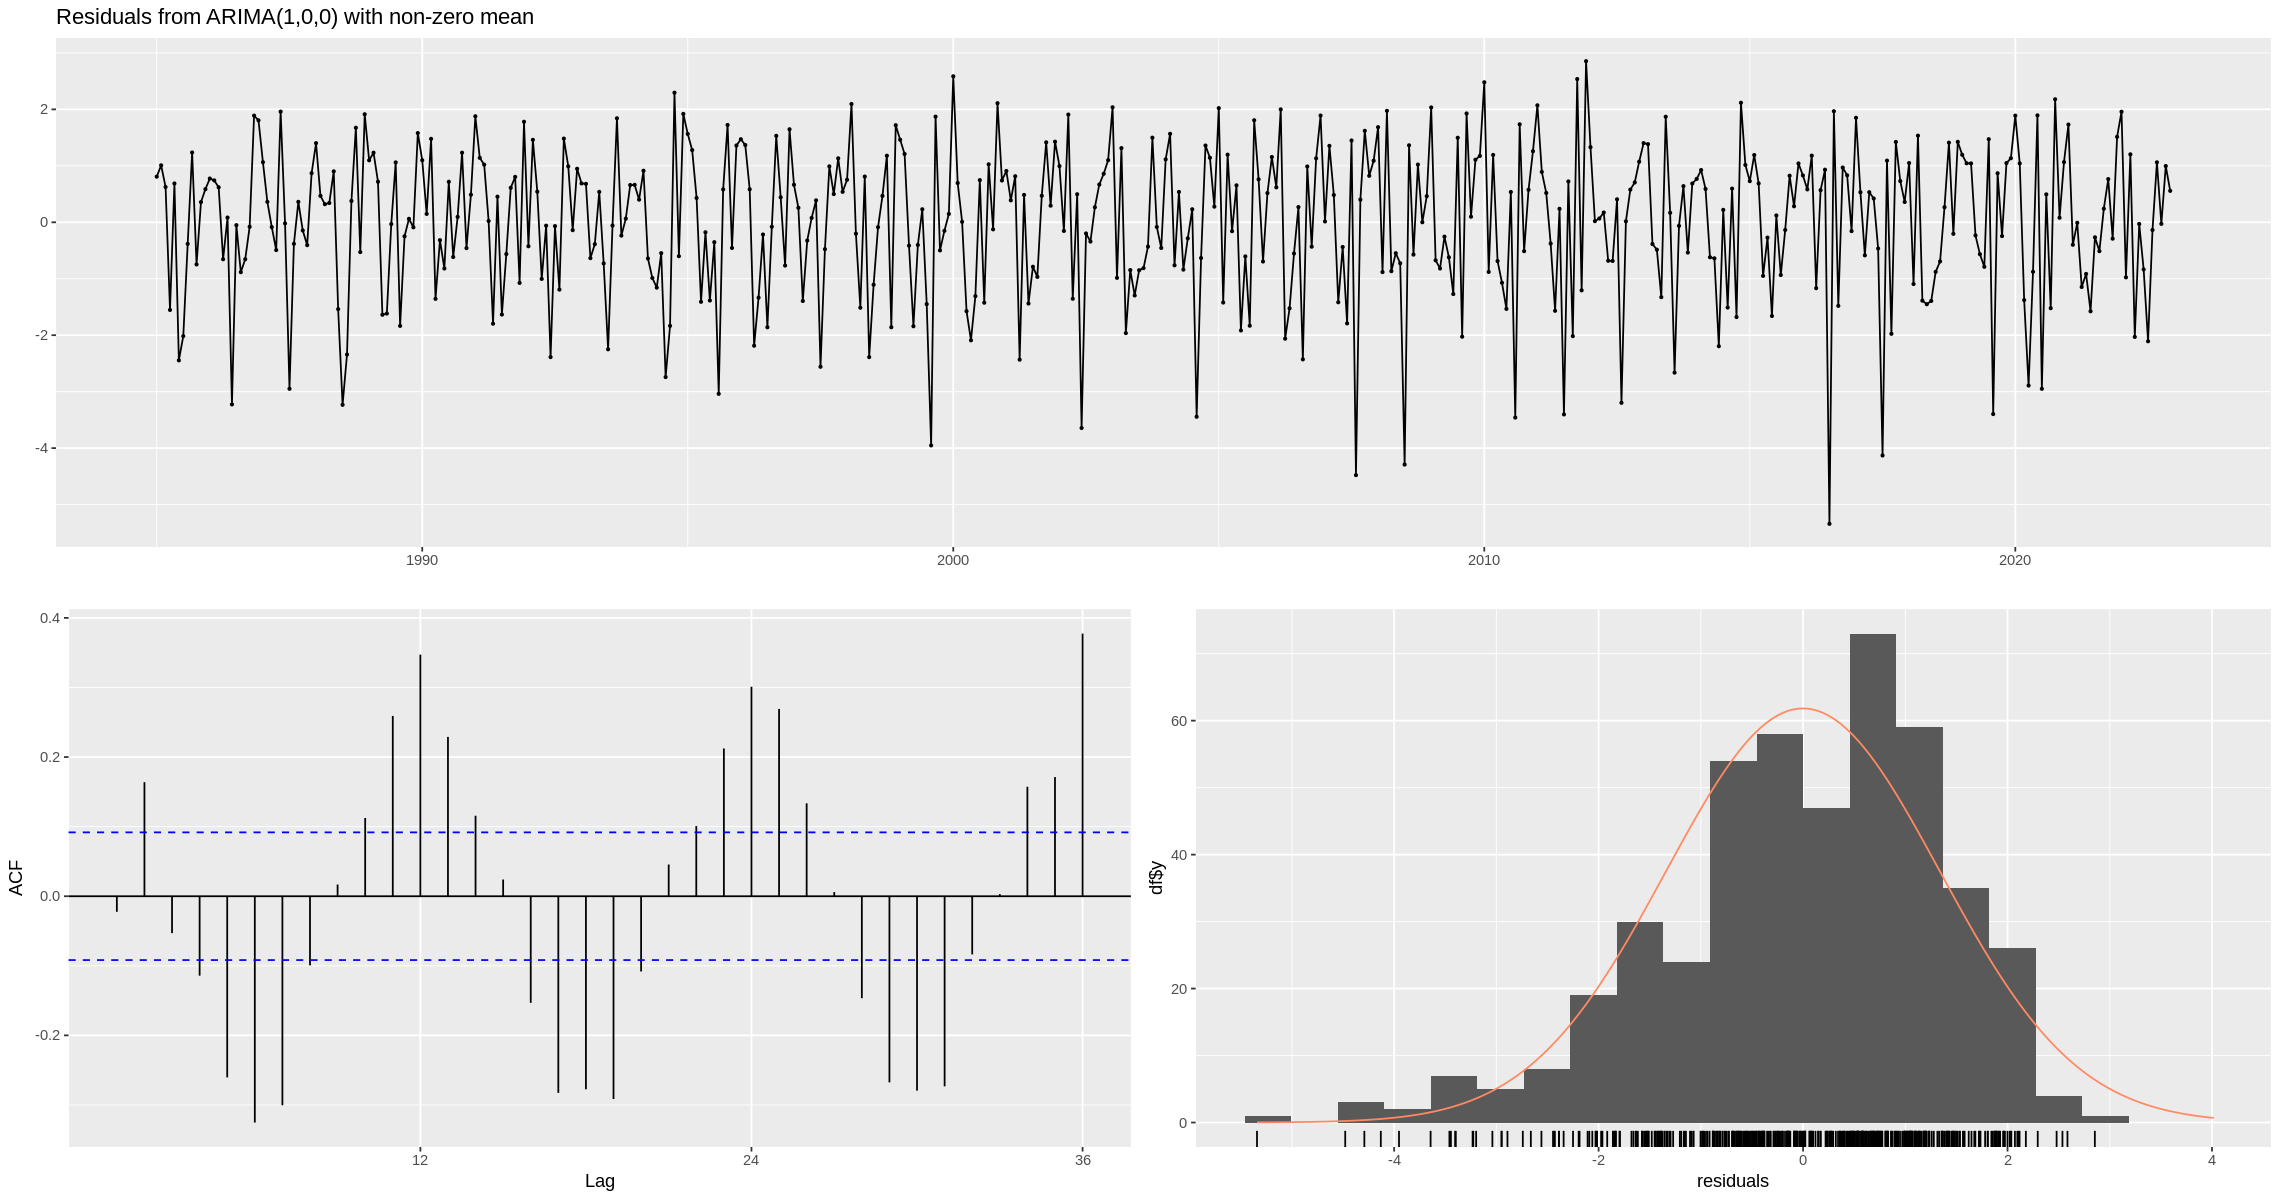

In [ ]:
# Análise dos resíduos (qualidade do modelo)
checkresiduals(modelo_ar)

In [ ]:
# média parece constante assim como a variância
#contudo, os resíduos estão fora dos limites do intervalo de confiança
#logo por isto, o modelo é ruim

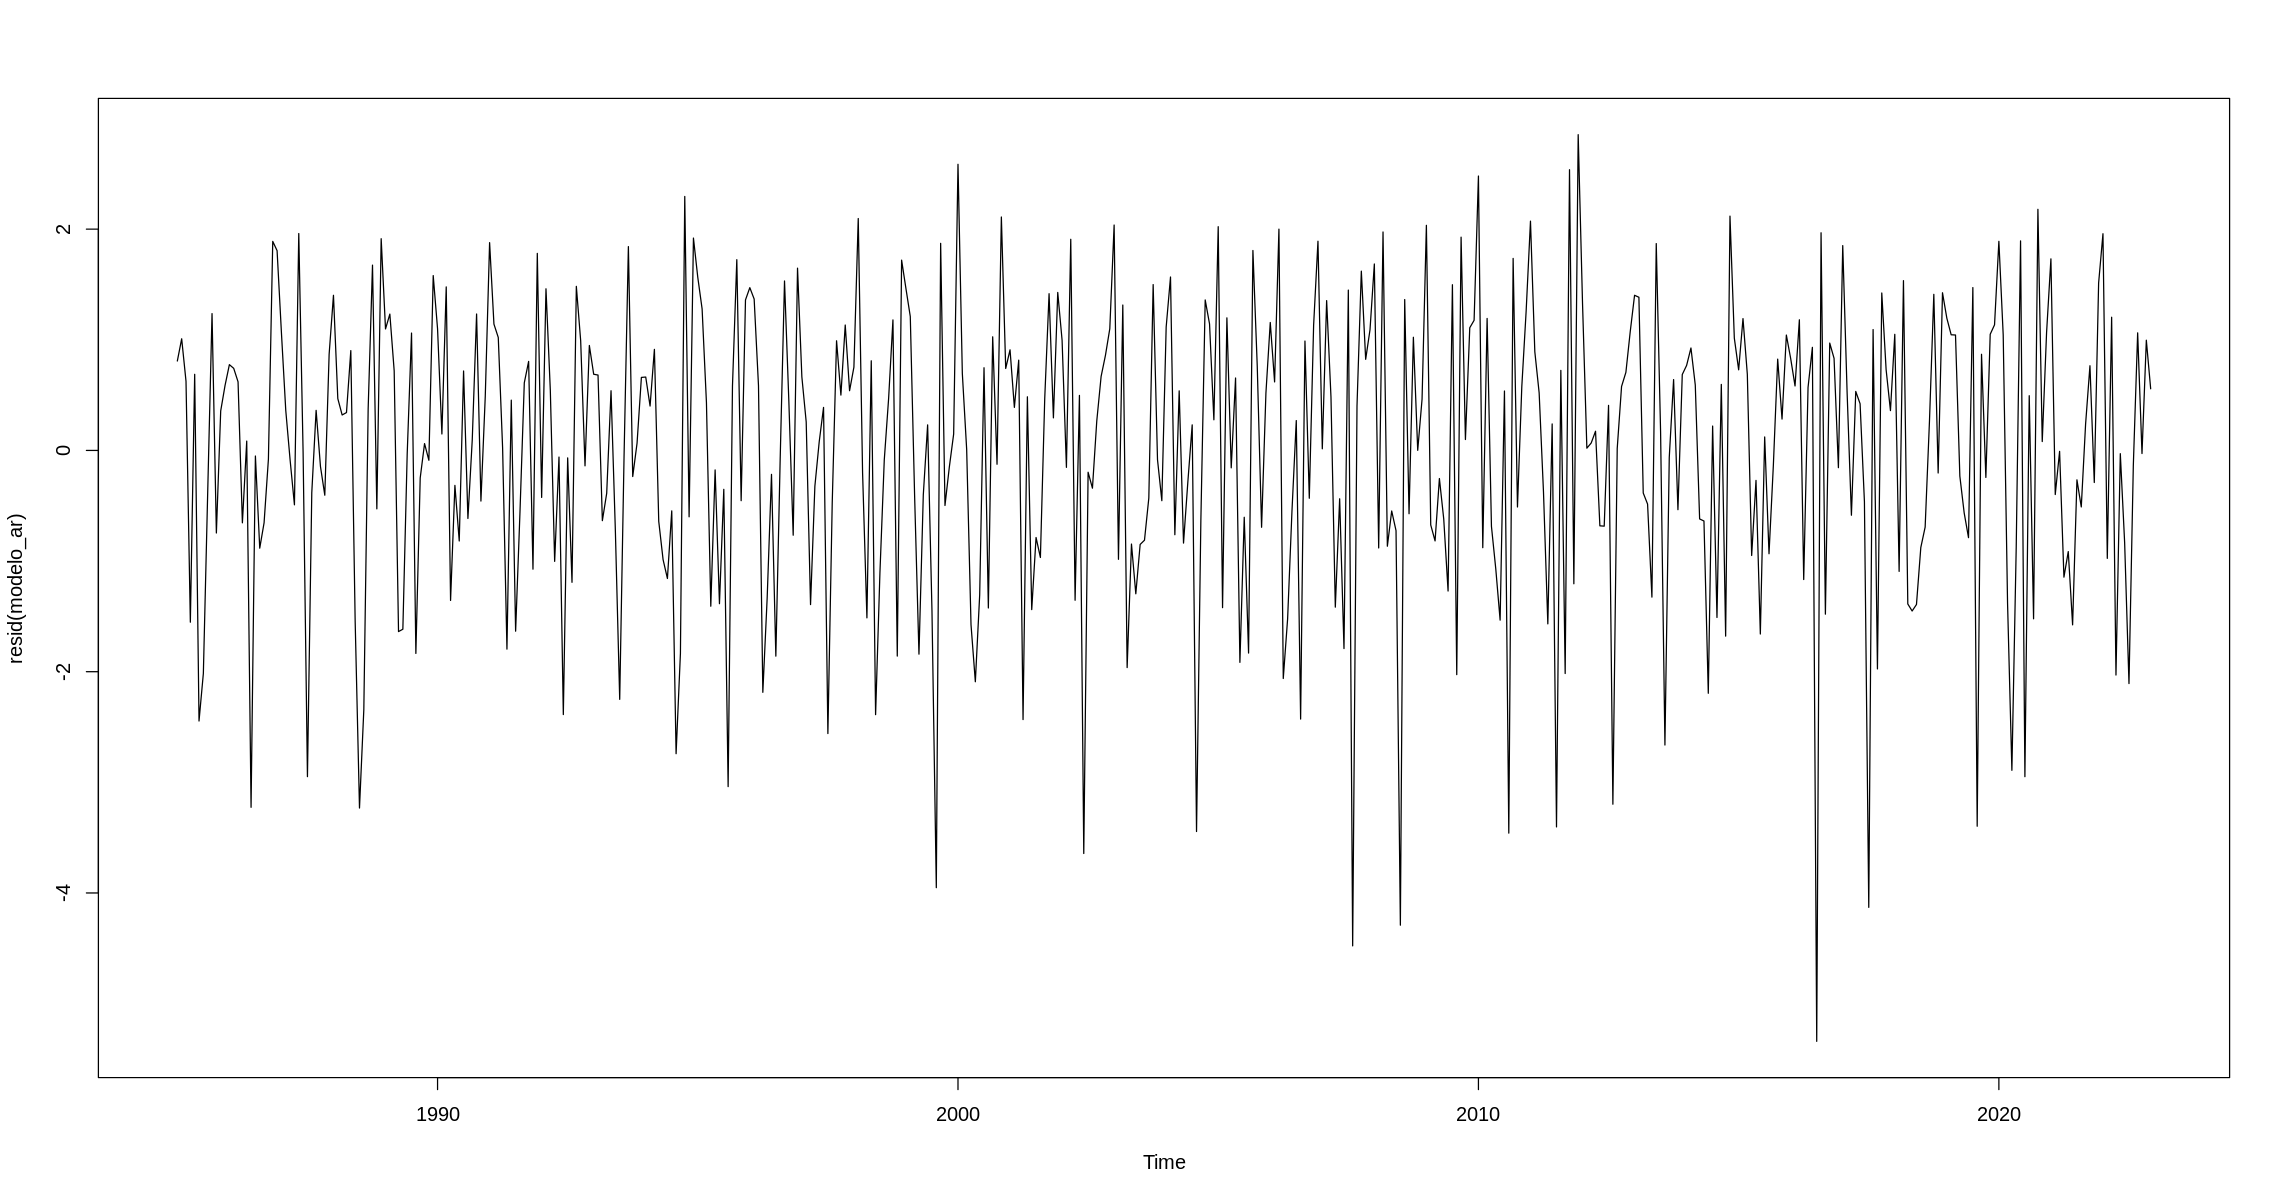

In [ ]:
plot(resid(modelo_ar))

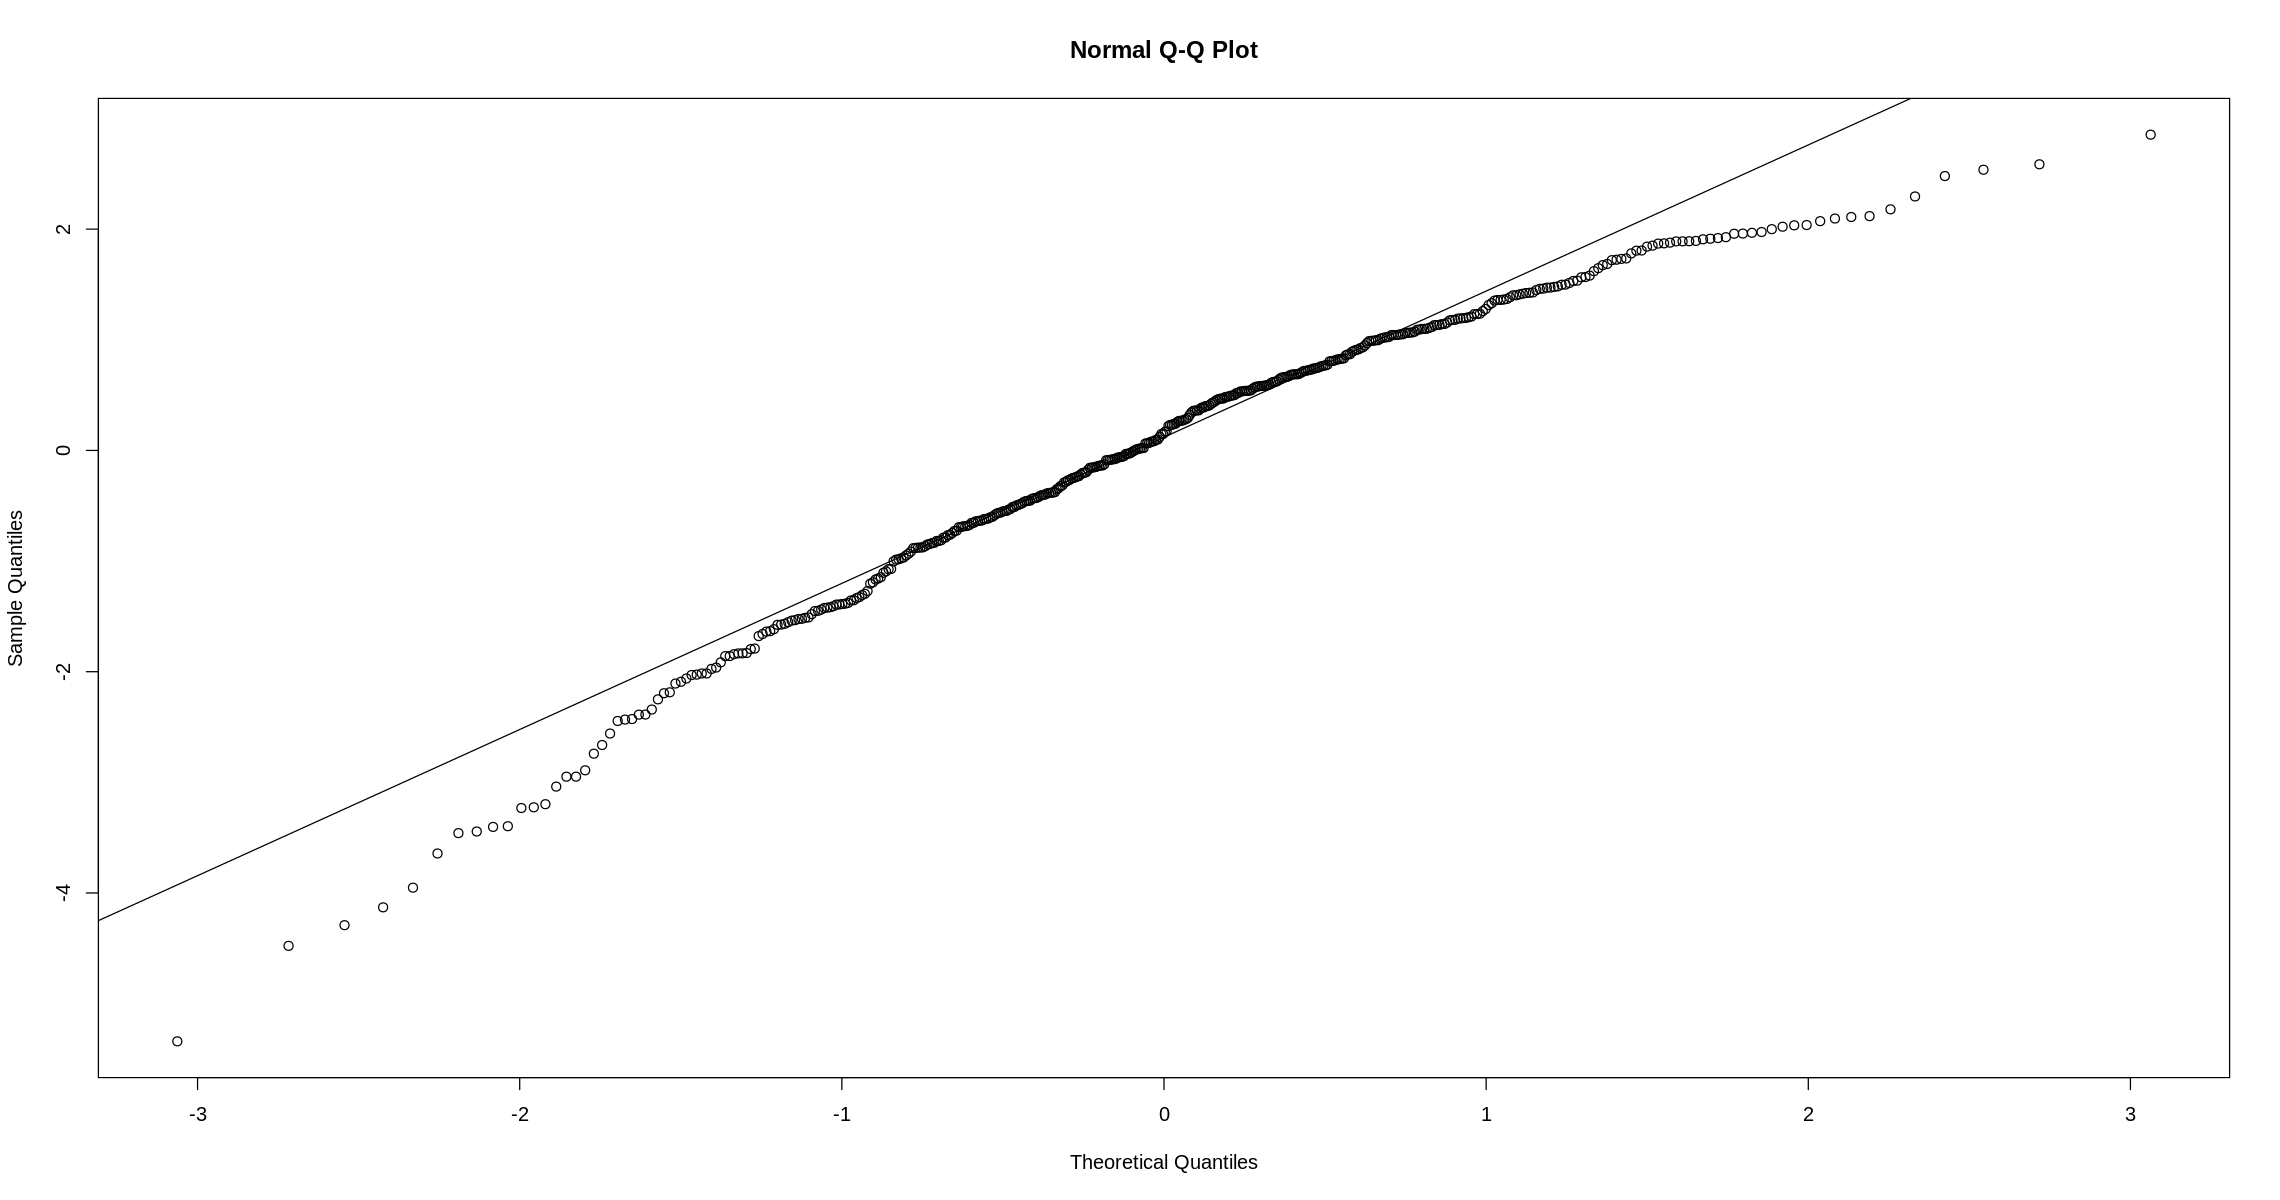

In [ ]:
#análise gráfico dos resíduos
qqnorm(resid(modelo_ar))
qqline(resid(modelo_ar))

In [ ]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_ar))


	Shapiro-Wilk normality test

data:  resid(modelo_ar)
W = 0.96799, p-value = 1.999e-08


In [ ]:
#pelo teste estatístico os resíduos não são normais

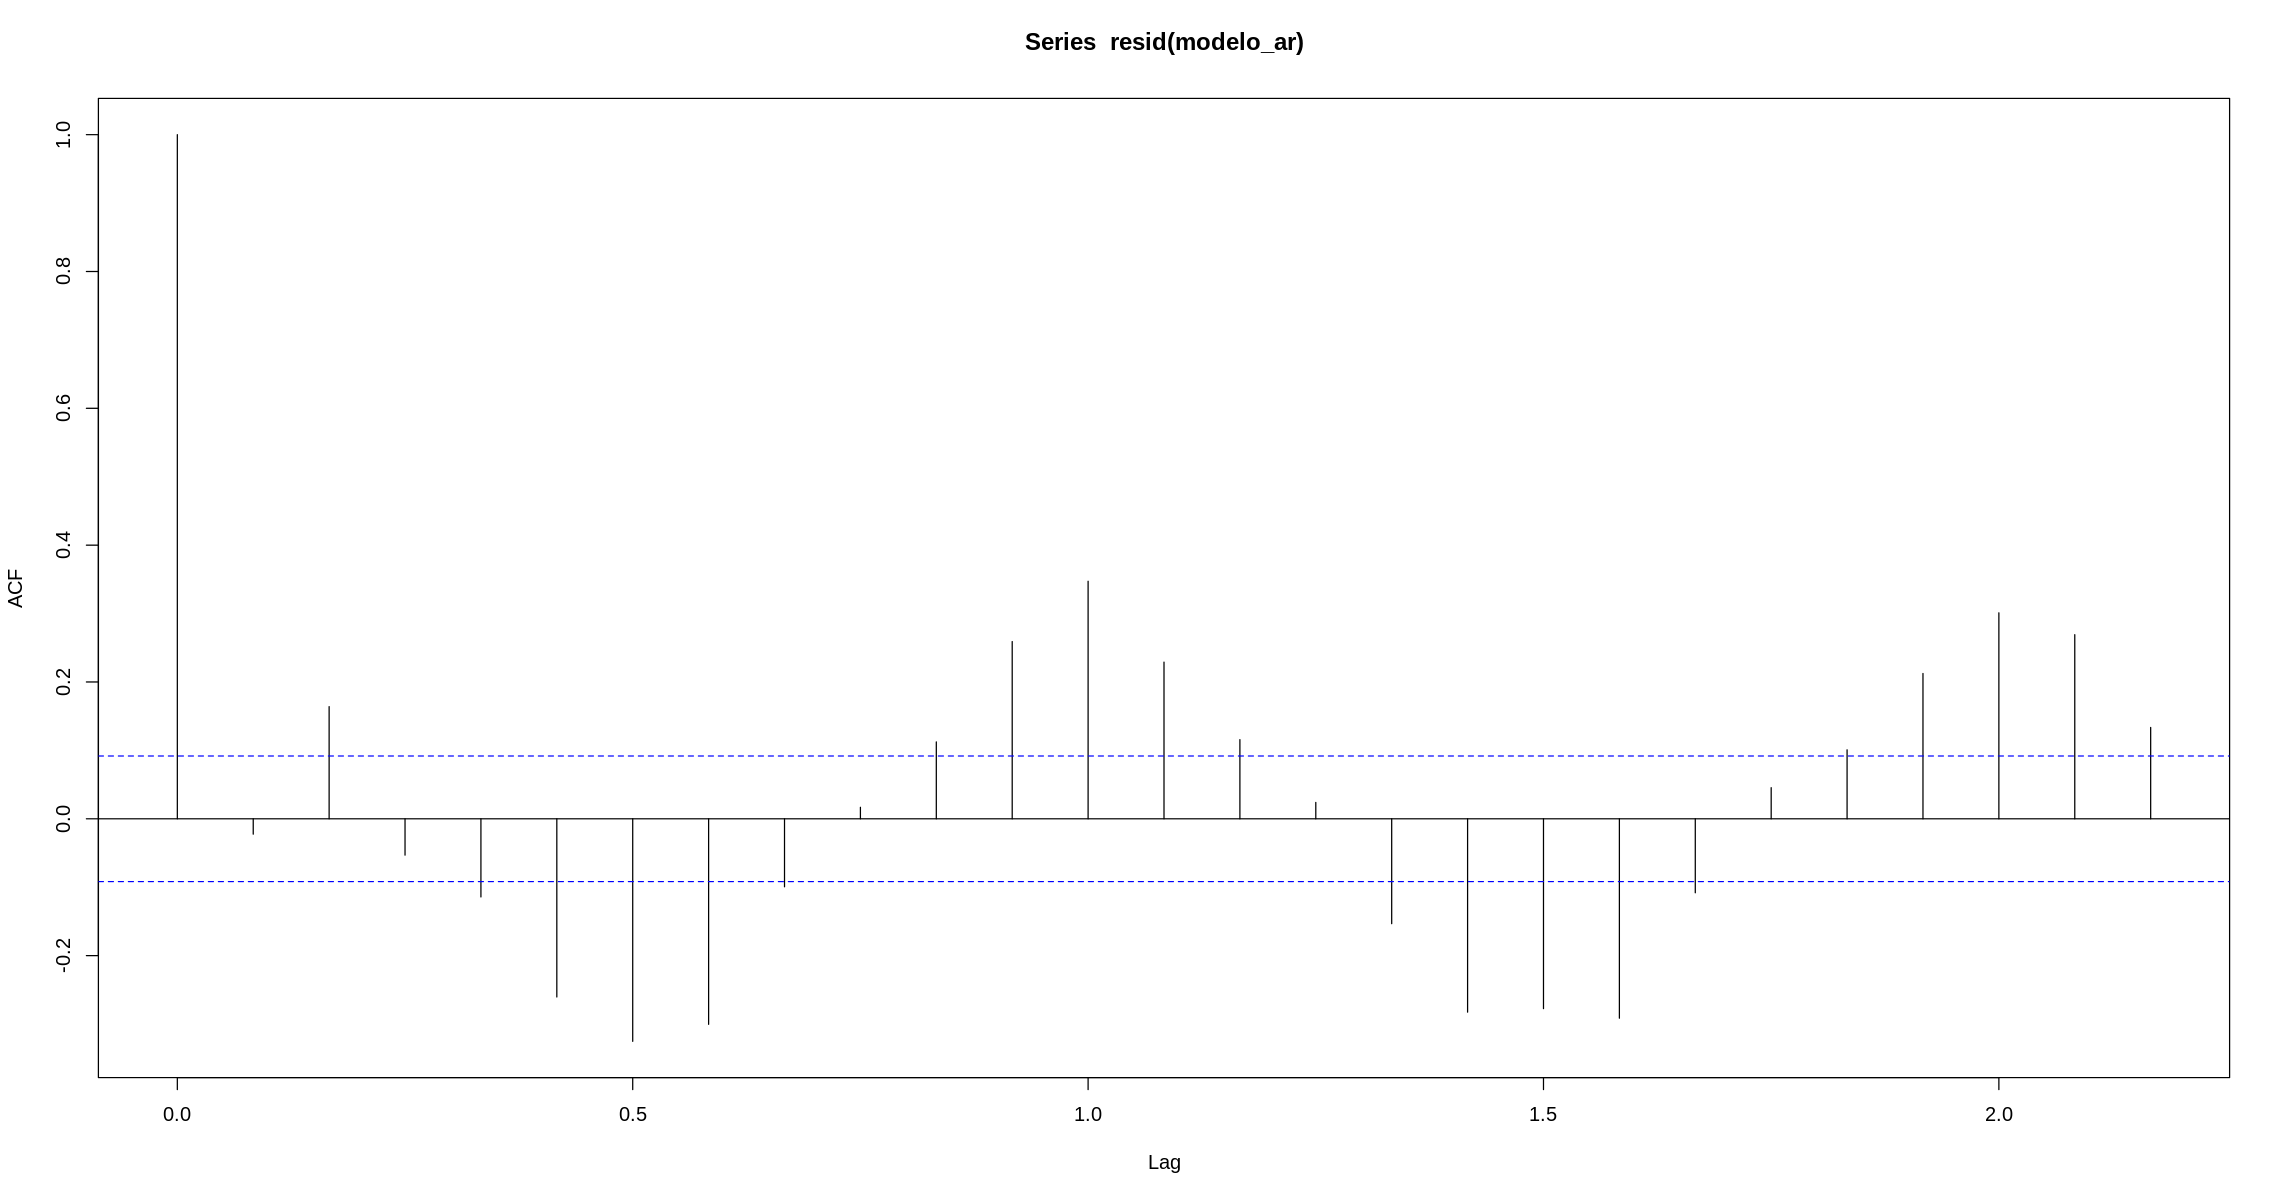

In [ ]:
#avaliando os resíduos
acf(resid(modelo_ar))

In [ ]:
#muitos lags fora dos limites, autocorrelção entre os resíduos

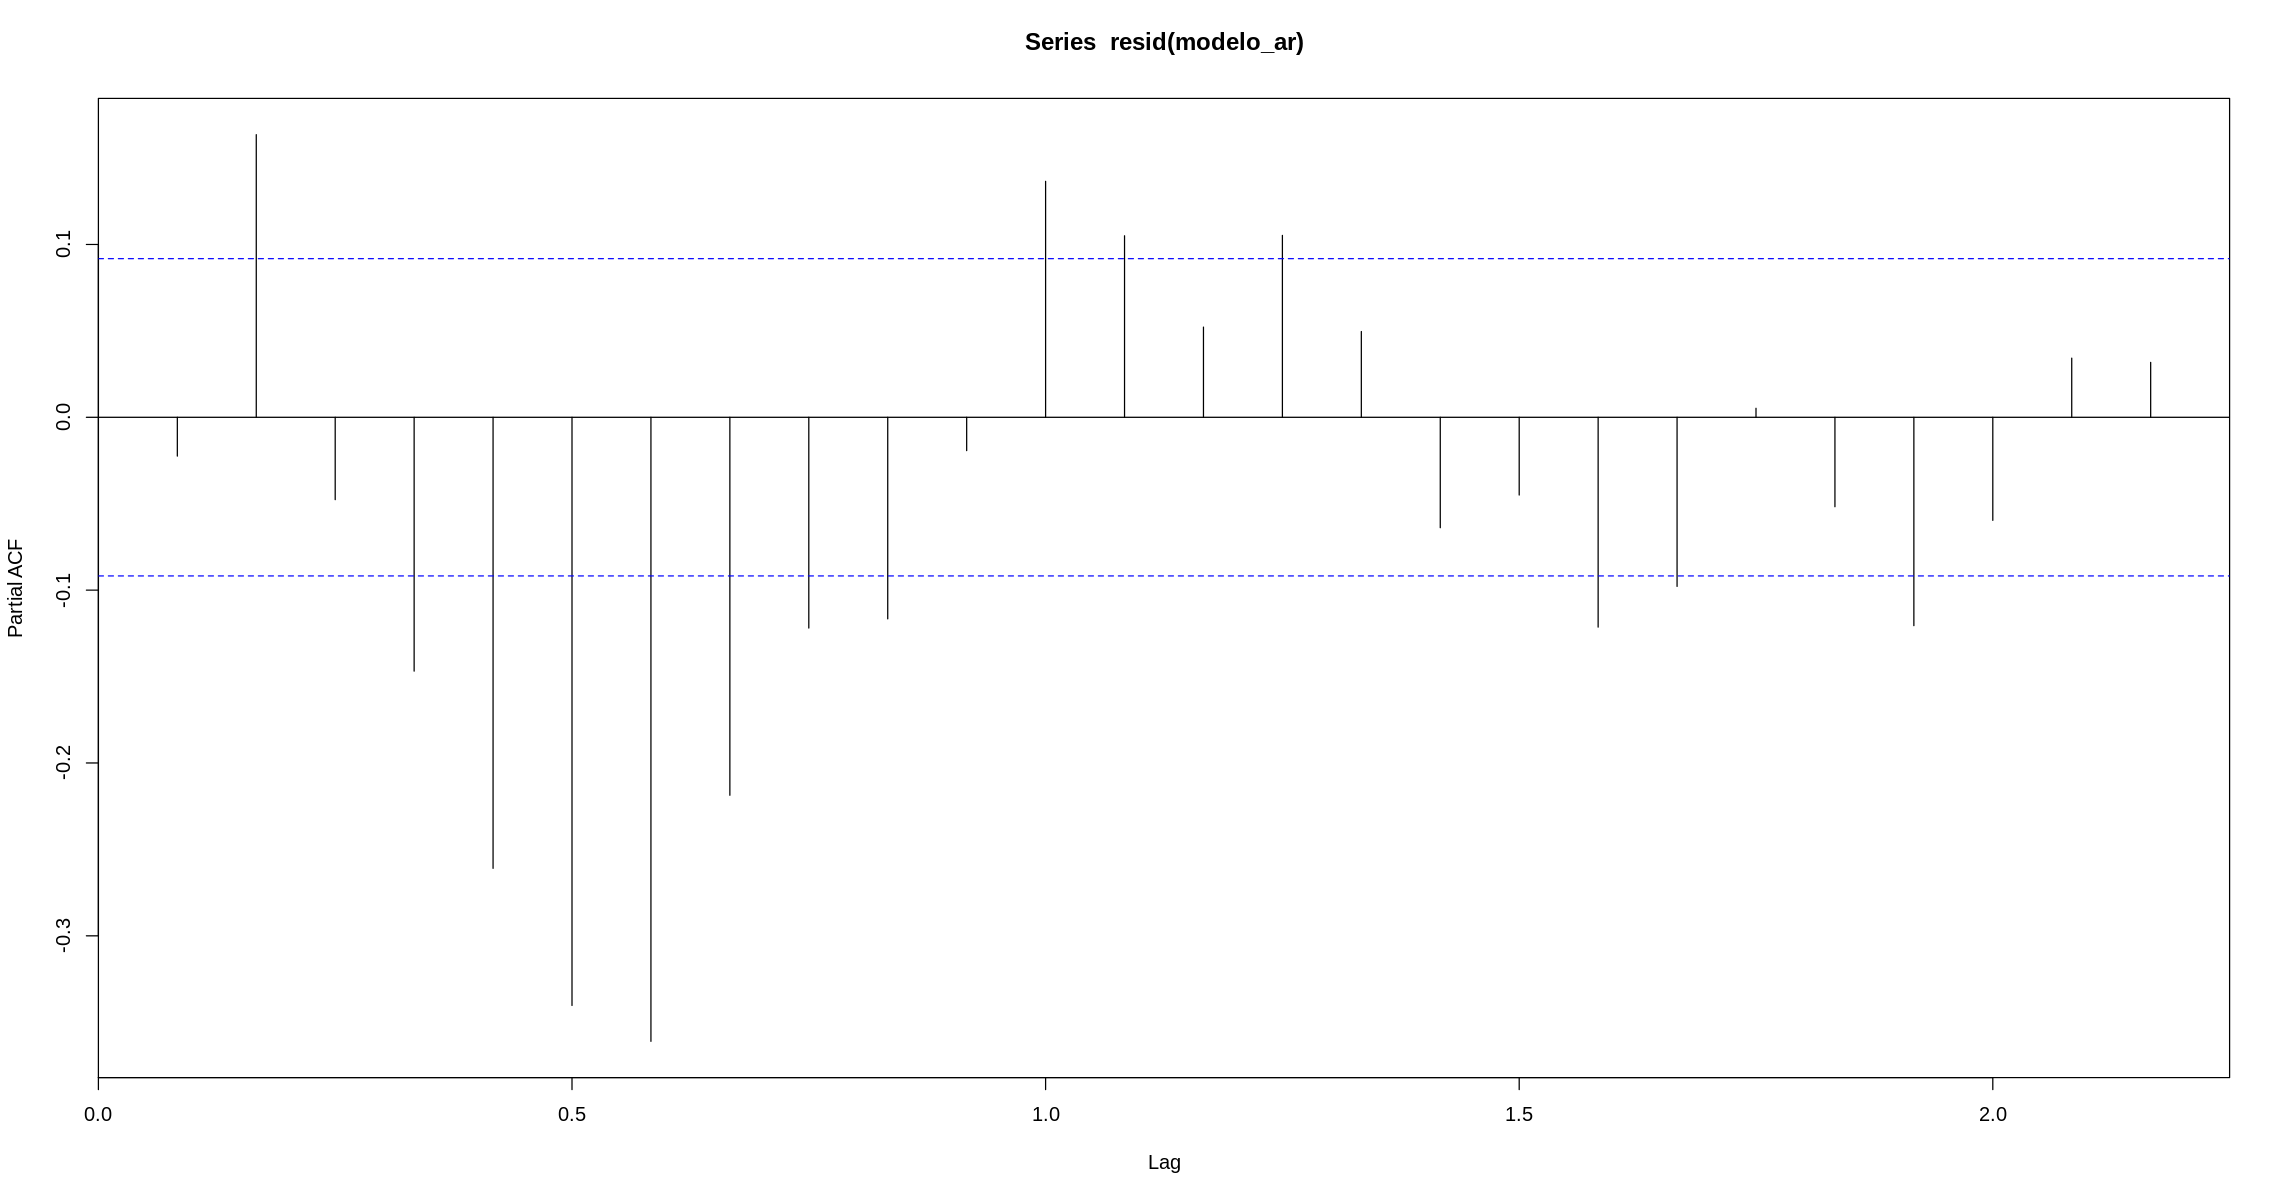

In [ ]:
pacf(resid(modelo_ar))

In [ ]:
# o pacf confira este fato

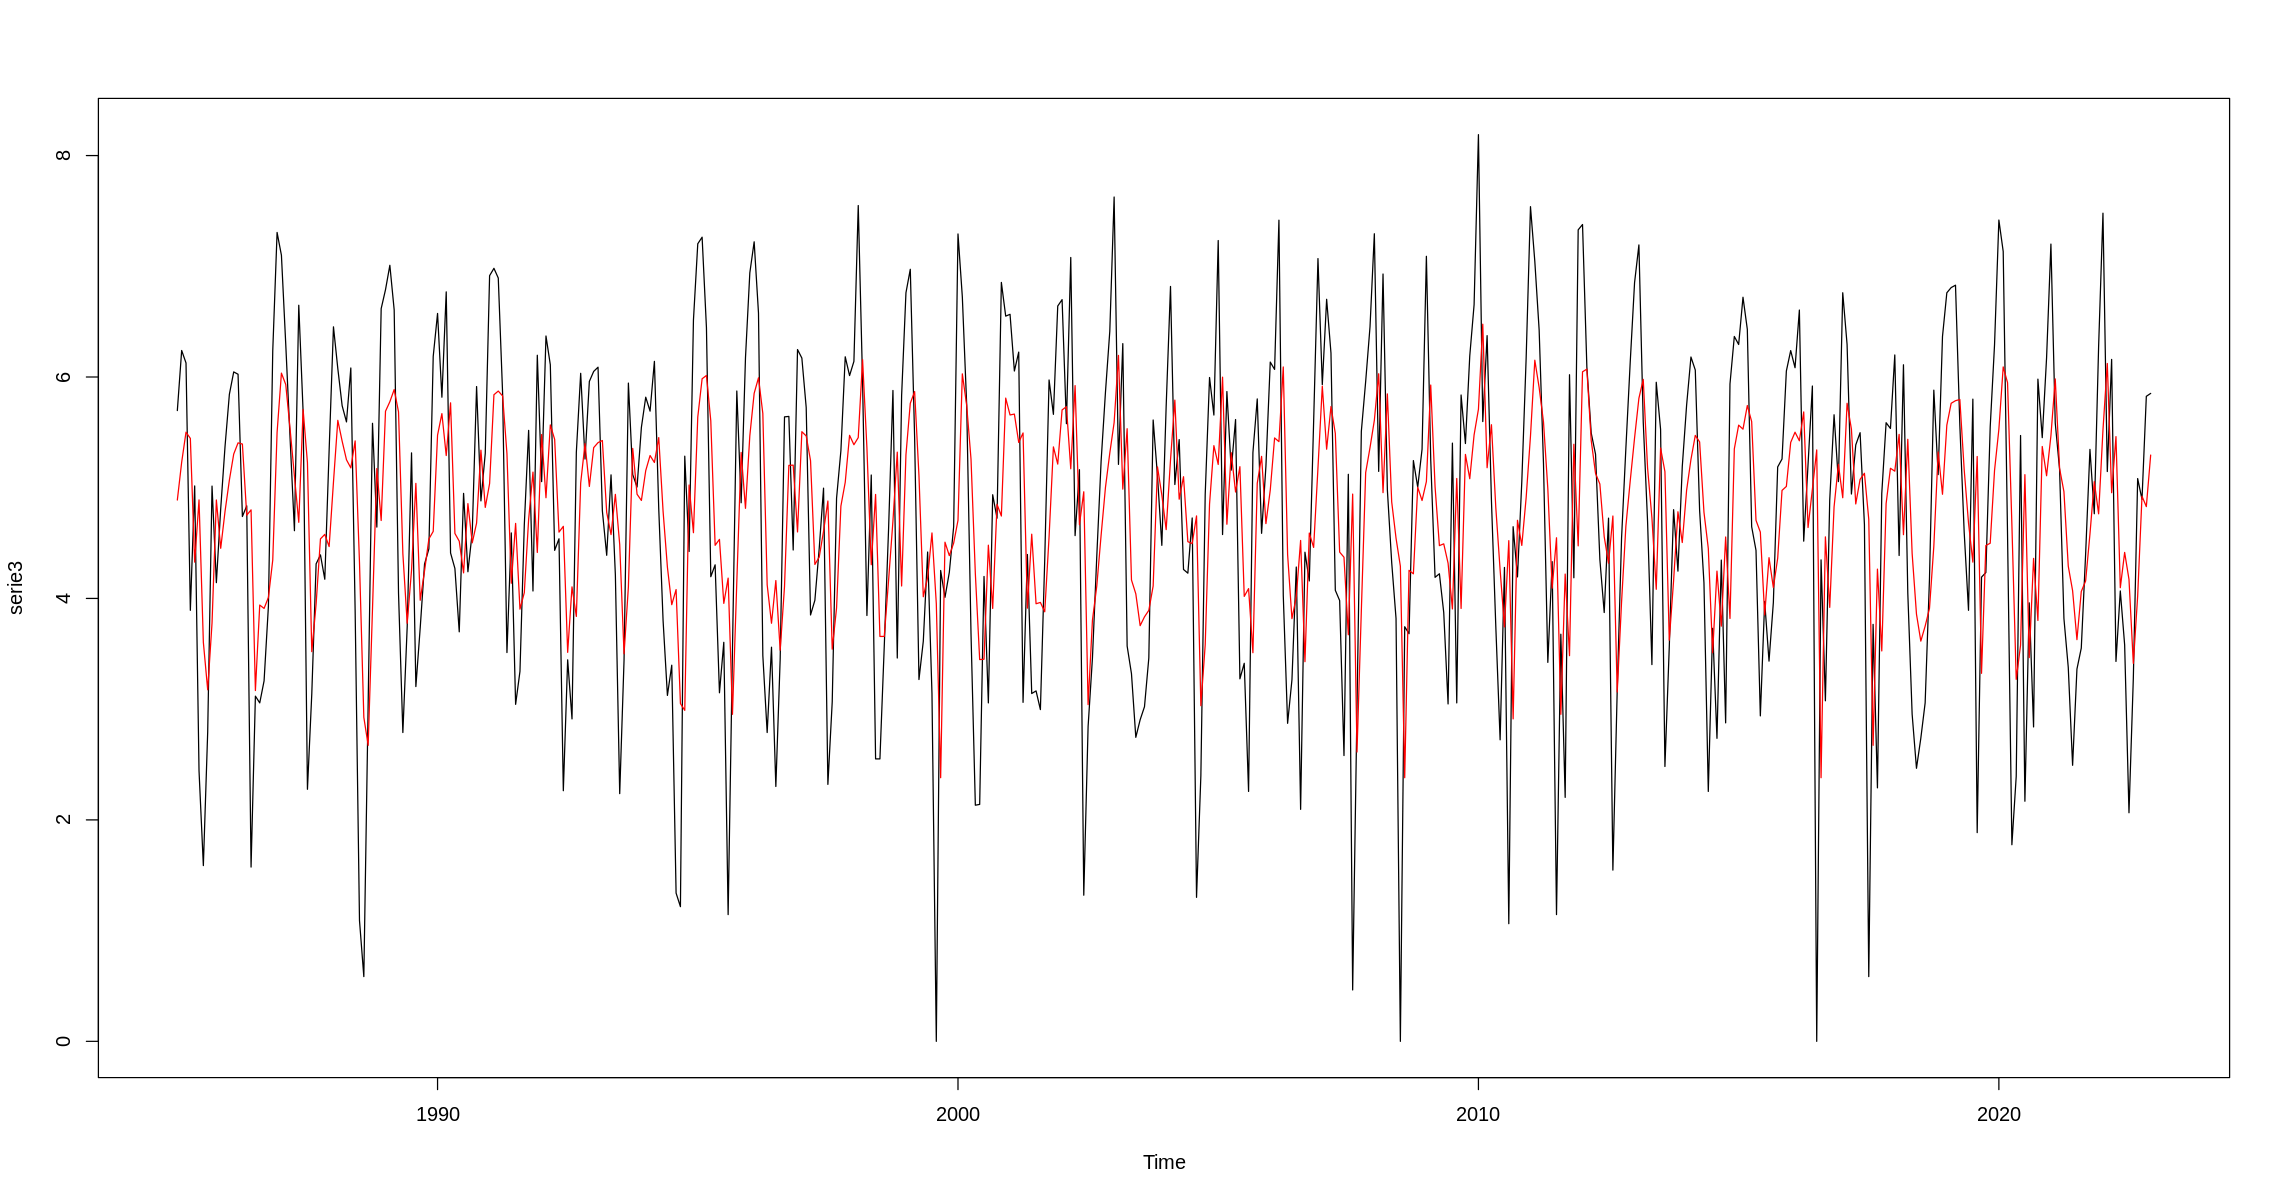

In [ ]:
#plotando a serie 3 com o modelo AR criado
plot(serie3)
lines(serie3-modelo_ar$resid, col= "red")

In [ ]:
#APARENTEMENTE NÃO ESTÁ TÃO RUIM

#####4.2-REALIZANDO A PREVISÃO DO MODELO

In [ ]:
#REALIANDO A PREVISÃO DOS DADOS
#previsão com 3 anos
previsao_ar<-
  forecast(modelo_ar, h=36)


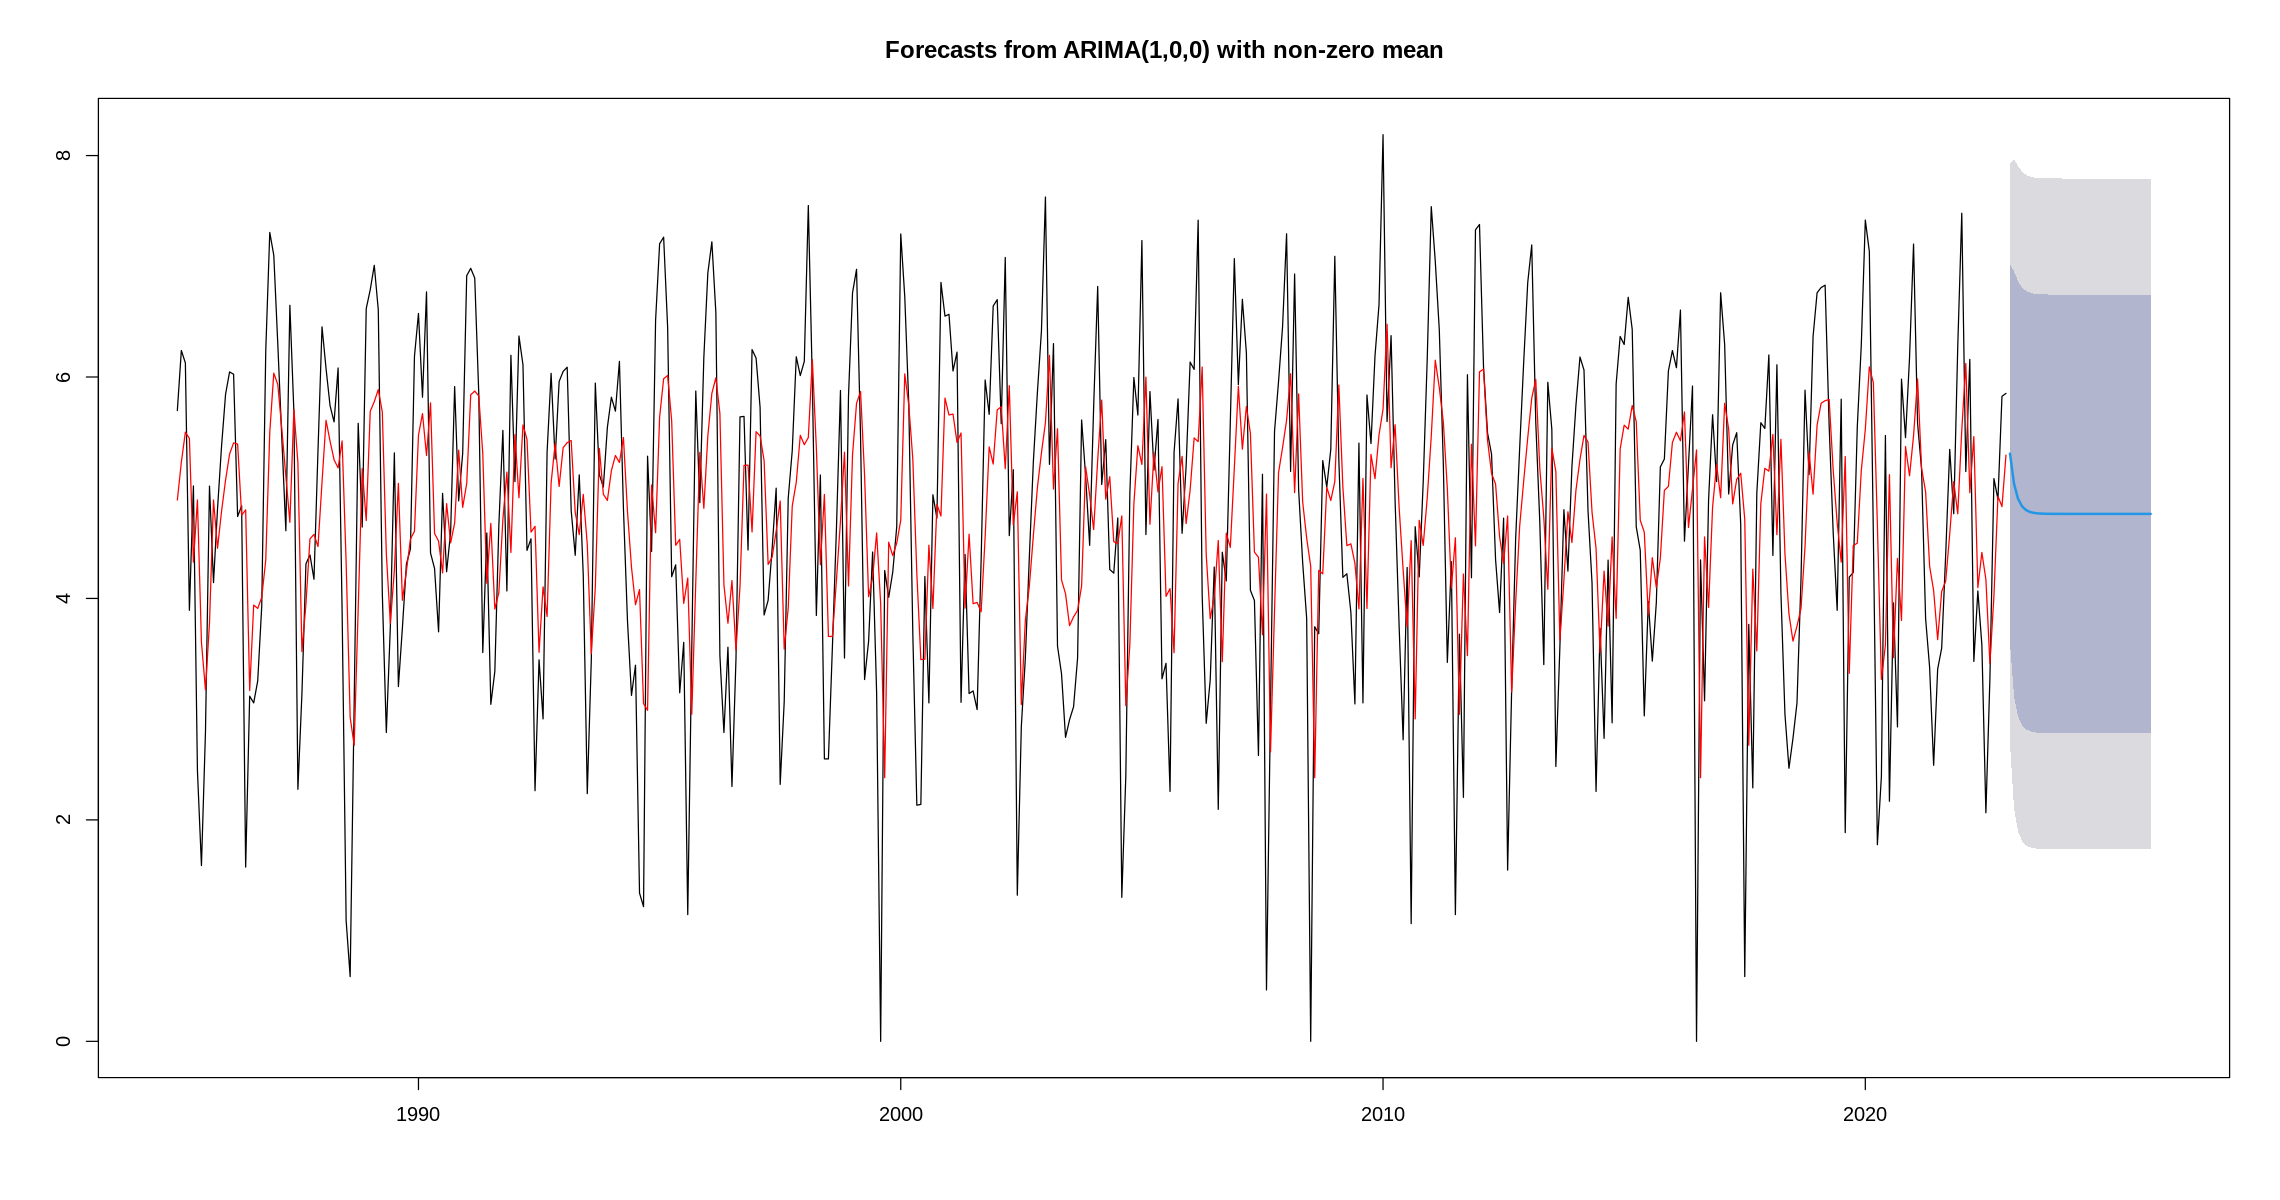

In [ ]:
#plotando a previsão
plot(previsao_ar)
lines(serie3-modelo_ar$resid, col= "red")

In [ ]:
# a previsão ficou ruim com media constante, apesar da alta variação dos dados

In [ ]:
print(previsao_ar)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       5.308029 3.592984 7.023073 2.685095 7.930963
Feb 2023       5.035980 3.118364 6.953595 2.103240 7.968720
Mar 2023       4.899906 2.934875 6.864938 1.894650 7.905163
Apr 2023       4.831845 2.855129 6.808562 1.808719 7.854972
May 2023       4.797803 2.818174 6.777431 1.770222 7.825384
Jun 2023       4.780775 2.800419 6.761132 1.752081 7.809469
Jul 2023       4.772258 2.791720 6.752797 1.743286 7.801231
Aug 2023       4.767999 2.787414 6.748583 1.738956 7.797041
Sep 2023       4.765868 2.785272 6.746464 1.736808 7.794928
Oct 2023       4.764802 2.784204 6.745401 1.735738 7.793866
Nov 2023       4.764269 2.783670 6.744868 1.735204 7.793334
Dec 2023       4.764002 2.783403 6.744602 1.734937 7.793068
Jan 2024       4.763869 2.783270 6.744469 1.734804 7.792935
Feb 2024       4.763802 2.783203 6.744402 1.734737 7.792868
Mar 2024       4.763769 2.783169 6.744369 1.734703 7.792835
Apr 2024       4.763752 2.783153 6.74435

In [ ]:
#destransformar os dados, pois a serie 3 foi realizada a transformação
prev_escala_ar <-
  as.data.frame(previsao_ar)^3
View(prev_escala_ar)



Point Forecast Lo 80    Hi 80    Lo 95     Hi 95   
Jan 2023 149.5546       46.38376 346.4029 19.358814 498.8589
Feb 2023 127.7179       30.32358 336.2236  9.303930 506.0176
Mar 2023 117.6423       25.27952 323.5265  6.801223 494.0063
Apr 2023 112.8078       23.27434 315.6212  5.917158 484.6564
May 2023 110.4402       22.38223 311.3117  5.547319 479.2001
Jun 2023 109.2685       21.96185 309.0710  5.378518 476.2825
Jul 2023 108.6856       21.75782 307.9294  5.297925 474.7767
Aug 2023 108.3948       21.65731 307.3532  5.258550 474.0121
Sep 2023 108.2495       21.60742 307.0637  5.239086 473.6268
Oct 2023 108.1769       21.58256 306.9186  5.229408 473.4333
Nov 2023 108.1406       21.57015 306.8460  5.224581 473.3364
Dec 2023 108.1225       21.56395 306.8096  5.222171 473.2879
Jan 2024 108.1134       21.56085 306.7914  5.220966 473.2636
Feb 2024 108.1088       21.55930 306.7823  5.220364 473.2514
Mar 2024 108.1066       21.55852 306.7778  5.220063 473.2454
Apr 2024 108.1054       21.55813 306.7755  5.219912 473.2423
May 2024 108.1049       21.55794 306.7743  5.219837 473.2408
Jun 2024 108.1046       21.55784 306.7738  5.219799 473.2400
Jul 2024 108.1044       21.55779 306.7735  5.219780 473.2397
Aug 2024 108.1044       21.55777 306.7733  5.219771 473.2395
Sep 2024 108.1043       21.55776 306.7733  5.219766 473.2394
Oct 2024 108.1043       21.55775 306.7732  5.219763 473.2393
Nov 2024 108.1043       21.55775 306.7732  5.219762 473.2393
Dec 2024 108.1043       21.55775 306.7732  5.219762 473.2393
Jan 2025 108.1043       21.55775 306.7732  5.219761 473.2393
Feb 2025 108.1043       21.55775 306.7732  5.219761 473.2393
Mar 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Apr 2025 108.1043       21.55774 306.7732  5.219761 473.2393
May 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Jun 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Jul 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Aug 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Sep 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Oct 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Nov 2025 108.1043       21.55774 306.7732  5.219761 473.2393
Dec 2025 108.1043       21.55774 306.7732  5.219761 473.2393

In [ ]:
#modelo ficou ruim dados ficam iguais
#necessário realizar modificações no modelo do ar

#####4.3-MODIFFCANDO A ORDEM DO MODELO



######4.3.1-ESCOHENDO A ORDEM DO MODELO

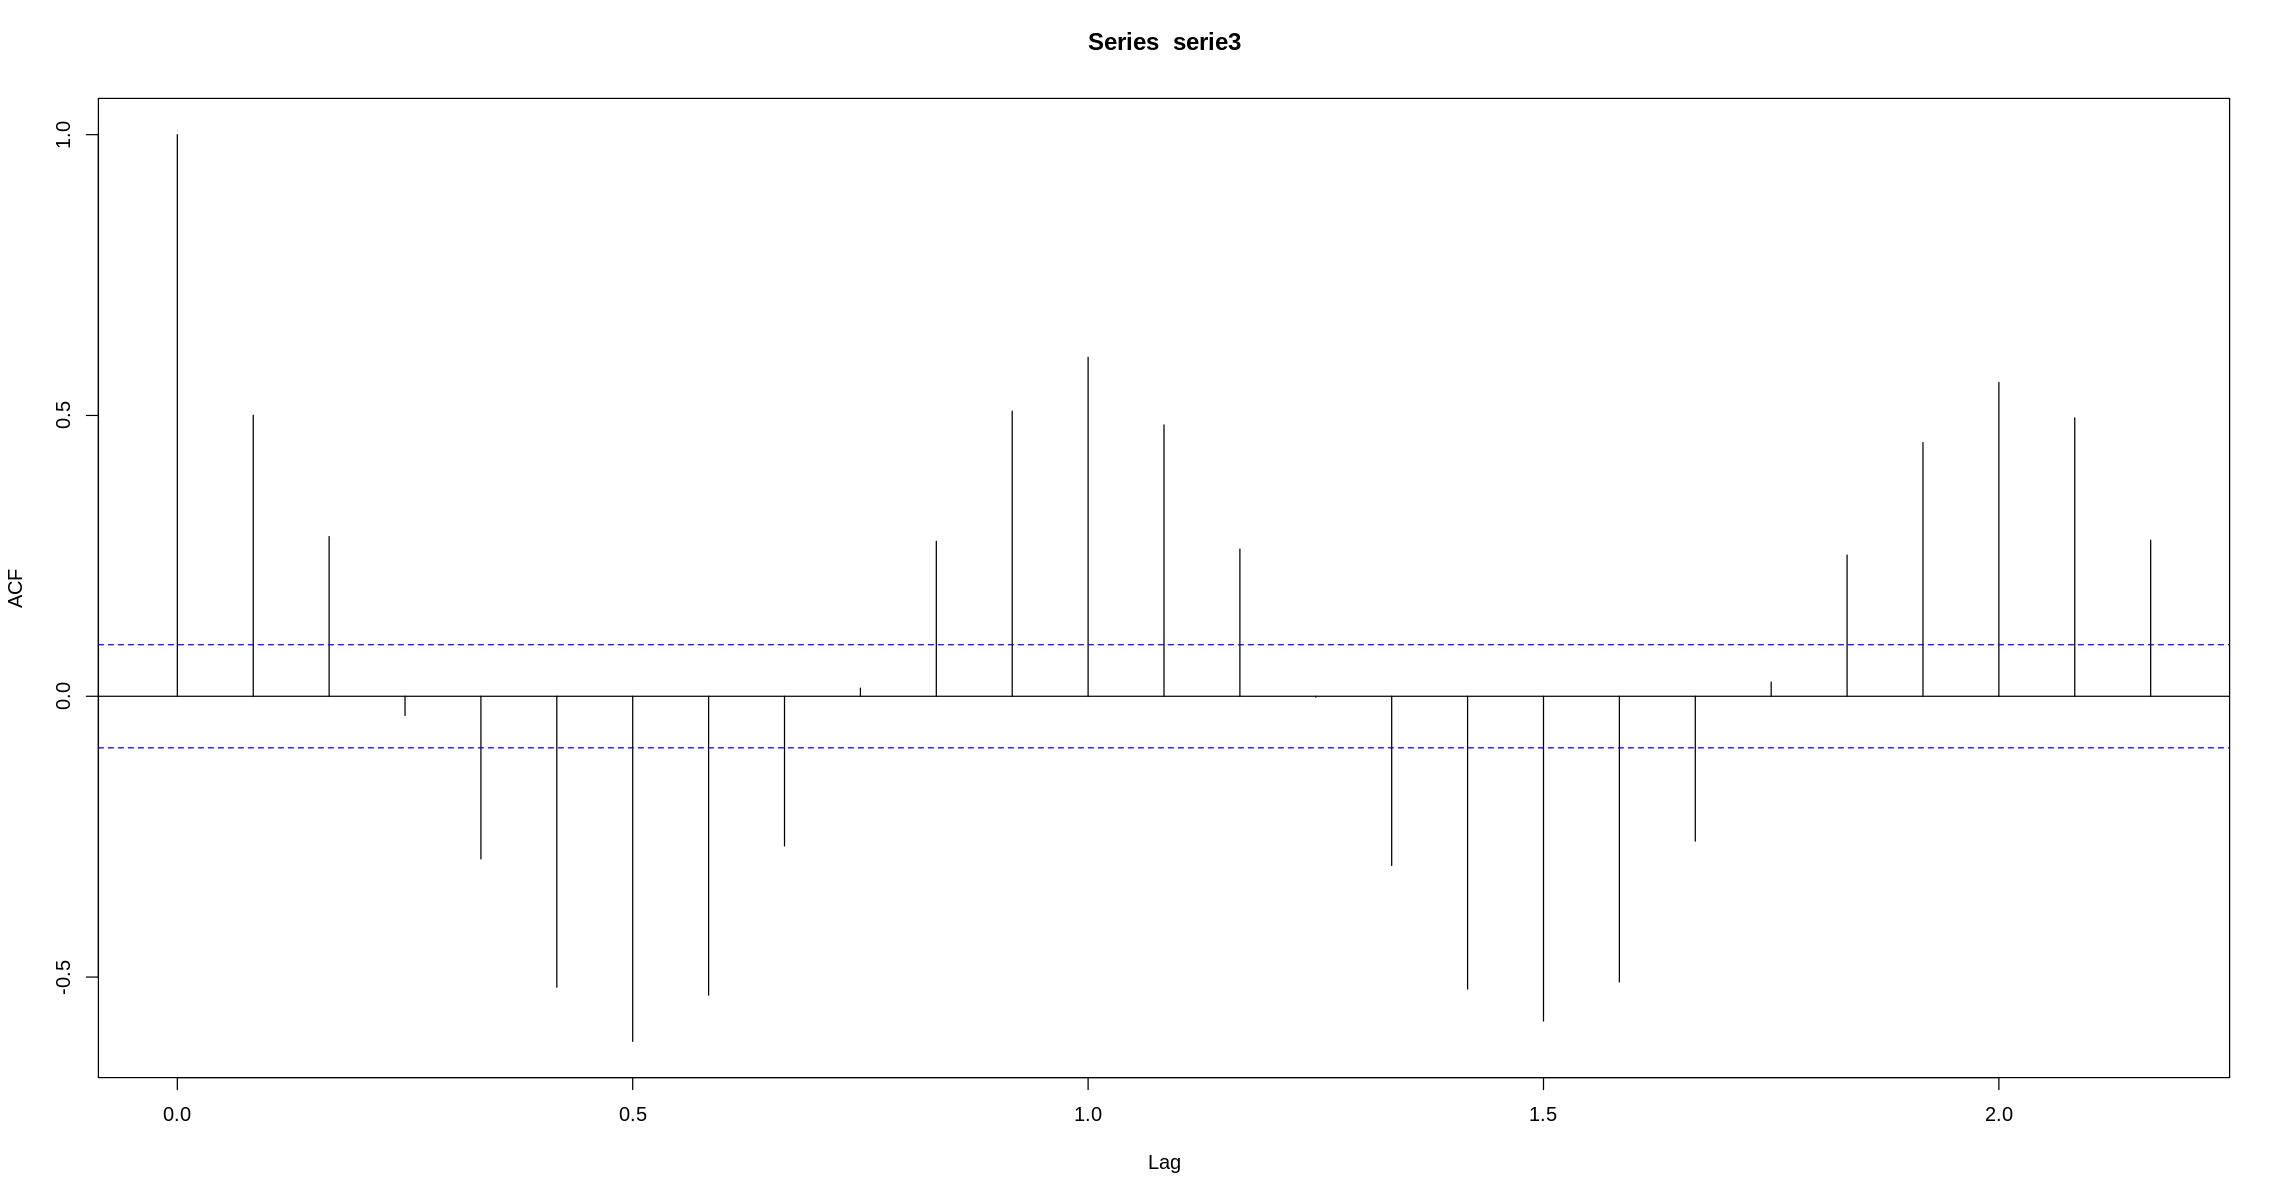

In [ ]:
#REALIZANDO MODIFICAÇÕES NA ORDEM DO MODELO PARA MELHORAR A PREVISÃO
acf(serie3)



In [ ]:
#utilizando lag = 4, ou 10 pois nestas lags houveram udanças e estão abaixo dos limites

######4.3.2-MODELO COM ORDEM 4

In [ ]:
modelo_ar_lag4<-
  arima(serie3, order=c(4,0,0))

In [ ]:
summary(modelo_ar_lag4)


Call:
arima(x = serie3, order = c(4, 0, 0))

Coefficients:
         ar1     ar2      ar3      ar4  intercept
      0.4175  0.2161  -0.1218  -0.2759     4.7580
s.e.  0.0449  0.0487   0.0487   0.0449     0.0762

sigma^2 estimated as 1.54:  log likelihood = -745.85,  aic = 1503.71

Training set error measures:
                      ME     RMSE       MAE  MPE MAPE      MASE        ACF1
Training set 0.000442091 1.240869 0.9655421 -Inf  Inf 0.7997488 -0.09223673

In [ ]:
summary(modelo_ar)


Call:
arima(x = serie3, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5002     4.7637
s.e.  0.0405     0.1251

sigma^2 estimated as 1.791:  log likelihood = -780.04,  aic = 1566.09

Training set error measures:
                       ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set -0.001336531 1.338256 1.066563 -Inf  Inf 0.8834233 -0.02243972

In [ ]:
# o AIC do modelo lag4 ficou menor


	Ljung-Box test

data:  Residuals from ARIMA(4,0,0) with non-zero mean
Q* = 160.82, df = 20, p-value < 2.2e-16

Model df: 4.   Total lags used: 24



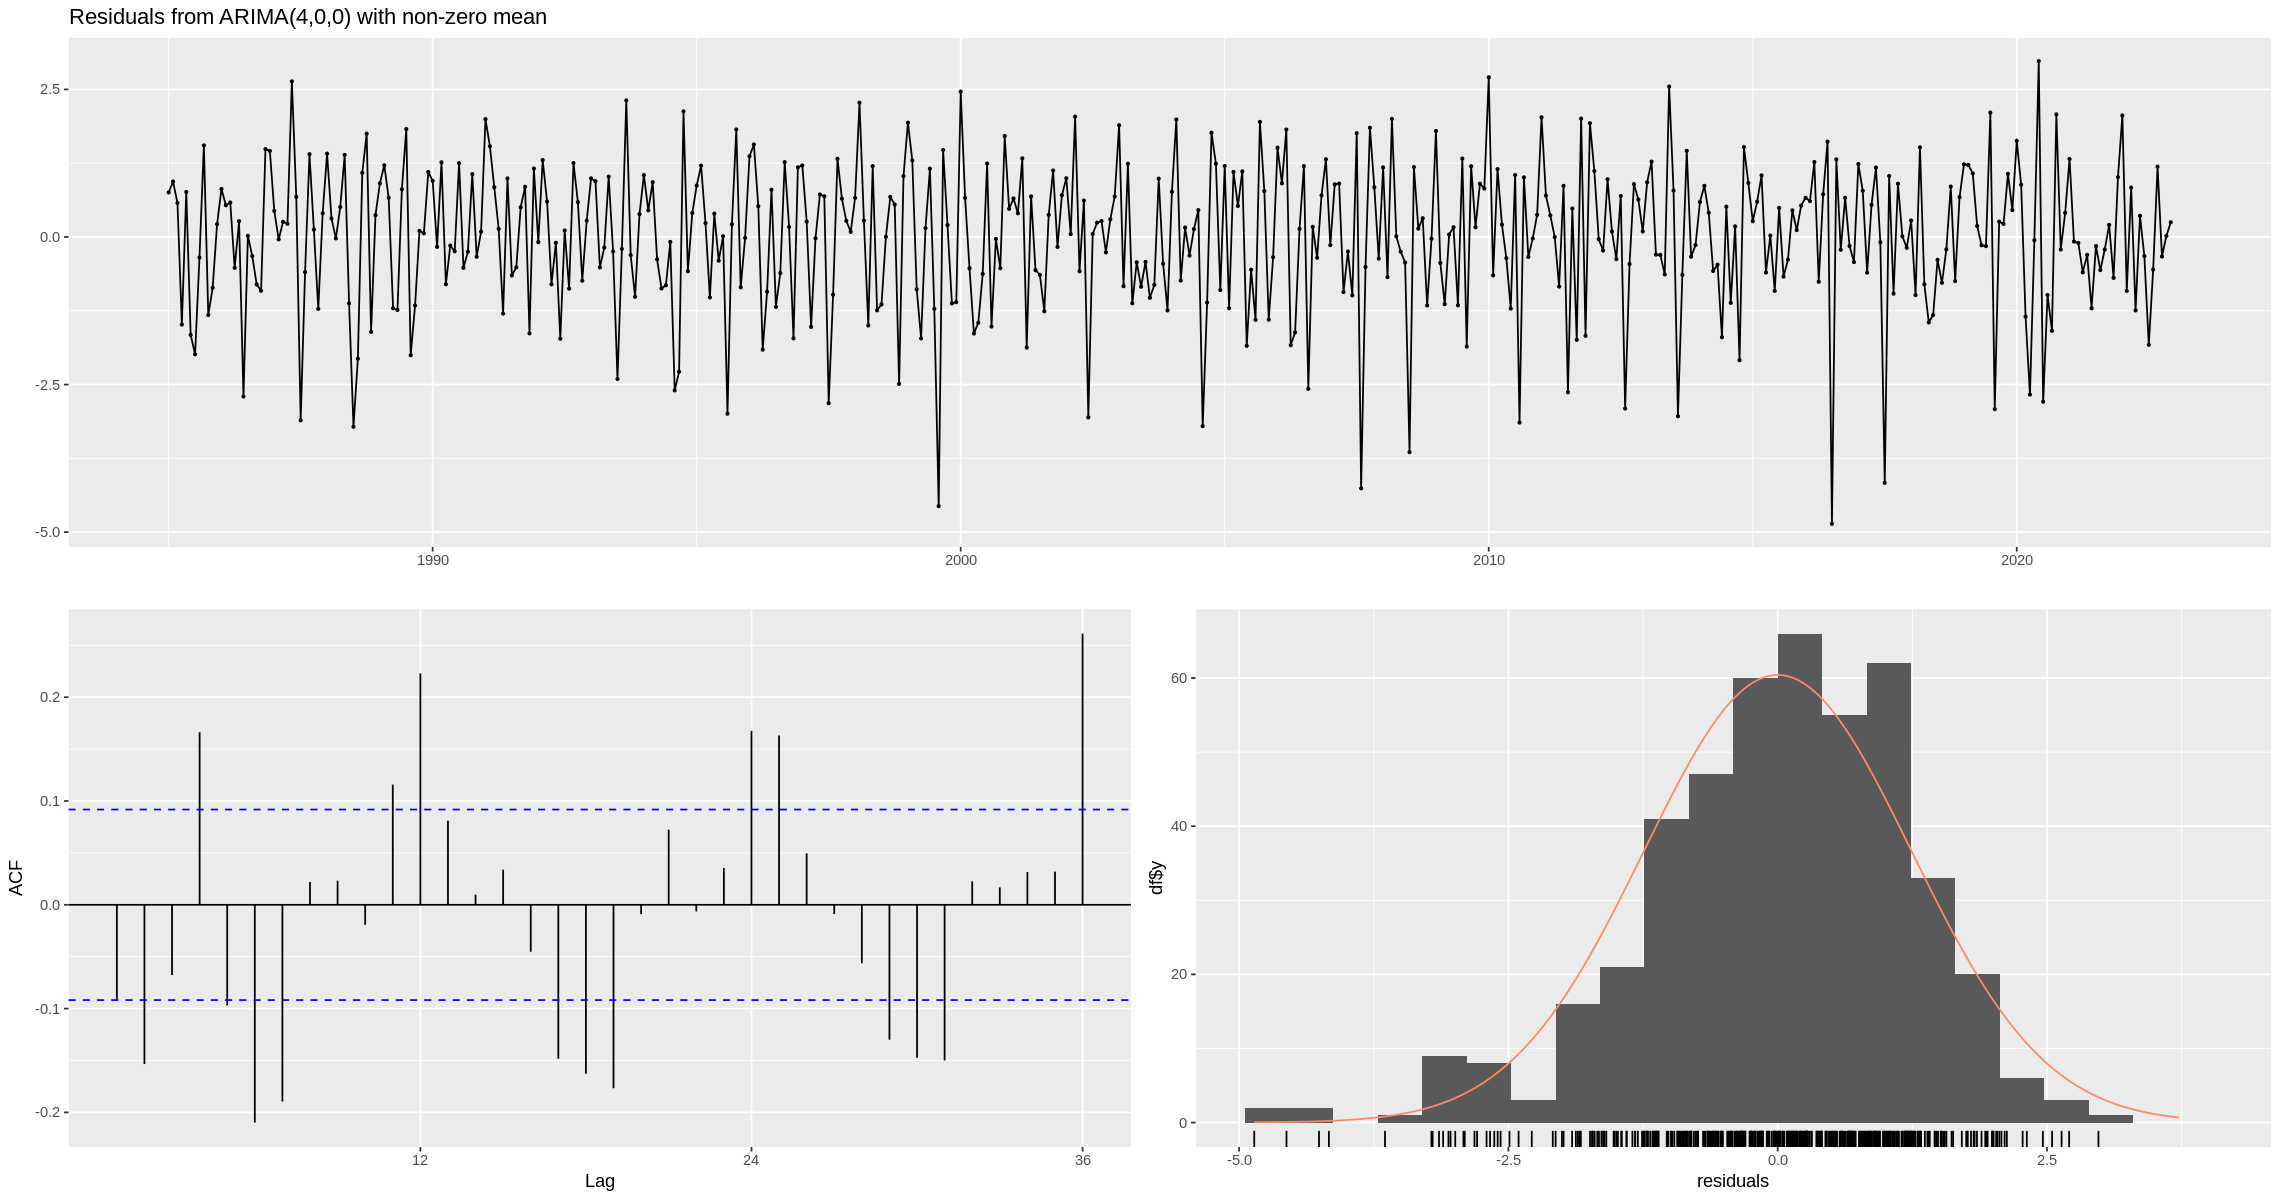

In [ ]:
# Análise dos resíduos (qualidade do modelo)
checkresiduals(modelo_ar_lag4)

In [ ]:
#ainda existem lags dos resíduos fora do limite
#mas melhorou

In [ ]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_ar_lag4))


	Shapiro-Wilk normality test

data:  resid(modelo_ar_lag4)
W = 0.97248, p-value = 1.46e-07


In [ ]:
#os dados ainda não são normais

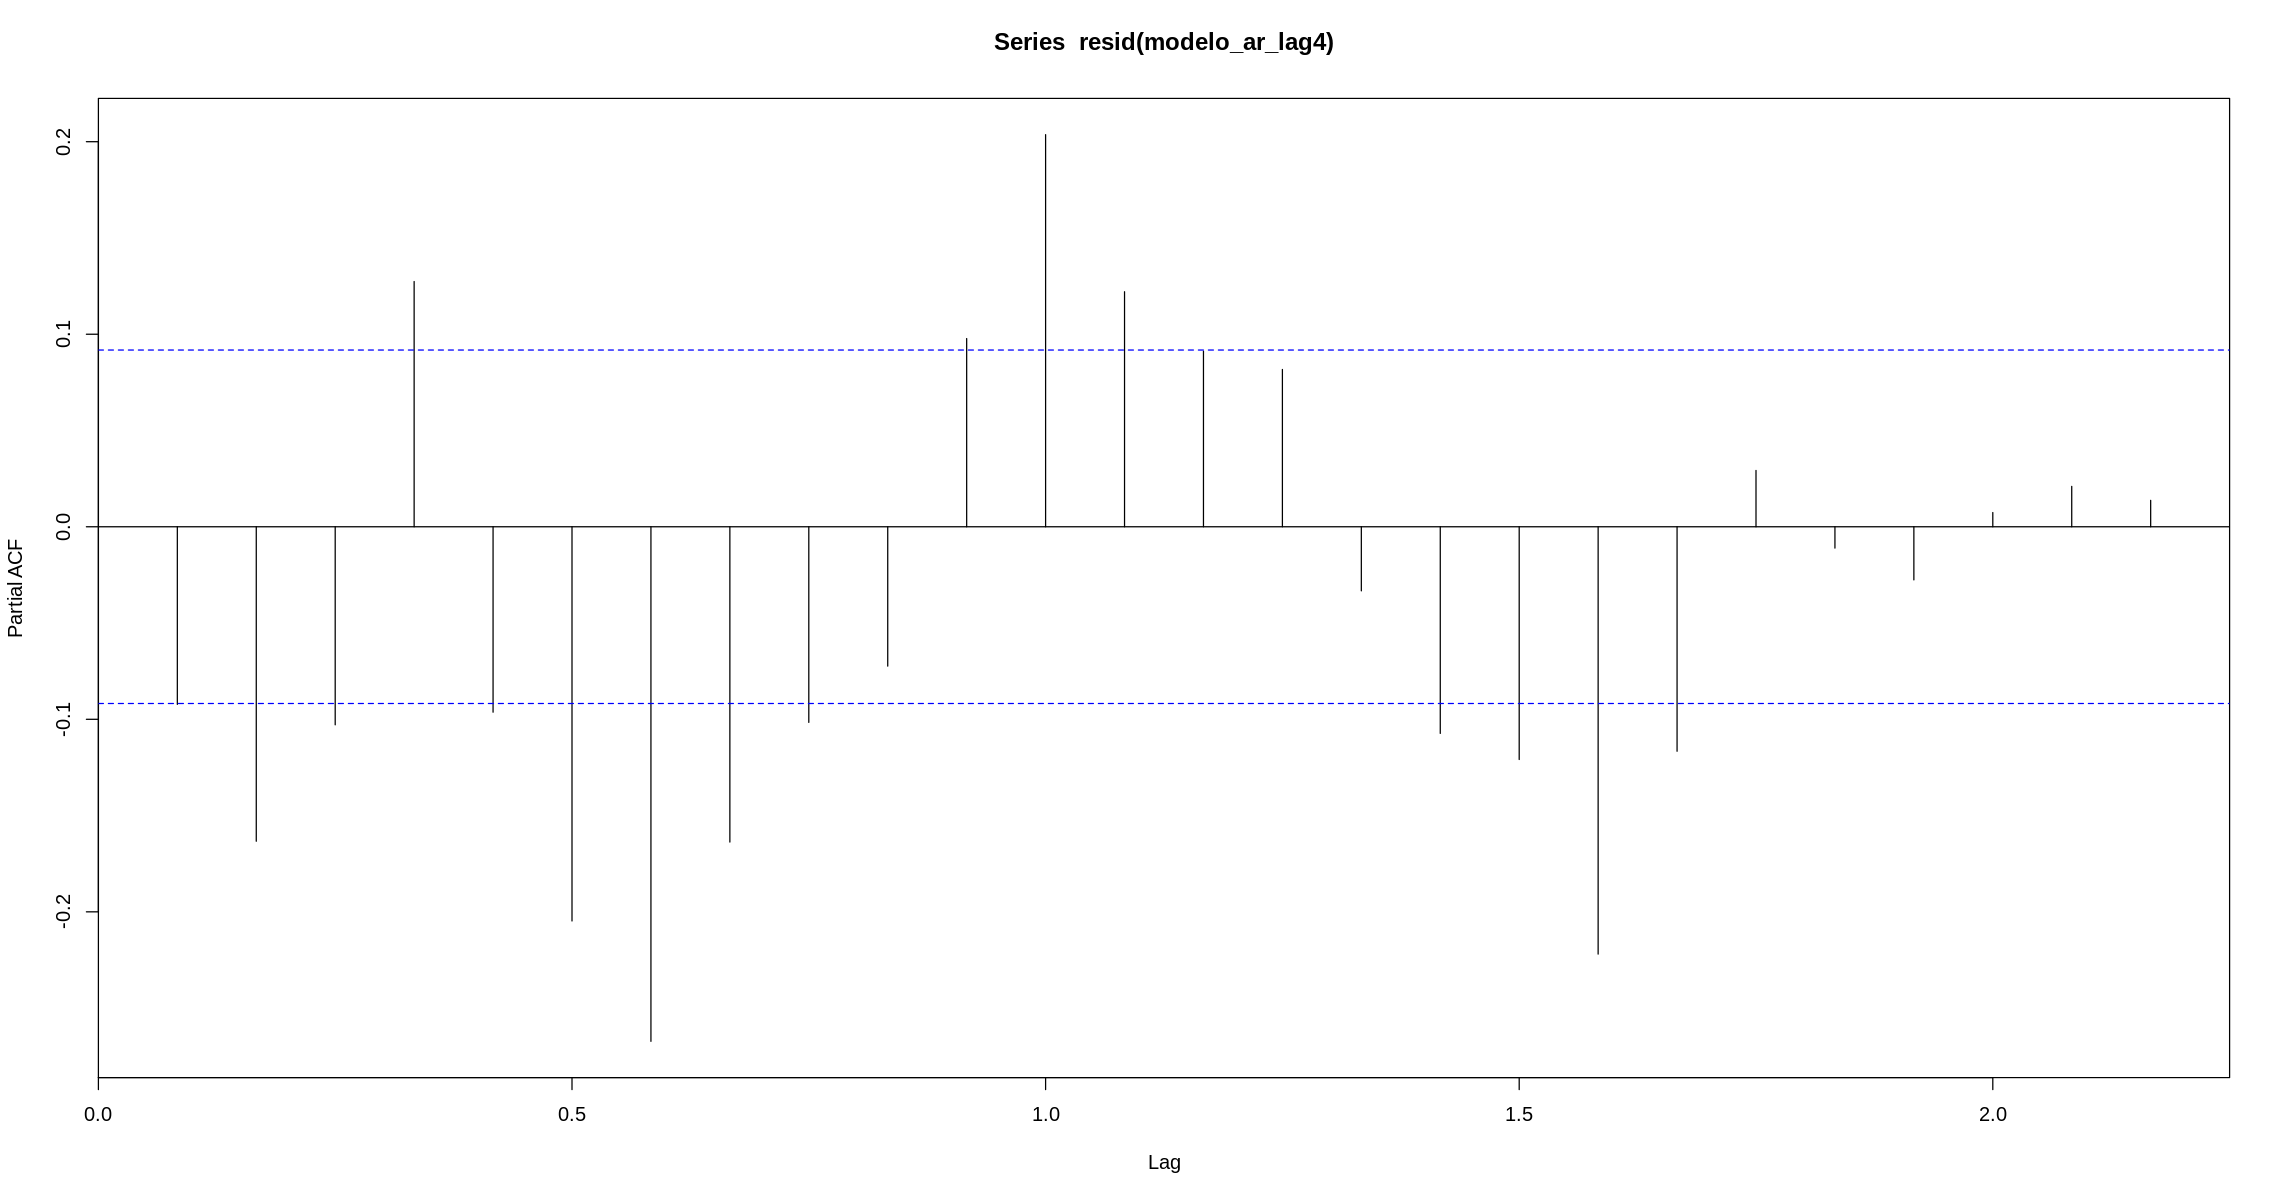

In [ ]:
pacf(resid(modelo_ar_lag4))

In [ ]:
#ainda existem lags foram do intervalo

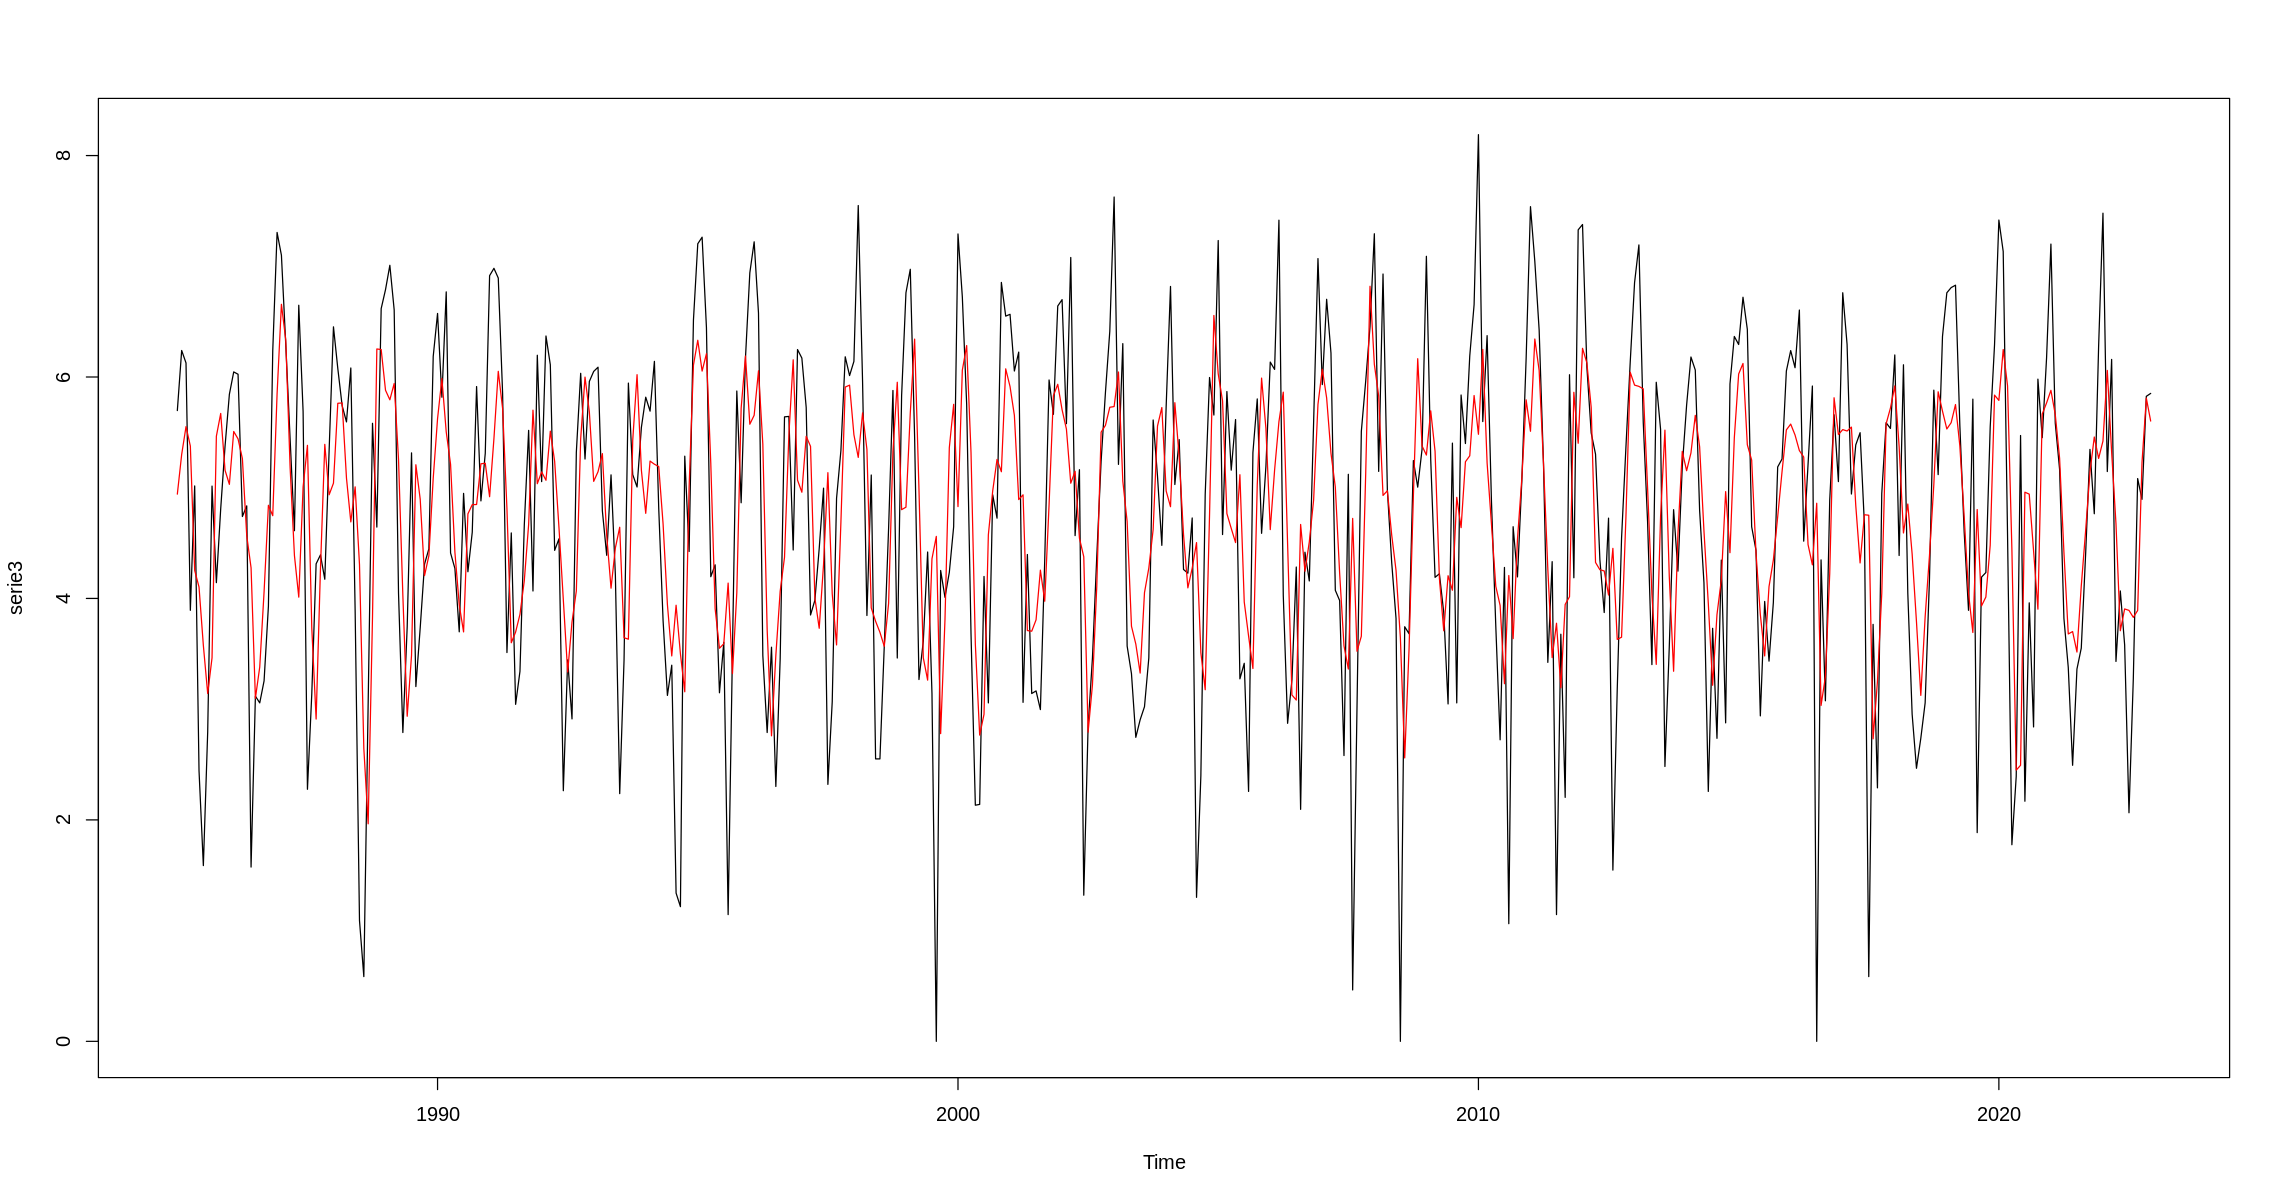

In [ ]:
#plotando a serie 3 com o modelo AR criado com lag4
plot(serie3)
lines(serie3-modelo_ar_lag4$resid, col= "red")

In [ ]:
#REALIANDO A PREVISÃO DOS DADOS
#previsão com 3 anos
previsao_ar_lag4<-
  forecast(modelo_ar_lag4, h=36)

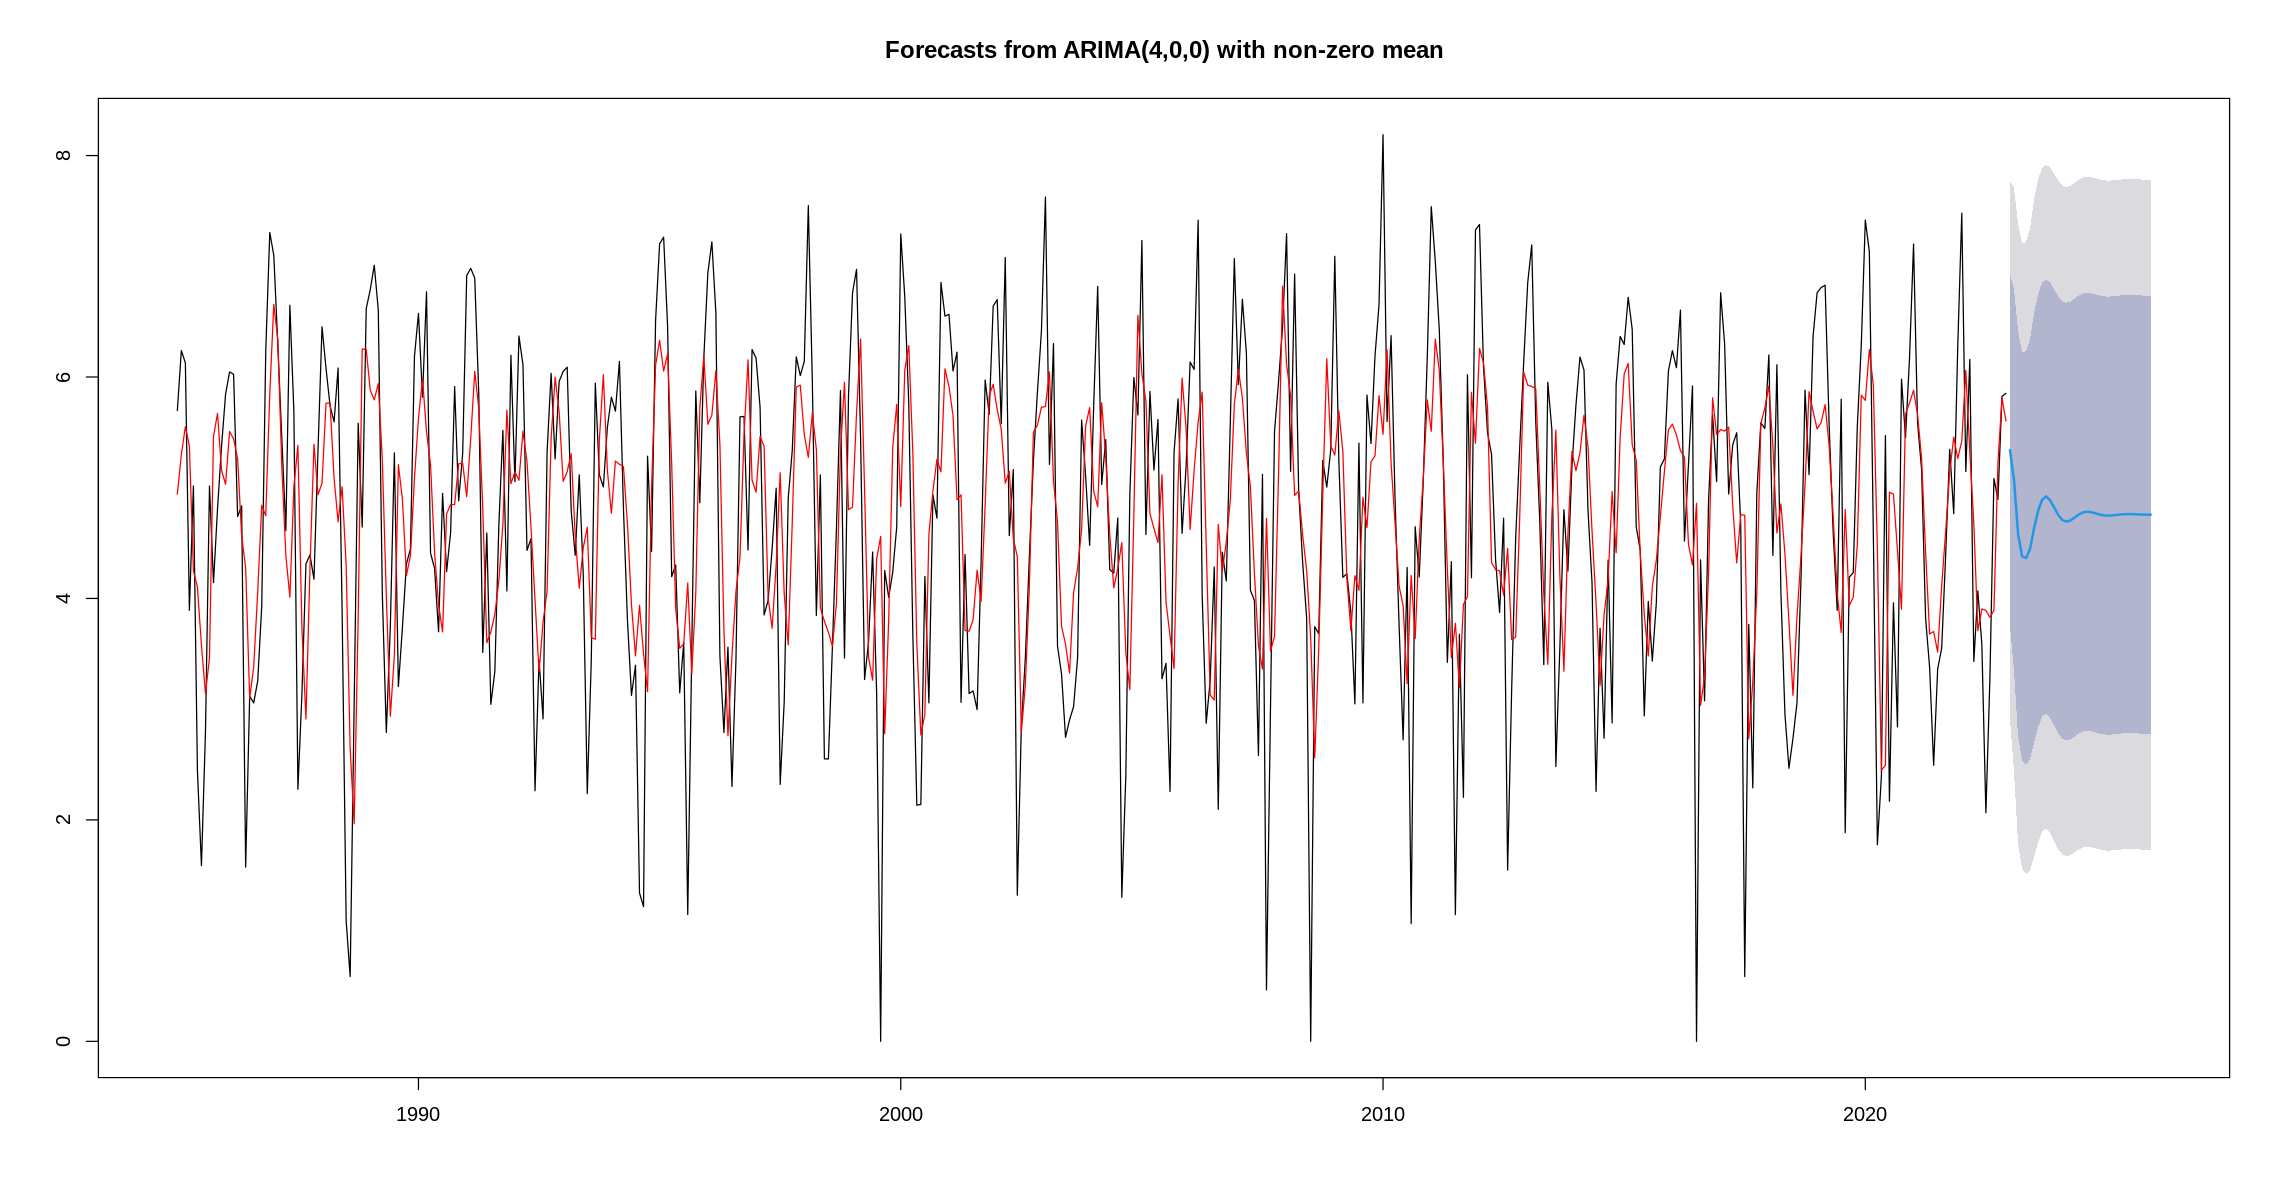

In [ ]:
#plotando a previsão
plot(previsao_ar_lag4)
lines(serie3-modelo_ar_lag4$resid, col= "red")

In [ ]:
#melhorou um pouco a média mas ainda está constante ao longo do tempo

In [ ]:
print(previsao_ar_lag4)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       5.339111 3.748873 6.929349 2.907052 7.771170
Feb 2023       5.069114 3.345855 6.792373 2.433617 7.704611
Mar 2023       4.585616 2.753933 6.417298 1.784299 7.386933
Apr 2023       4.380601 2.537040 6.224162 1.561117 7.200084
May 2023       4.364923 2.497384 6.232461 1.508769 7.221076
Jun 2023       4.447477 2.549560 6.345394 1.544864 7.350090
Jul 2023       4.636949 2.696835 6.577063 1.669800 7.604098
Aug 2023       4.792375 2.834594 6.750156 1.798207 7.786543
Sep 2023       4.892479 2.933337 6.851622 1.896230 7.888729
Oct 2023       4.921998 2.962080 6.881917 1.924562 7.919435
Nov 2023       4.884737 2.919067 6.850408 1.878503 7.890972
Dec 2023       4.820477 2.848628 6.792325 1.804795 7.836159
Jan 2024       4.754377 2.779406 6.729348 1.733919 7.774835
Feb 2024       4.709287 2.733768 6.684806 1.687991 7.730583
Mar 2024       4.694288 2.718695 6.669881 1.672880 7.715697
Apr 2024       4.704067 2.727746 6.68038

In [ ]:
#destransformar os dados, pois a serie 3 foi realizada a transformação
prev_escala_ar_lag4 <-
  as.data.frame(previsao_ar_lag4)^3
View(prev_escala_ar_lag4)


Point Forecast Lo 80    Hi 80    Lo 95     Hi 95   
Jan 2023 152.19729      52.68686 332.7188 24.567360 469.3095
Feb 2023 130.25553      37.45601 313.3751 14.413081 457.3536
Mar 2023  96.42573      20.88623 264.2754  5.680711 403.0811
Apr 2023  84.06225      16.32983 241.1252  3.804579 373.2611
May 2023  83.16291      15.57601 242.0910  3.434540 376.5354
Jun 2023  87.97132      16.57280 255.4911  3.686980 397.0800
Jul 2023  99.70042      19.61386 284.5090  4.655794 439.6864
Aug 2023 110.06578      22.77573 307.5682  5.814587 472.1000
Sep 2023 117.10812      25.23980 321.6474  6.818251 490.9317
Oct 2023 119.24067      25.98904 325.9330  7.128455 496.6868
Nov 2023 116.55306      24.87322 321.4766  6.628815 491.3506
Dec 2023 112.01341      23.11571 313.3686  5.878728 481.1824
Jan 2024 107.46841      21.47117 304.7327  5.212984 469.9736
Feb 2024 104.43968      20.43078 298.7215  4.809618 461.9944
Mar 2024 103.44494      20.09471 296.7251  4.681599 459.3307
Apr 2024 104.09275      20.29607 298.1295  4.754731 461.2786
May 2024 105.73263      20.82721 301.5644  4.953118 465.9652
Jun 2024 107.52987      21.42441 305.2535  5.180872 470.9500
Jul 2024 108.85001      21.87307 307.9145  5.355128 474.5138
Aug 2024 109.40884      22.06498 309.0319  5.430356 476.0046
Sep 2024 109.24197      22.00539 308.7113  5.406504 475.5861
Oct 2024 108.62846      21.79124 307.5055  5.321913 473.9923
Nov 2024 107.90537      21.54140 306.0718  5.224021 472.0890
Dec 2024 107.34051      21.34802 304.9434  5.148815 470.5851
Jan 2025 107.06944      21.25572 304.3995  5.113081 469.8588
Feb 2025 107.08951      21.26228 304.4413  5.115567 469.9158
Mar 2025 107.30617      21.33551 304.8792  5.143805 470.5028
Apr 2025 107.58989      21.43180 305.4507  5.181049 471.2677
May 2025 107.82808      21.51294 305.9290  5.212531 471.9069
Jun 2025 107.95704      21.55698 306.1875  5.229654 472.2520
Jul 2025 107.96771      21.56060 306.2091  5.231055 472.2809
Aug 2025 107.89247      21.53481 306.0587  5.221010 472.0806
Sep 2025 107.78189      21.49698 305.8376  5.206292 471.7856
Oct 2025 107.68266      21.46309 305.6388  5.193121 471.5204
Nov 2025 107.62360      21.44294 305.5204  5.185297 471.3623
Dec 2025 107.61170      21.43887 305.4966  5.183719 471.3305

In [ ]:
#foi modificada a média inicial dos dados, as ao decorrer do tempo ela vai estagnando

######4.3.3-MODELO COM ORDEM 10

In [ ]:
#modelo com ordem 10
modelo_ar_lag10<-
  arima(serie3, order=c(10,0,0))

In [ ]:
summary(modelo_ar_lag10)


Call:
arima(x = serie3, order = c(10, 0, 0))

Coefficients:
         ar1     ar2      ar3      ar4      ar5      ar6      ar7      ar8
      0.1041  0.0525  -0.0941  -0.0967  -0.1962  -0.2832  -0.2471  -0.0612
s.e.  0.0468  0.0471   0.0471   0.0459   0.0440   0.0442   0.0461   0.0473
          ar9    ar10  intercept
      -0.0098  0.0126     4.7597
s.e.   0.0474  0.0472     0.0274

sigma^2 estimated as 1.121:  log likelihood = -674.33,  aic = 1372.66

Training set error measures:
                        ME     RMSE       MAE  MPE MAPE      MASE         ACF1
Training set -0.0008534514 1.058599 0.8195378 -Inf  Inf 0.6788148 0.0003316125

In [ ]:
# O AIC DIMINUI BASTANTE EM RELAÇÃO AO MODELO COM LAG 4 E O MODELO INCIAL

In [ ]:
modelo_ar_lag4$aic

[1] 1503.706

In [ ]:
modelo_ar$aic

[1] 1566.087

In [ ]:
modelo_ar_lag10$aic

[1] 1372.663


	Ljung-Box test

data:  Residuals from ARIMA(10,0,0) with non-zero mean
Q* = 46.371, df = 14, p-value = 2.438e-05

Model df: 10.   Total lags used: 24



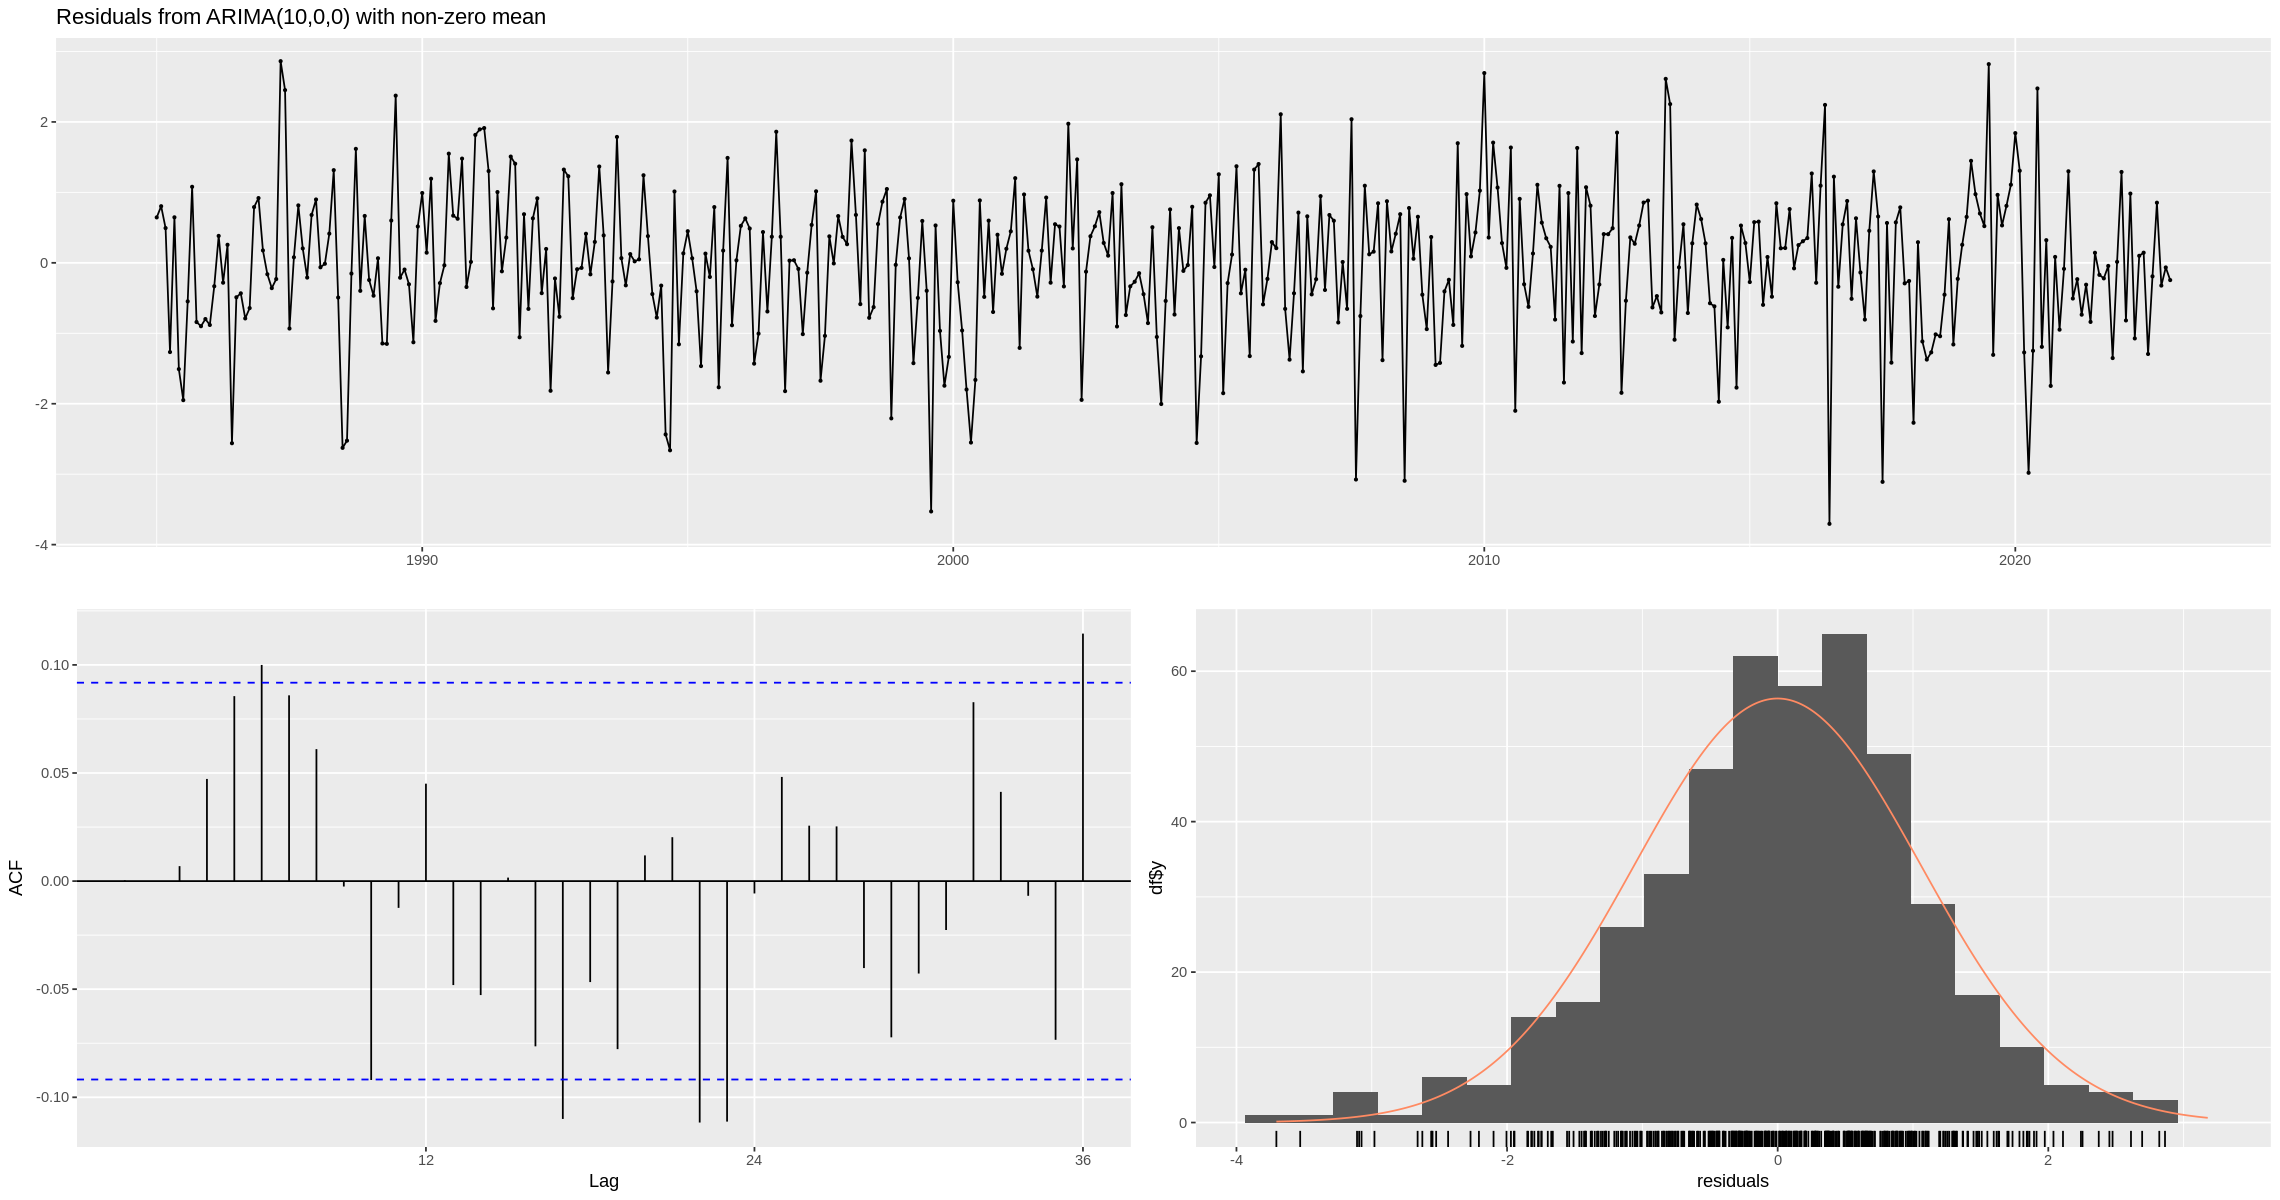

In [ ]:
# Análise dos resíduos (qualidade do modelo)
checkresiduals(modelo_ar_lag10)

In [ ]:
#maioria dos lags dos resíduos estão abaixo dos limites
#aparentemente a média é constante

In [ ]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_ar_lag10))


	Shapiro-Wilk normality test

data:  resid(modelo_ar_lag10)
W = 0.98837, p-value = 0.001082


In [ ]:
# a distribuição ainda não é normal, contudo está be próximo do limite de normalidade com p-value-5%

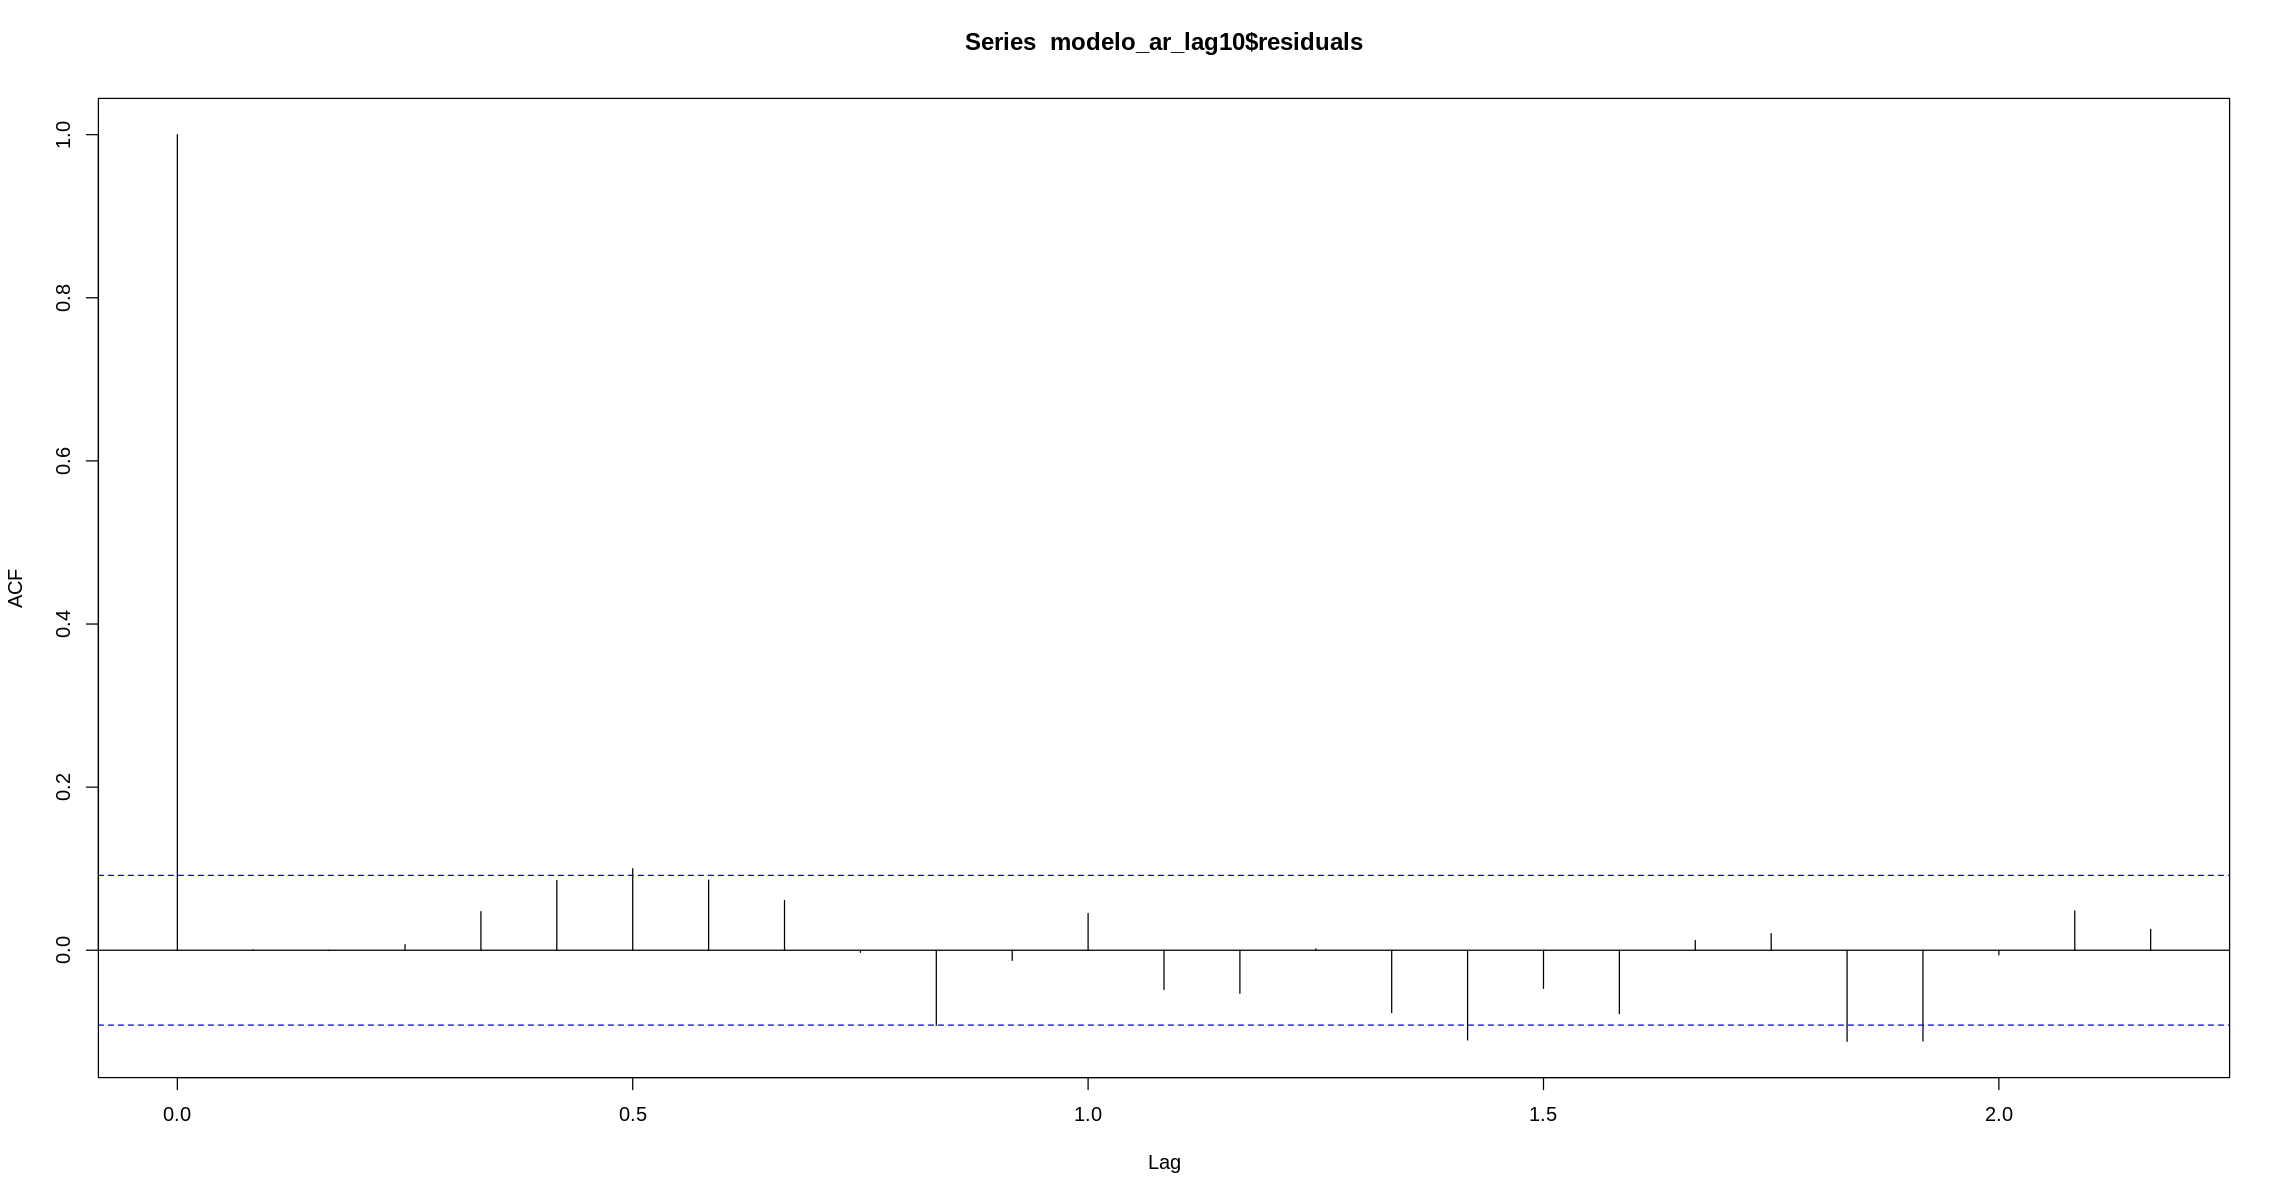

In [ ]:
#gráfico do acf
acf(modelo_ar_lag10$residuals)

In [ ]:
#os resíduos estão nos limites, pouco estão fora
#ou seja na ordem 10 eles não estão autocorrelacionados

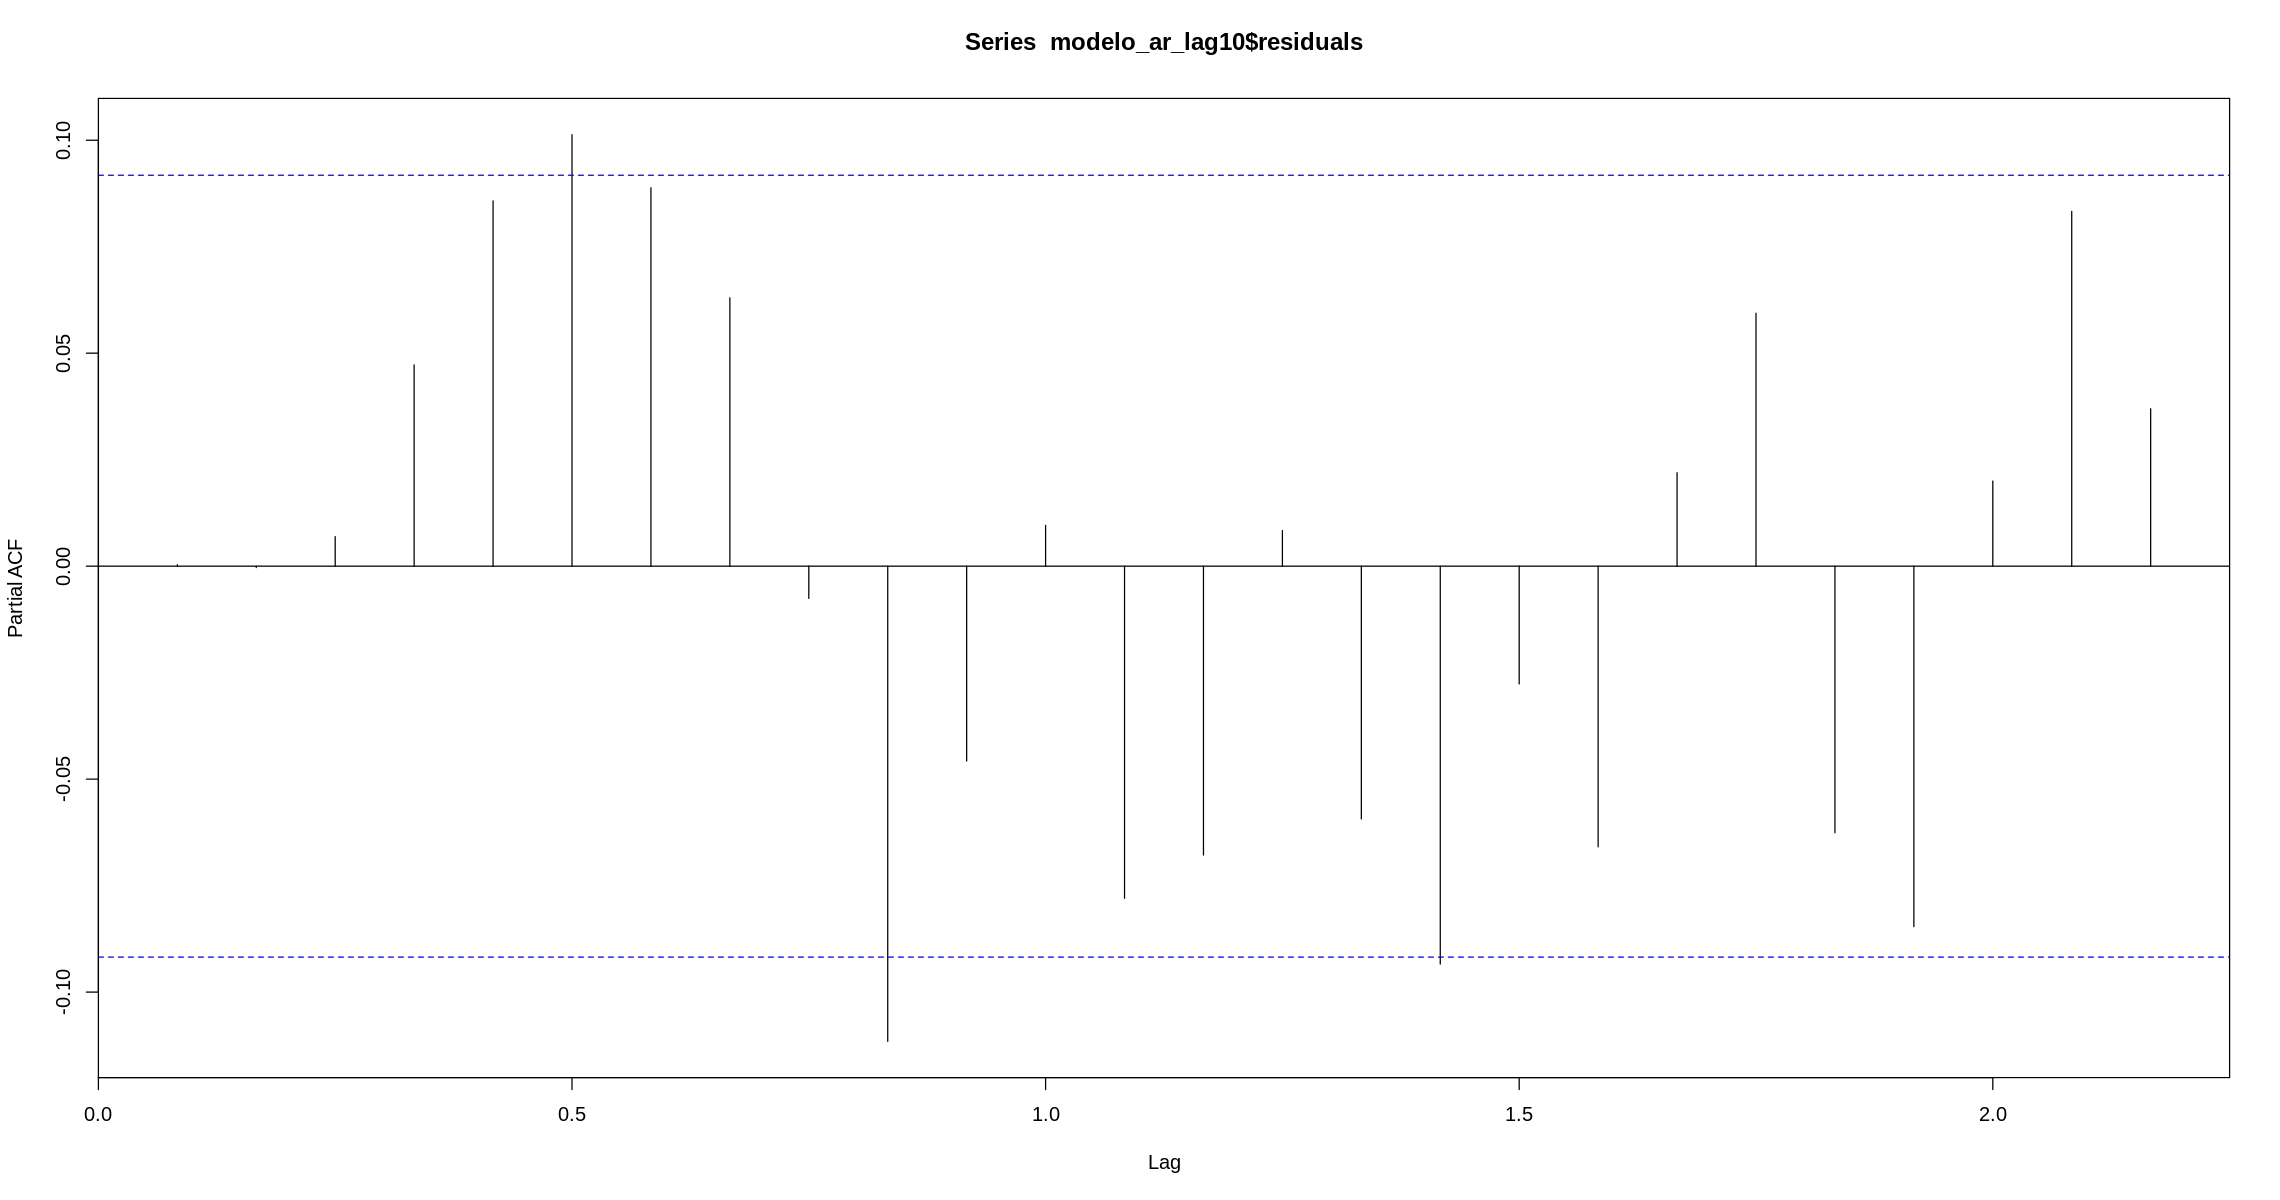

In [ ]:
pacf(modelo_ar_lag10$residuals)

In [ ]:
#o mesmo ocorre para o pacf
#demonstrando que os resíduos tem pouca ou nenhuma autocorrelação

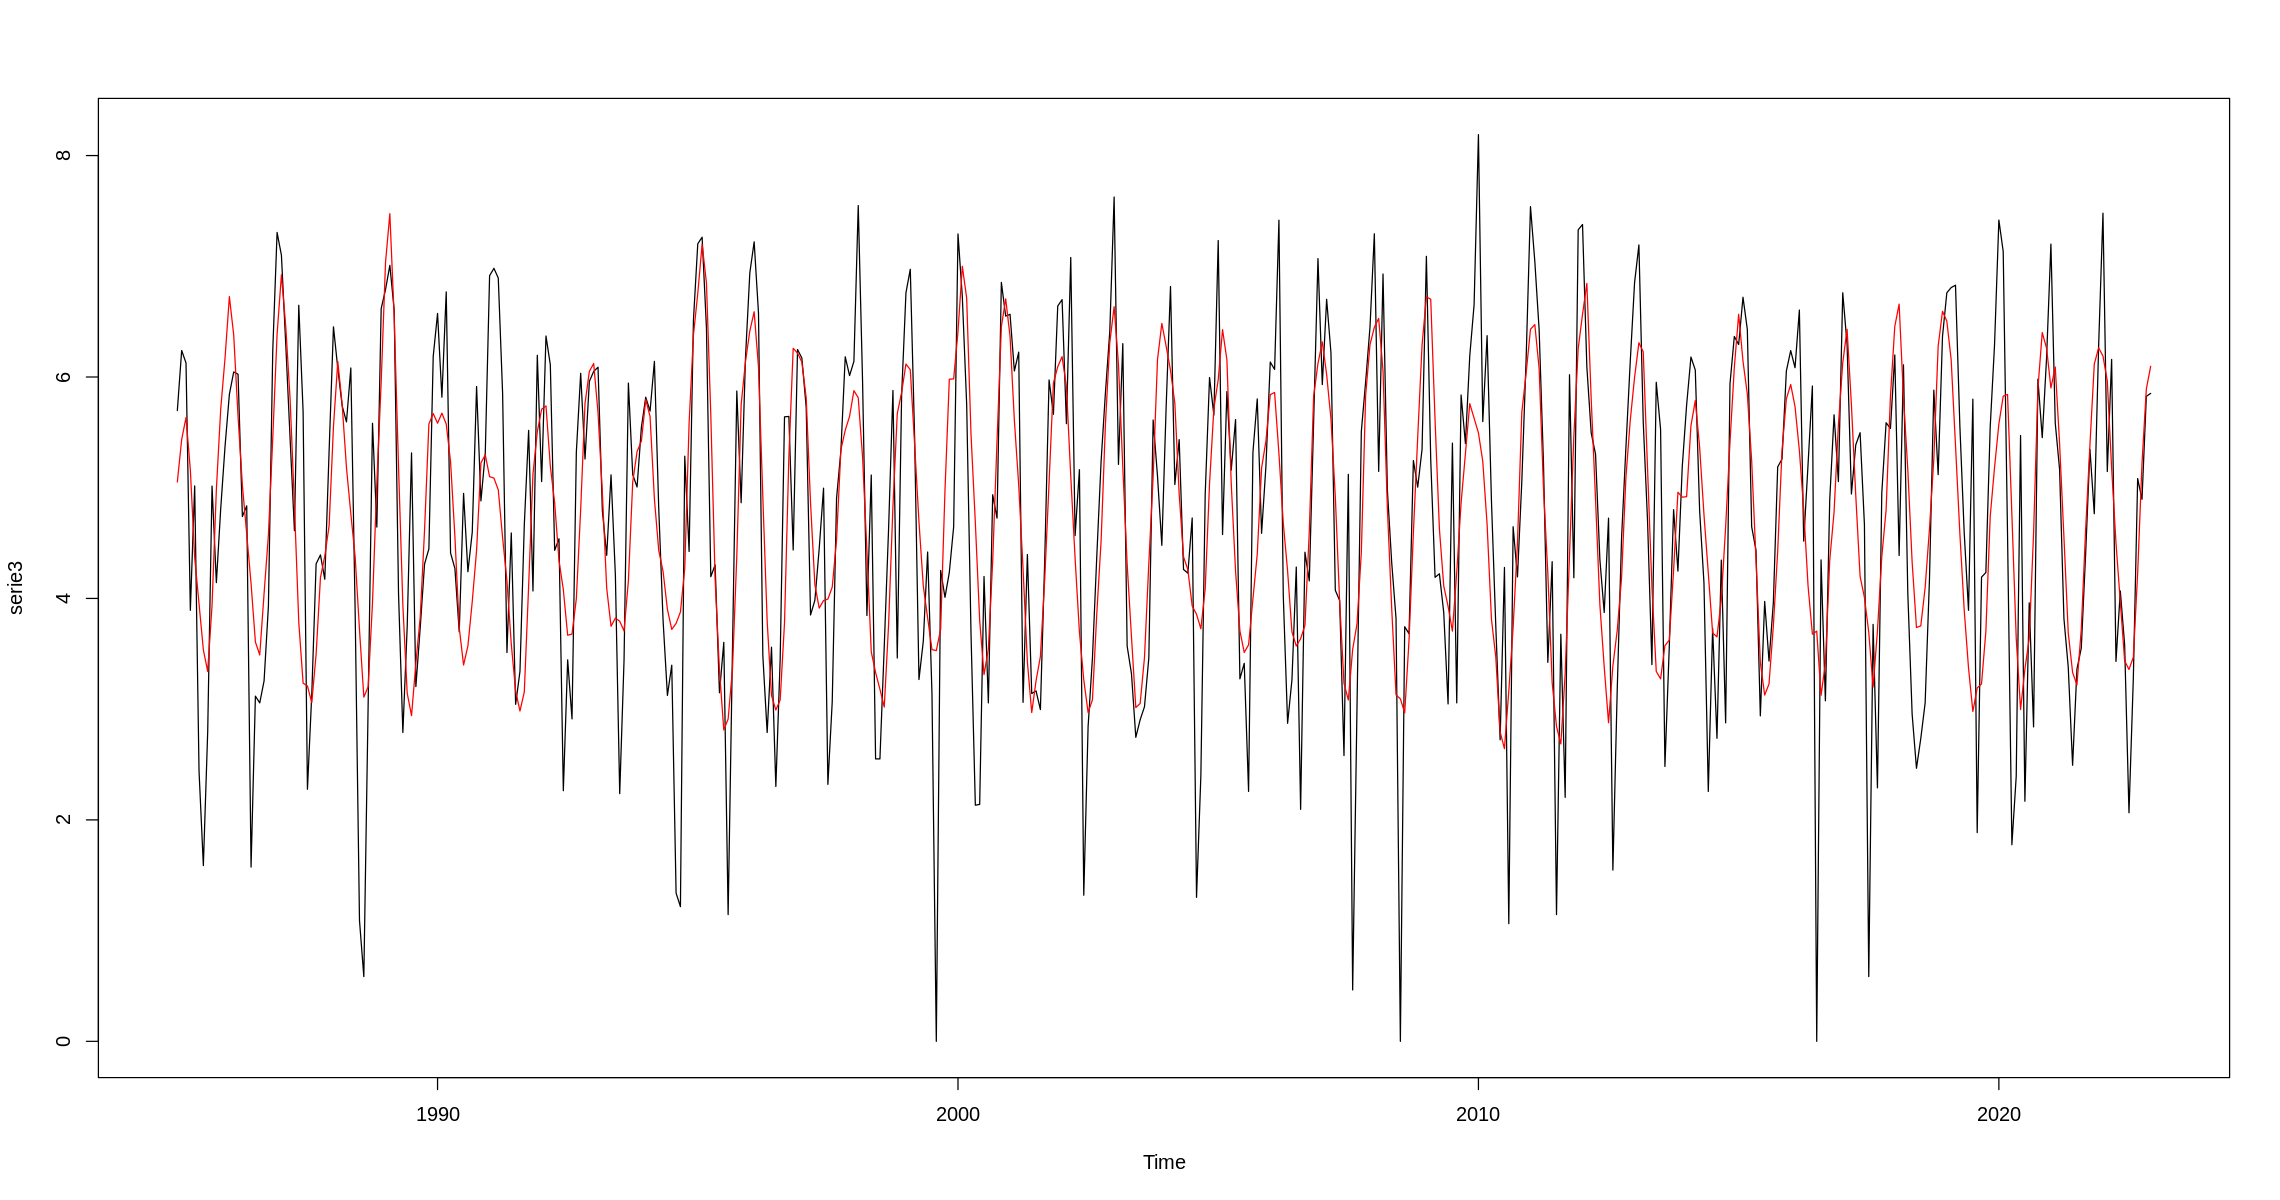

In [ ]:
#plotando a serie 3 com o modelo AR criado com lag4
plot(serie3)
lines(serie3-modelo_ar_lag10$resid, col= "red")

In [ ]:
#REALIANDO A PREVISÃO DOS DADOS
#previsão com 3 anos
previsao_ar_lag10<-
  forecast(modelo_ar_lag10, h=36)

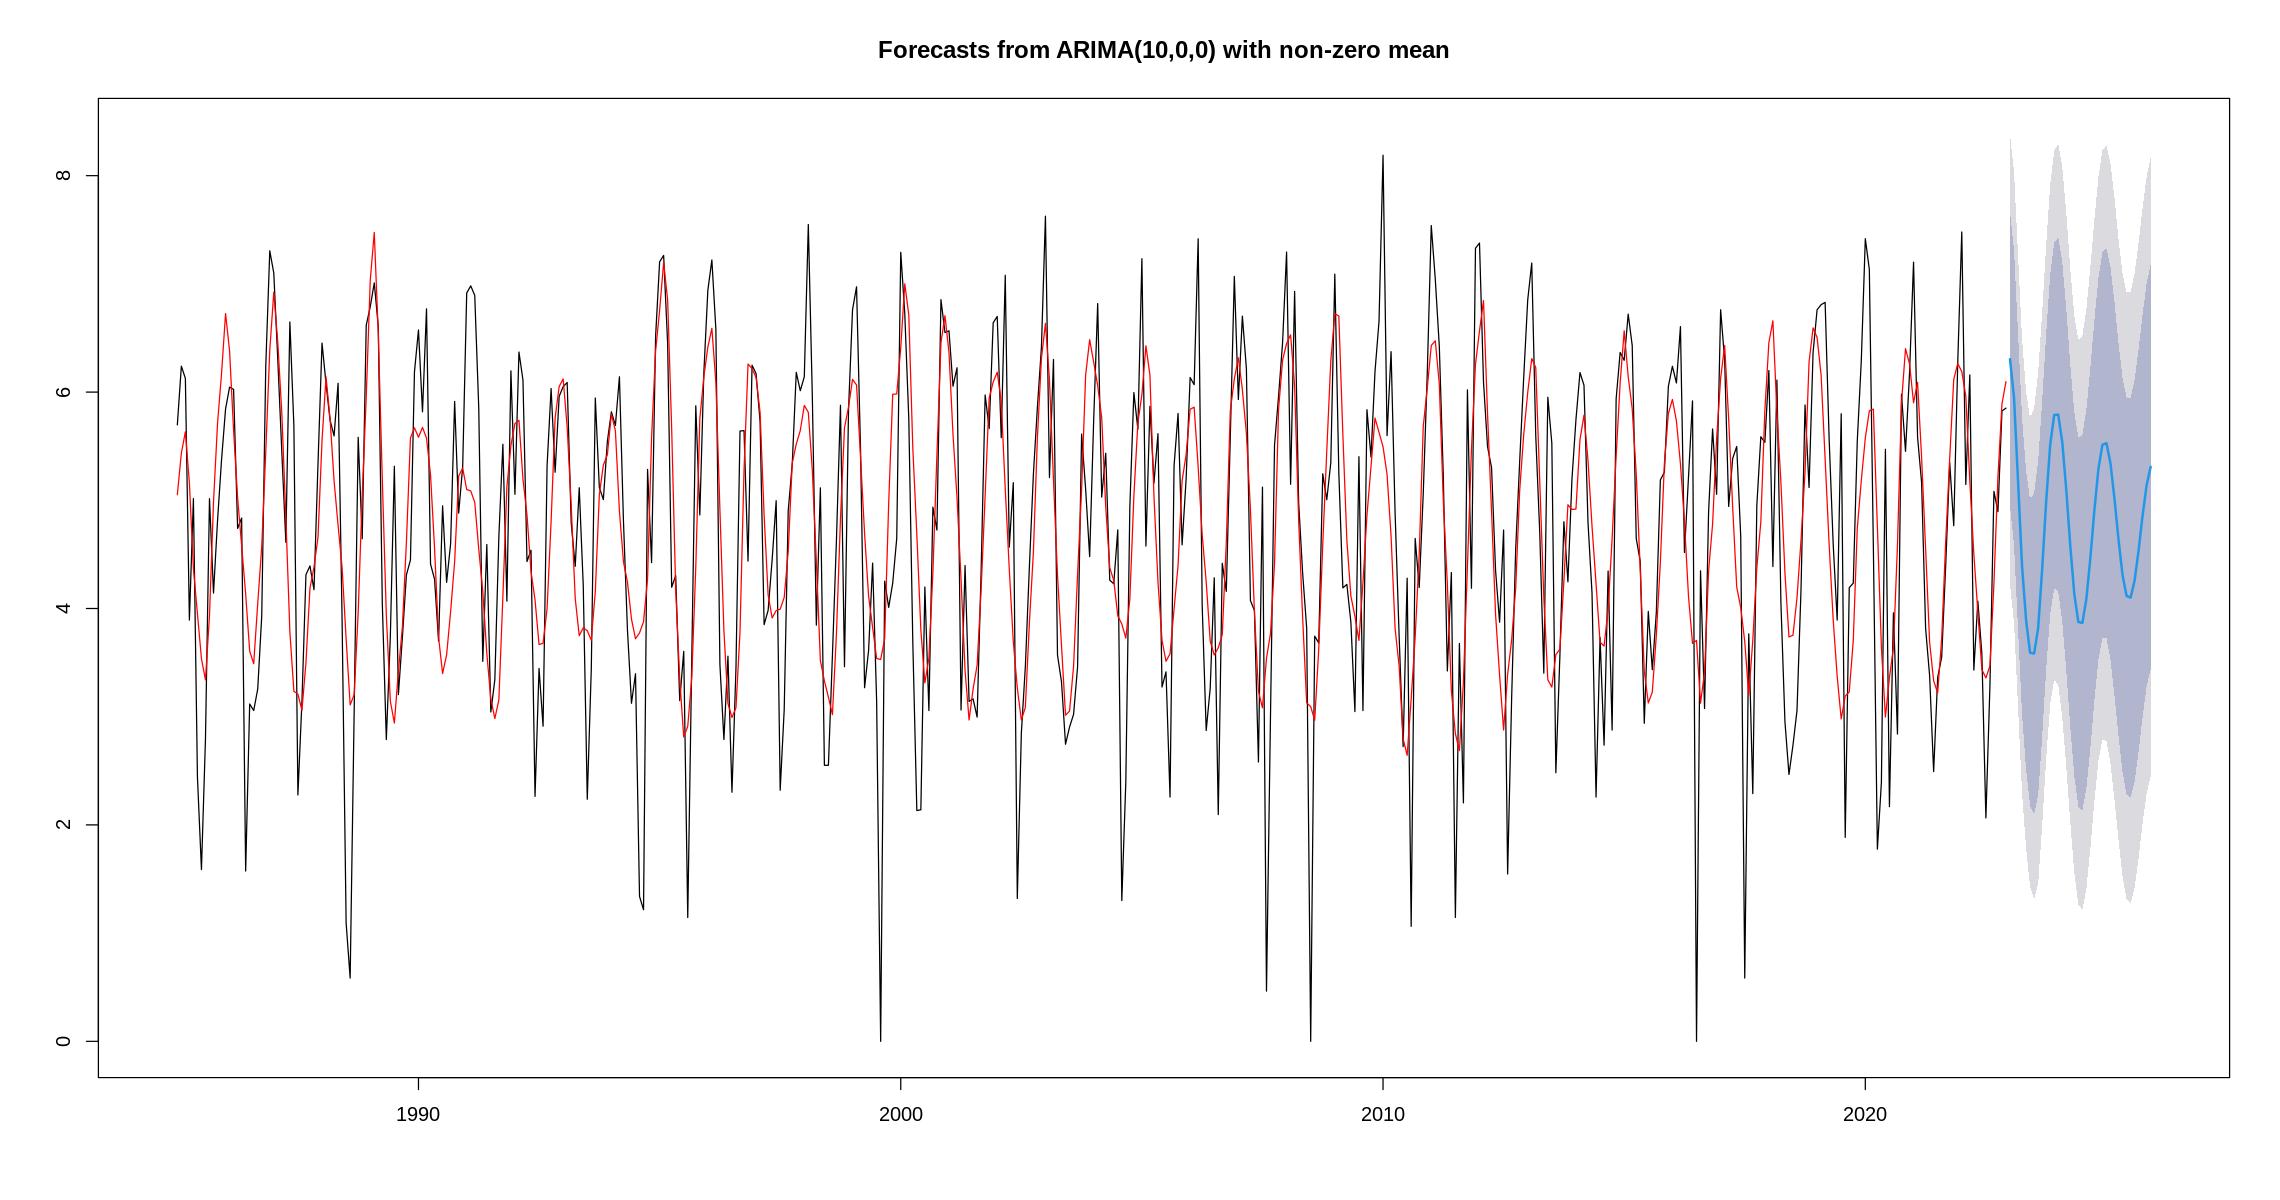

In [ ]:
#plotando a previsão
plot(previsao_ar_lag10)
lines(serie3-modelo_ar_lag10$resid, col= "red")

In [ ]:
#aparentemente ficou bem melhor
#As previsõe sestão variando com o decorrer do tempo apresentendo tendências e oscilações

In [ ]:
print(previsao_ar_lag10)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       6.304060 4.947410 7.660710 4.229243 8.378877
Feb 2023       5.949210 4.585236 7.313183 3.863192 8.035228
Mar 2023       5.175027 3.808347 6.541707 3.084870 7.265183
Apr 2023       4.389788 3.018589 5.760988 2.292719 6.486857
May 2023       3.893168 2.513626 5.272710 1.783340 6.002995
Jun 2023       3.590238 2.176395 5.004082 1.427951 5.752525
Jul 2023       3.583906 2.100182 5.067631 1.314746 5.853067
Aug 2023       3.817544 2.272734 5.362354 1.454960 6.180128
Sep 2023       4.362798 2.811187 5.914409 1.989814 6.735782
Oct 2023       4.990441 3.437941 6.542942 2.616097 7.364786
Nov 2023       5.513725 3.945246 7.082204 3.114943 7.912506
Dec 2023       5.788271 4.190913 7.385629 3.345323 8.231219
Jan 2024       5.791796 4.156100 7.427492 3.290216 8.293377
Feb 2024       5.538667 3.874417 7.202917 2.993417 8.083917
Mar 2024       5.097913 3.425388 6.770437 2.540007 7.655818
Apr 2024       4.578658 2.905949 6.25136

In [ ]:
#destransformar os dados, pois a serie 3 foi realizada a transformação
prev_escala_ar_lag10 <-
  as.data.frame(previsao_ar_lag10)^3
View(prev_escala_ar_lag10)

Point Forecast Lo 80     Hi 80    Lo 95     Hi 95   
Jan 2023 250.53073      121.09711 449.5800 75.646360 588.2438
Feb 2023 210.56095       96.40178 391.1284 57.655244 518.7935
Mar 2023 138.59188       55.23438 279.9453 29.356931 383.4774
Apr 2023  84.59228       27.50501 191.2013 12.051823 272.9625
May 2023  59.00779       15.88187 146.5891  5.671559 216.3237
Jun 2023  46.27750       10.30892 125.3064  2.911657 190.3600
Jul 2023  46.03308        9.26341 130.1412  2.272613 200.5167
Aug 2023  55.63552       11.73939 154.1937  3.080020 236.0437
Sep 2023  83.04154       22.21618 206.8874  7.878393 305.6076
Oct 2023 124.28448       40.63453 280.1039 17.904469 399.4665
Nov 2023 167.62362       61.40761 355.2264 30.223890 495.3842
Dec 2023 193.93070       73.60818 402.8676 37.438143 557.6894
Jan 2024 194.28523       71.78903 409.7571 35.618287 570.4192
Feb 2024 169.90877       58.15931 373.7018 26.822647 528.2817
Mar 2024 132.48821       40.19106 310.3489 16.387207 448.7194
Apr 2024  95.98751       24.53939 244.3010  8.248157 363.5124
May 2024  70.54794       14.69022 196.6201  3.783624 301.5415
Jun 2024  58.21135       10.20503 173.9360  2.027577 272.7861
Jul 2024  57.79618        9.70499 175.5819  1.795754 276.8097
Aug 2024  68.28468       12.74142 199.0791  2.793362 309.7859
Sep 2024  89.31923       19.96826 241.4754  5.666696 366.6502
Oct 2024 118.34914       31.33223 296.3192 10.976430 438.4583
Nov 2024 148.06156       43.85876 351.0061 17.432402 509.6443
Dec 2024 167.59383       52.02011 388.0272 21.729374 558.7216
Jan 2025 168.90991       51.80412 393.4728 21.368547 567.7899
Feb 2025 152.34802       43.90567 366.1278 16.936048 534.1408
Mar 2025 125.94798       32.63848 318.5333 11.149450 472.9493
Apr 2025  99.59284       22.38828 268.6025  6.400087 407.5146
May 2025  80.00927       15.39567 230.3873  3.536513 357.0822
Jun 2025  69.74365       11.90261 210.5683  2.262902 331.3202
Jul 2025  68.96774       11.44887 210.4351  2.077719 332.2106
Aug 2025  77.21520       13.85265 228.6488  2.856155 357.5695
Sep 2025  93.47927       19.22793 261.8761  4.867414 402.2943
Oct 2025 114.93463       27.07068 303.6582  8.221675 457.5548
Nov 2025 136.00907       35.29189 343.7680 12.074610 510.3106
Dec 2025 149.68133       40.66038 370.2058 14.675487 545.4902

In [ ]:
#dados reais de de 2023, temos:
#Ano	Janeiro	Fevereiro	Março	Abril	Maio	Junho	Julho	Agosto	Setembro	Outubro	Novembro	Dezembro
#2023	377,6	    452	    138,2	165,7	43,3	85,2	15	  ---	    ---	      ---	     ---	      ---


In [ ]:
#APESAR DA MELHORIA, OS DADOS AINDA ESTÃO UM POUCO LONGE DO OCORIDO EM 2023
#SENDO O MÊS DE MARÇO O MAIS PRÓXIMO


#####4.4-CONCLUSÕES DO MODELO AR-AUTOREGRESSIVO

In [ ]:
cat("
Após a criação dos modelos de autoregressão,autoregressão com lag4 e lag10, verificou-se que o modelo com lag10 é o mais adequado entre os desta classe./n
Sendo necessário utilizar os modelos de Média móvel,fazer combinações com o ARMA,ARIMA, SARIMA E AUTOARIMA parar se ter um conclusão final.
Apesar disso, espera-se que existe potencial evolução nos modelos sendo o AR o primeiro a ser utilizado e chegou em dados próximso com o real
em 2023
")


Após a criação dos modelos de autoregressão,autoregressão com lag4 e lag10, verificou-se que o modelo com lag10 é o mais adequado entre os desta classe./n
Sendo necessário utilizar os modelos de Média móvel,fazer combinações com o ARMA,ARIMA, SARIMA E AUTOARIMA parar se ter um conclusão final.
Apesar disso, espera-se que existe potencial evolução nos modelos sendo o AR o primeiro a ser utilizado e chegou em dados próximso com o real
em 2023


####5-MODELO MA-MÉDIA MÓVEL

#####5.1-TESTE DA ORDEM DA MÉDIA MÓVEL

In [ ]:
# modelo arima:(p,d,q)
#SENDO:
#P-ORDEM DA AUTOREGRESSÃO
#D-GRAU DE DIFERENCIAÇÃO
#Q-ORDEM DA MÉDIA MÓVEL

# modelo ma: (0,0,q)
#O MA É A COMBINAÇÃO LINEAR DOS ERROS PASSADOS

In [ ]:
modelo_ma <-
  arima(serie3, order = c(0,0,1))
summary(modelo_ma)


Call:
arima(x = serie3, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.3709     4.7605
s.e.  0.0347     0.0897

sigma^2 estimated as 1.953:  log likelihood = -799.67,  aic = 1605.35

Training set error measures:
                        ME     RMSE     MAE  MPE MAPE      MASE      ACF1
Training set -0.0005744796 1.397336 1.11979 -Inf  Inf 0.9275103 0.1168267

In [ ]:
#o AIC DEU ALTO, SE COMPARADO COM O MODELO AR COM LAG 10

In [ ]:
modelo_ma <-
  arima(serie3, order = c(0,0,5))
summary(modelo_ma)


Call:
arima(x = serie3, order = c(0, 0, 5))

Coefficients:
         ma1     ma2      ma3      ma4      ma5  intercept
      0.3056  0.0260  -0.3153  -0.3399  -0.2570     4.7618
s.e.  0.0511  0.0437   0.0577   0.0501   0.0437     0.0257

sigma^2 estimated as 1.651:  log likelihood = -761.78,  aic = 1537.55

Training set error measures:
                       ME     RMSE      MAE  MPE MAPE      MASE       ACF1
Training set -0.004613949 1.284767 1.014448 -Inf  Inf 0.8402568 0.06544298

In [ ]:
modelo_ma <-
  arima(serie3, order = c(0,0,8))
summary(modelo_ma)


Call:
arima(x = serie3, order = c(0, 0, 8))

Coefficients:
         ma1     ma2      ma3      ma4      ma5      ma6      ma7      ma8
      0.2916  0.2097  -0.0228  -0.1132  -0.2280  -0.3446  -0.3418  -0.1131
s.e.  0.0466  0.0454   0.0436   0.0417   0.0433   0.0424   0.0450   0.0464
      intercept
         4.7654
s.e.     0.0194

sigma^2 estimated as 1.384:  log likelihood = -721.91,  aic = 1463.81

Training set error measures:
                       ME     RMSE       MAE  MPE MAPE      MASE         ACF1
Training set -0.004731545 1.176452 0.9280256 -Inf  Inf 0.7686742 0.0009468127

#####5.2-CRIAÇÃO DO MODELO DE MA

In [ ]:
#O AIC COM A ORDEM 8 DEU O MENOR AIC


	Ljung-Box test

data:  Residuals from ARIMA(0,0,8) with non-zero mean
Q* = 161.33, df = 16, p-value < 2.2e-16

Model df: 8.   Total lags used: 24



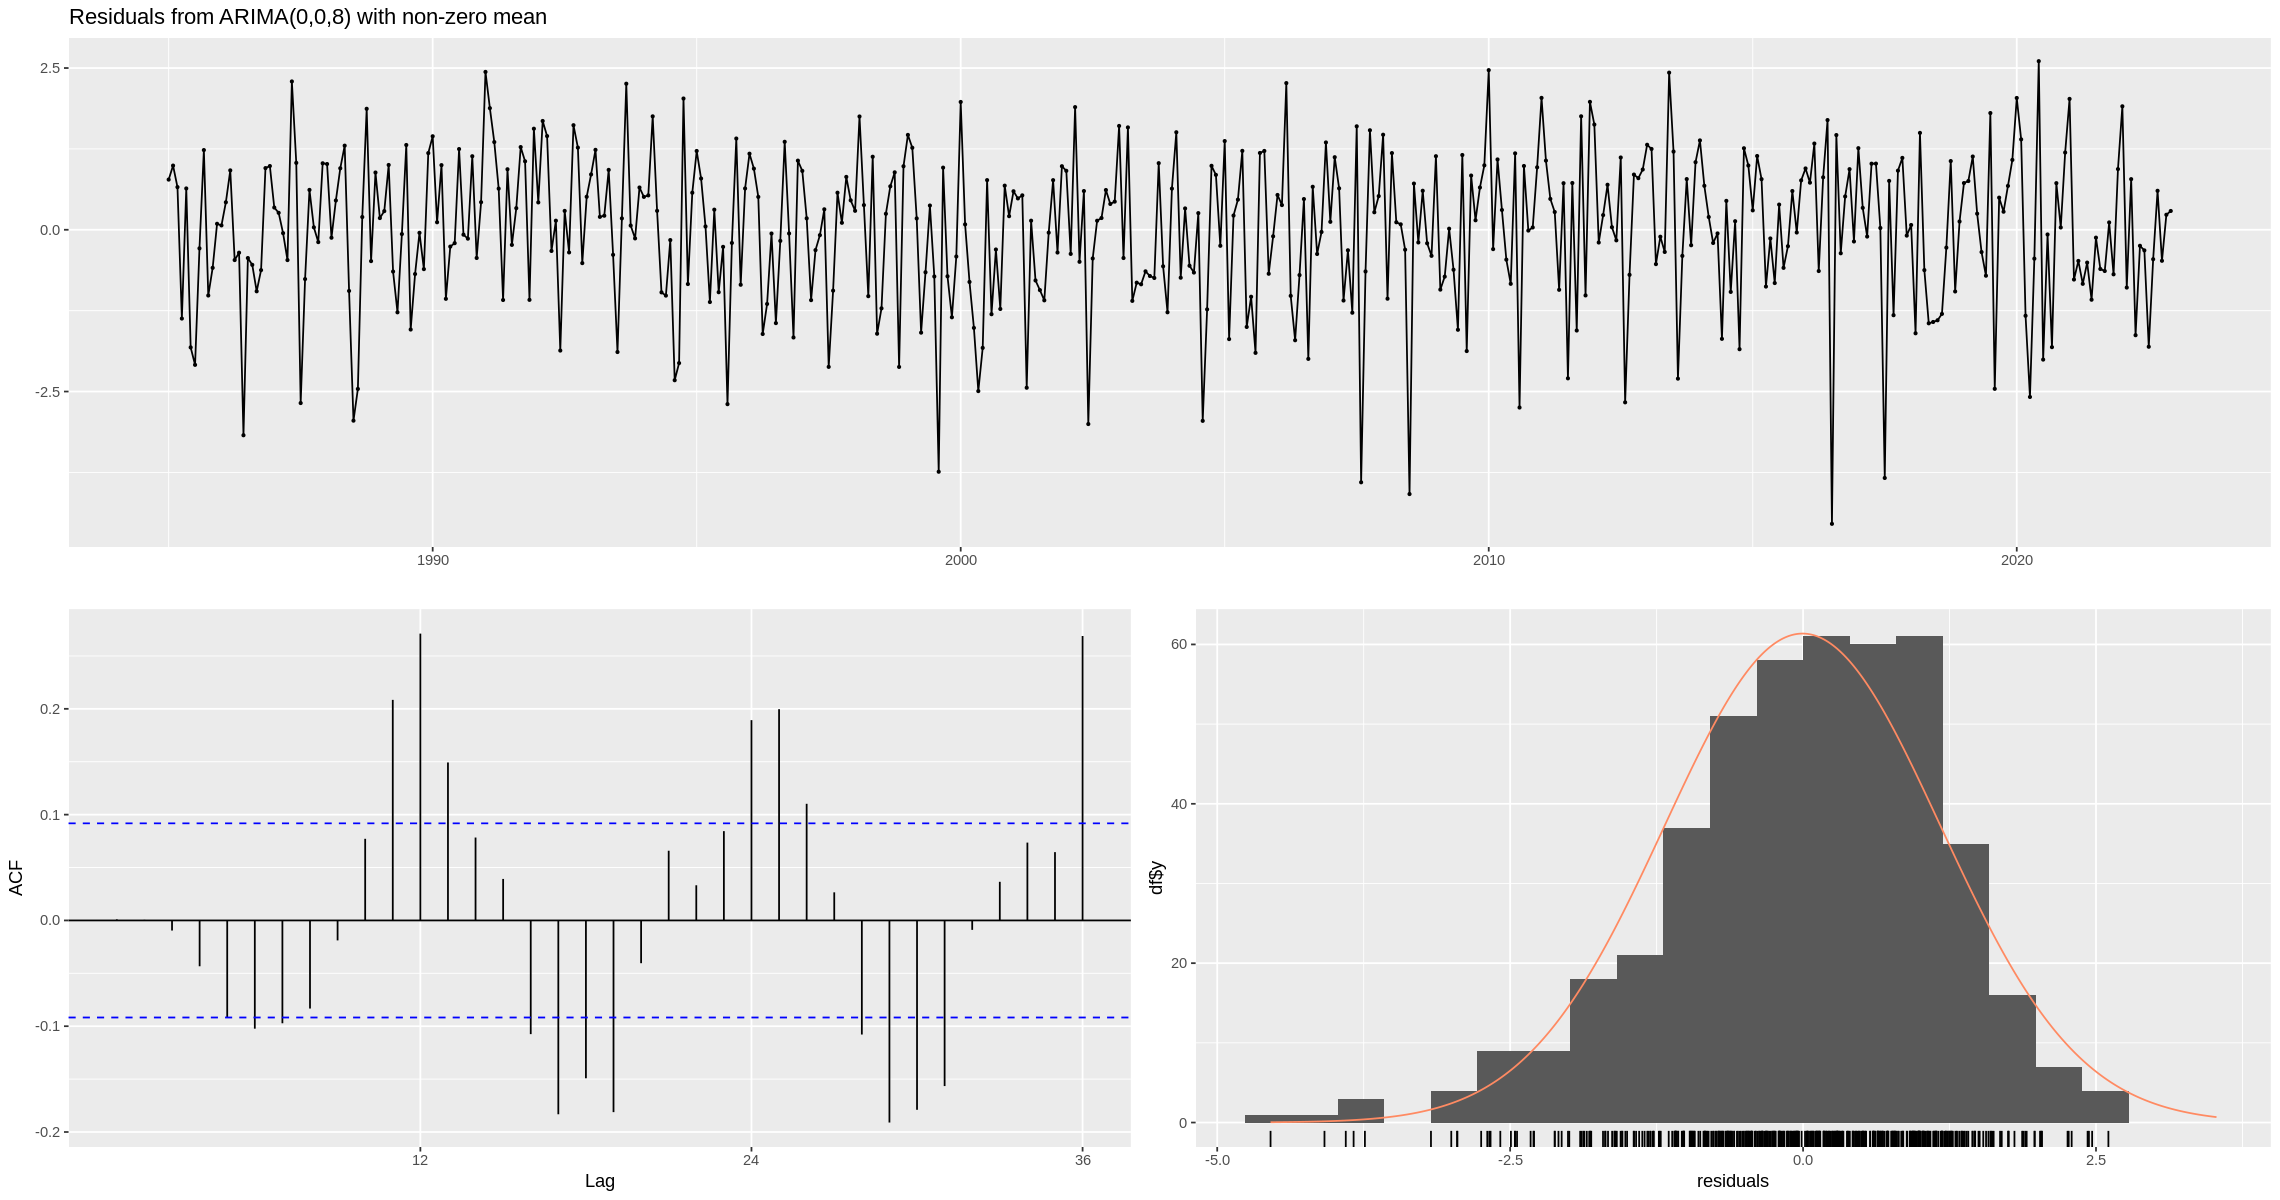

In [ ]:
# Análise dos resíduos (qualidade do modelo)
checkresiduals(modelo_ma)

In [ ]:
#MUITOS LAGS DOS RESÍDUOS FORA DOS LIMITES

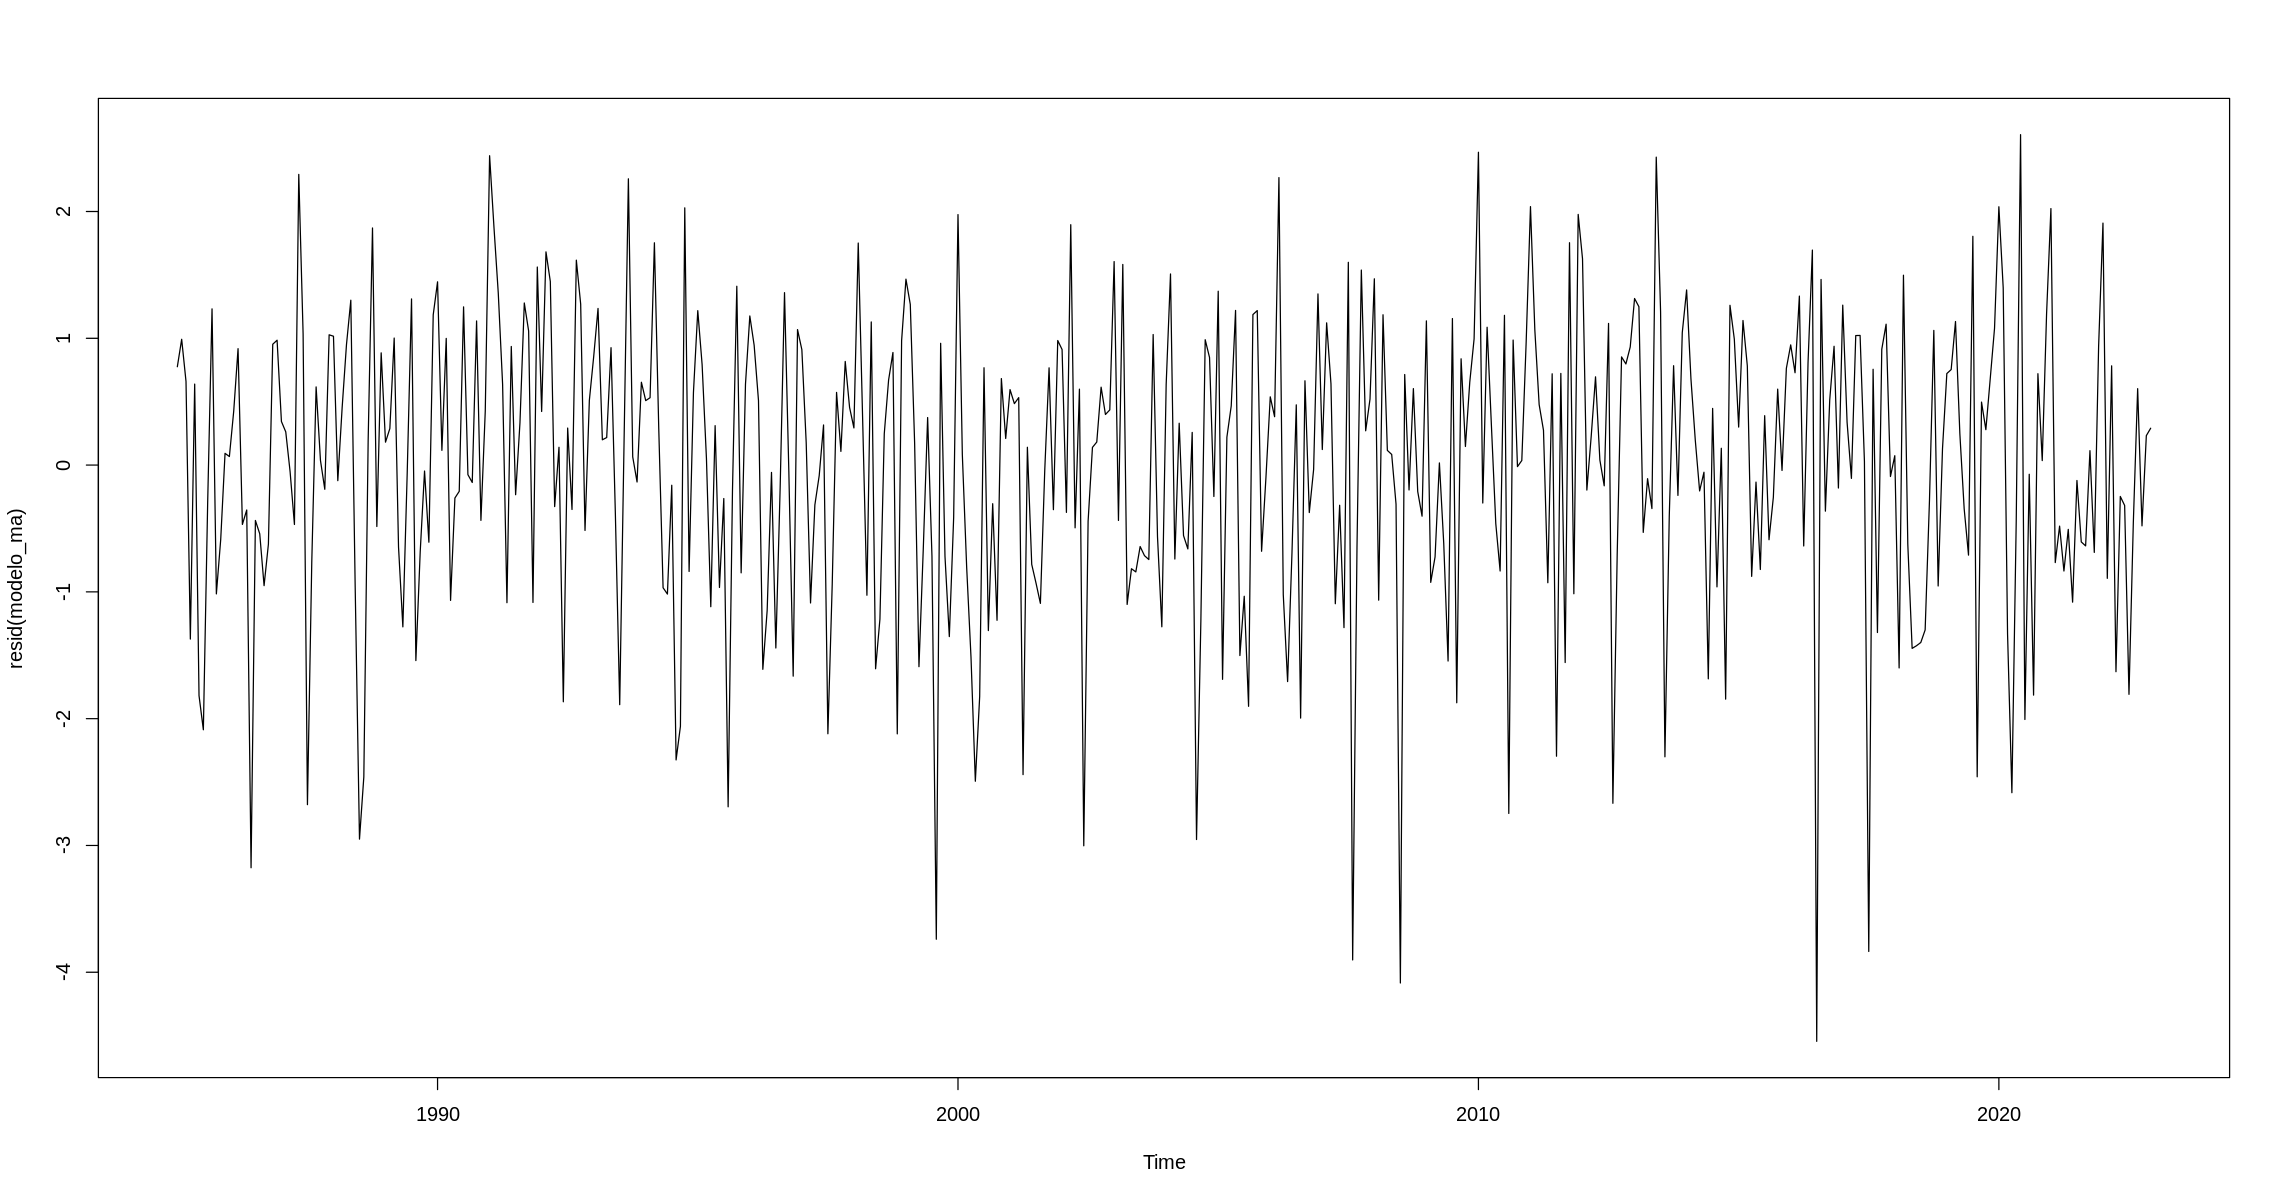

In [ ]:
plot(resid(modelo_ma))

In [ ]:
# A MÉDIA APARENTEMENTE UM POUCO FORA

In [ ]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_ma))


	Shapiro-Wilk normality test

data:  resid(modelo_ma)
W = 0.97528, p-value = 5.518e-07


In [ ]:
# A DISTRIBUIÇÃO NÃO É NORMAL

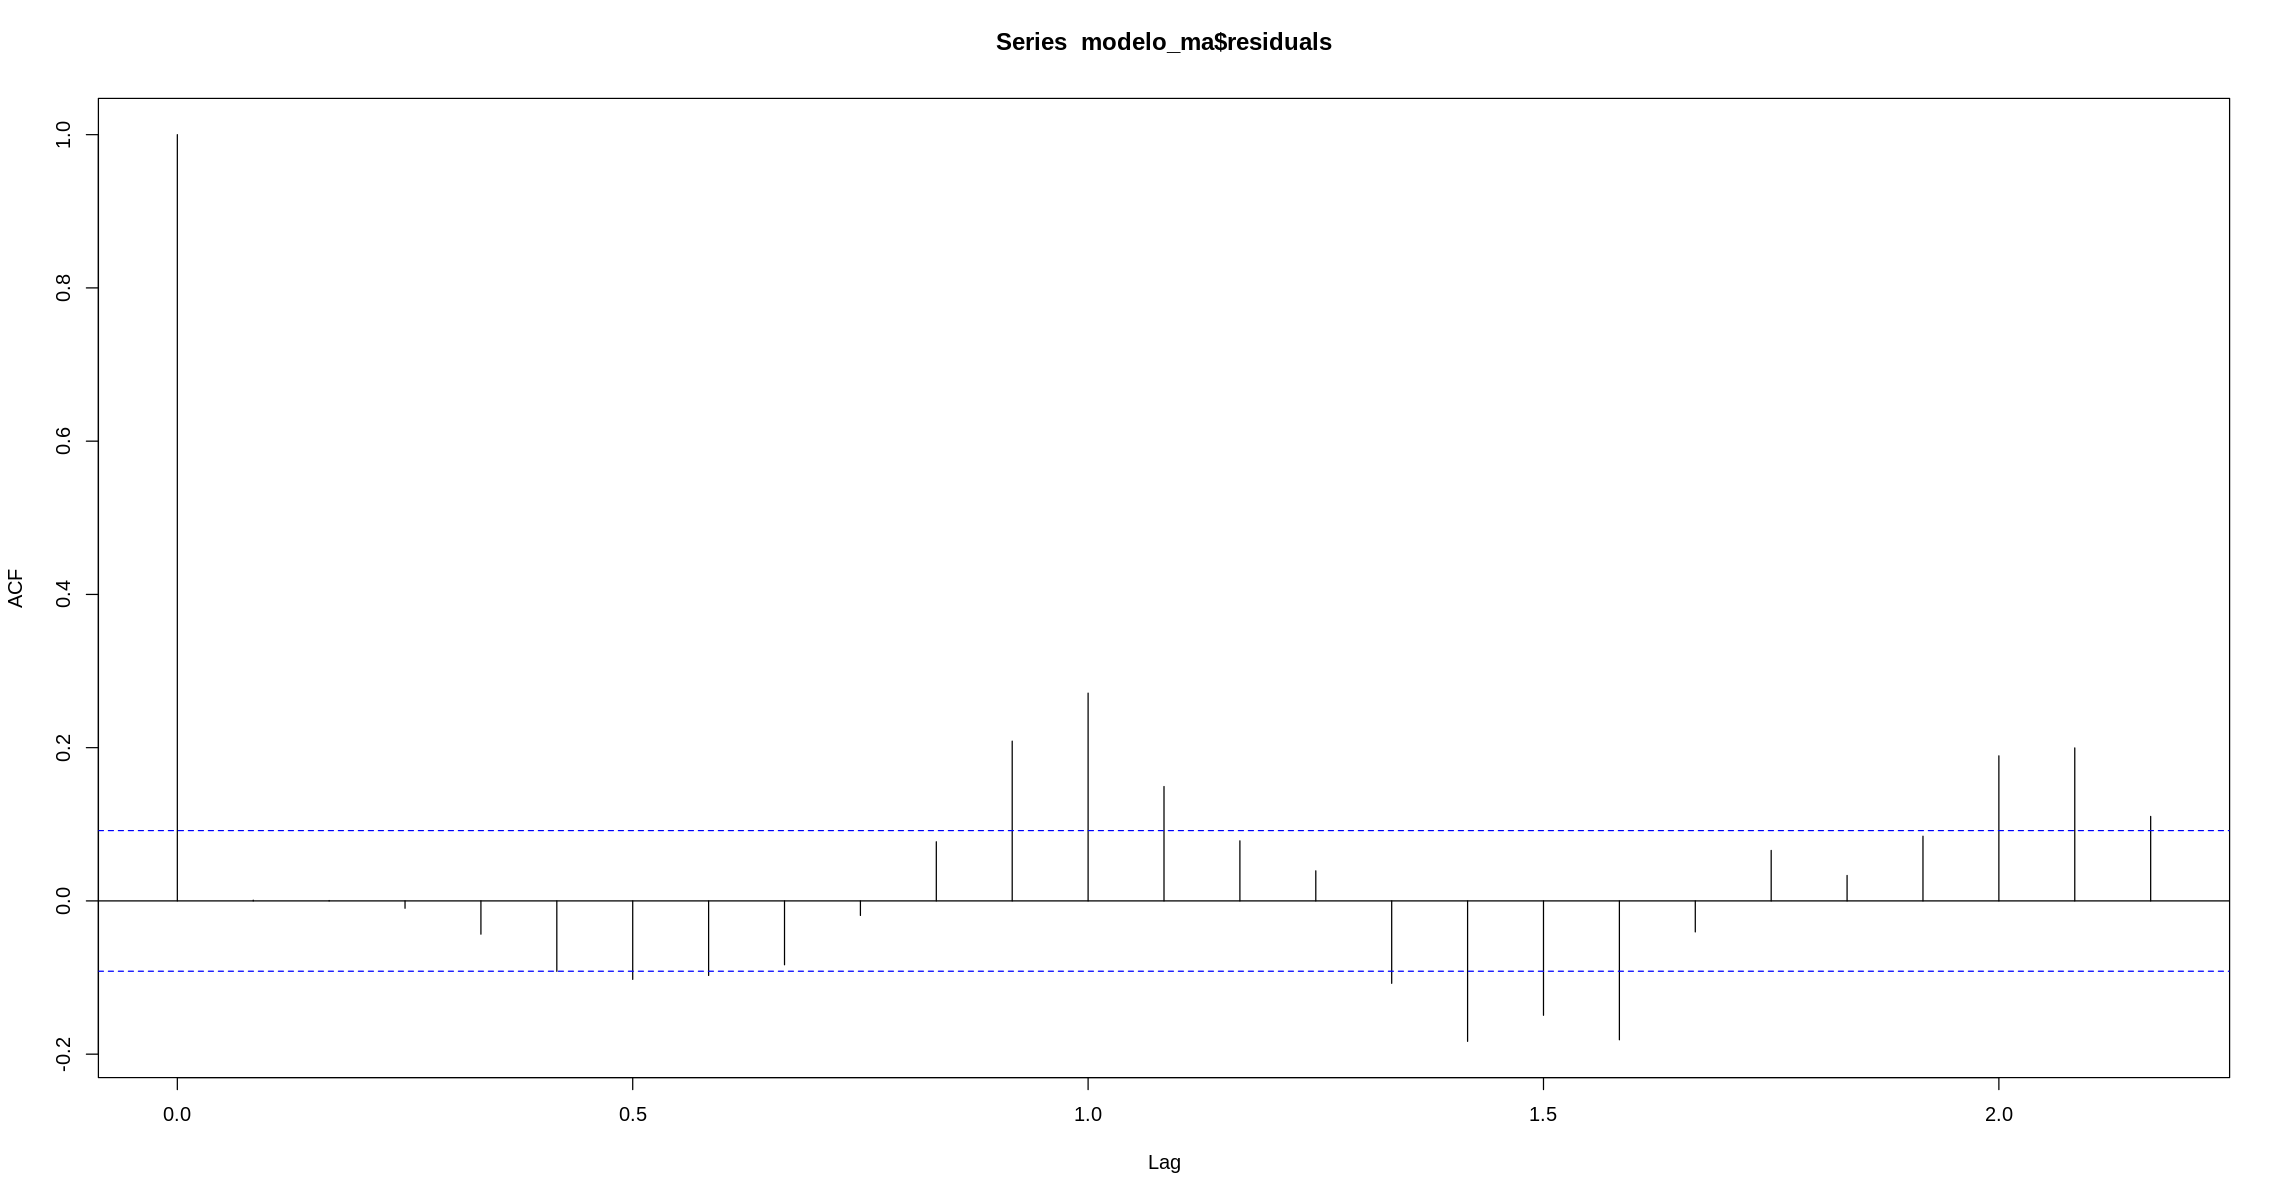

In [ ]:
#gráfico do acf
acf(modelo_ma$residuals)

In [ ]:
#os resíduos estão fora dos limites
#muitas autocorrelações entre eles

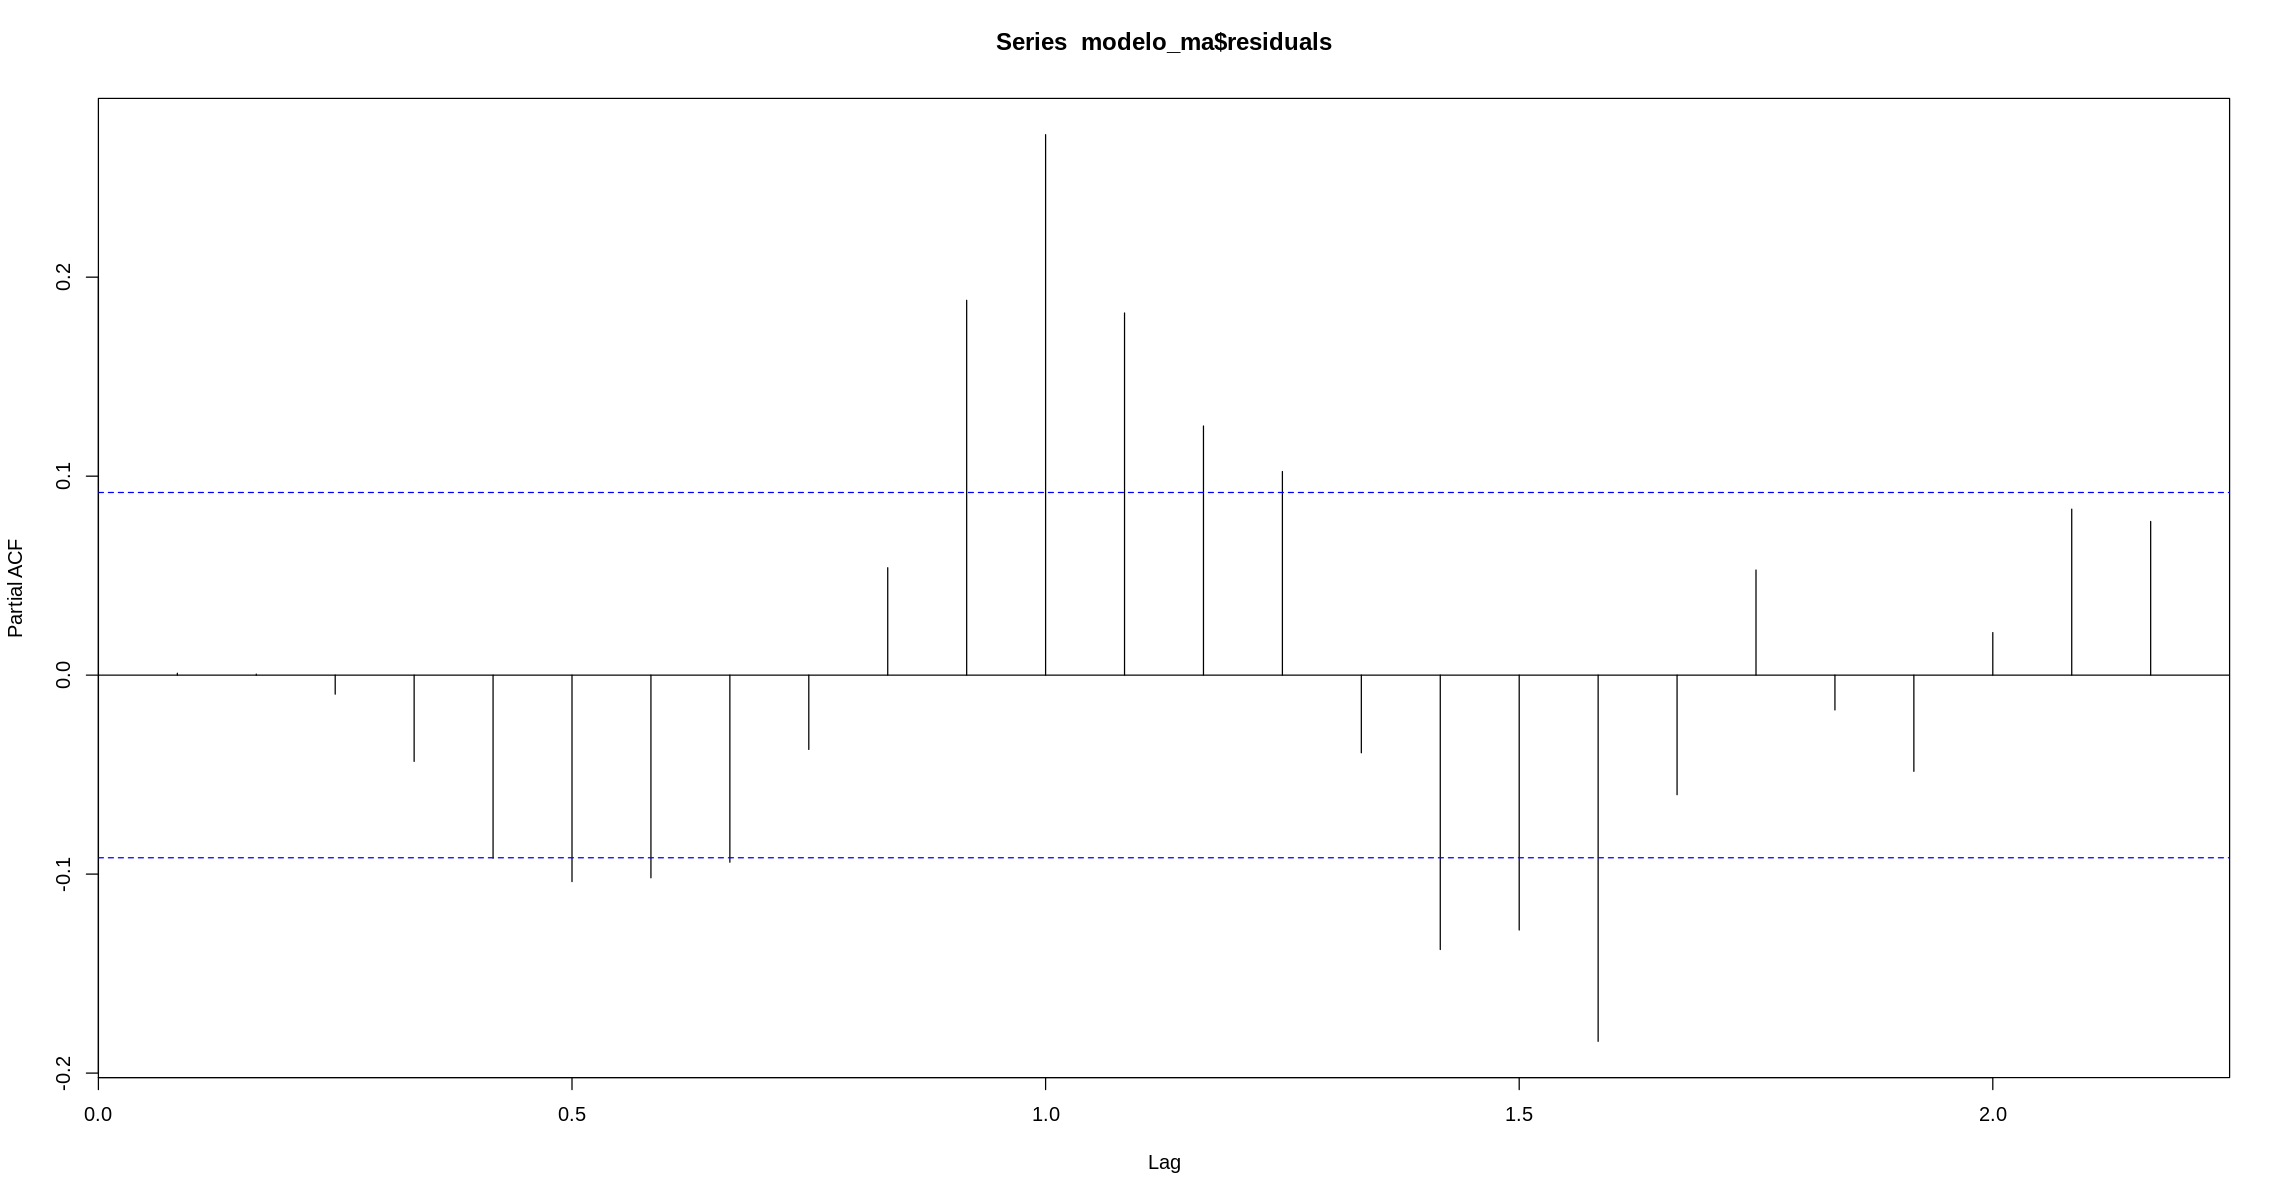

In [ ]:
pacf(modelo_ma$residuals)

In [ ]:
#o mesmo ocorre para o pacf
#demonstrando que os resíduos tem muita autocorrelação

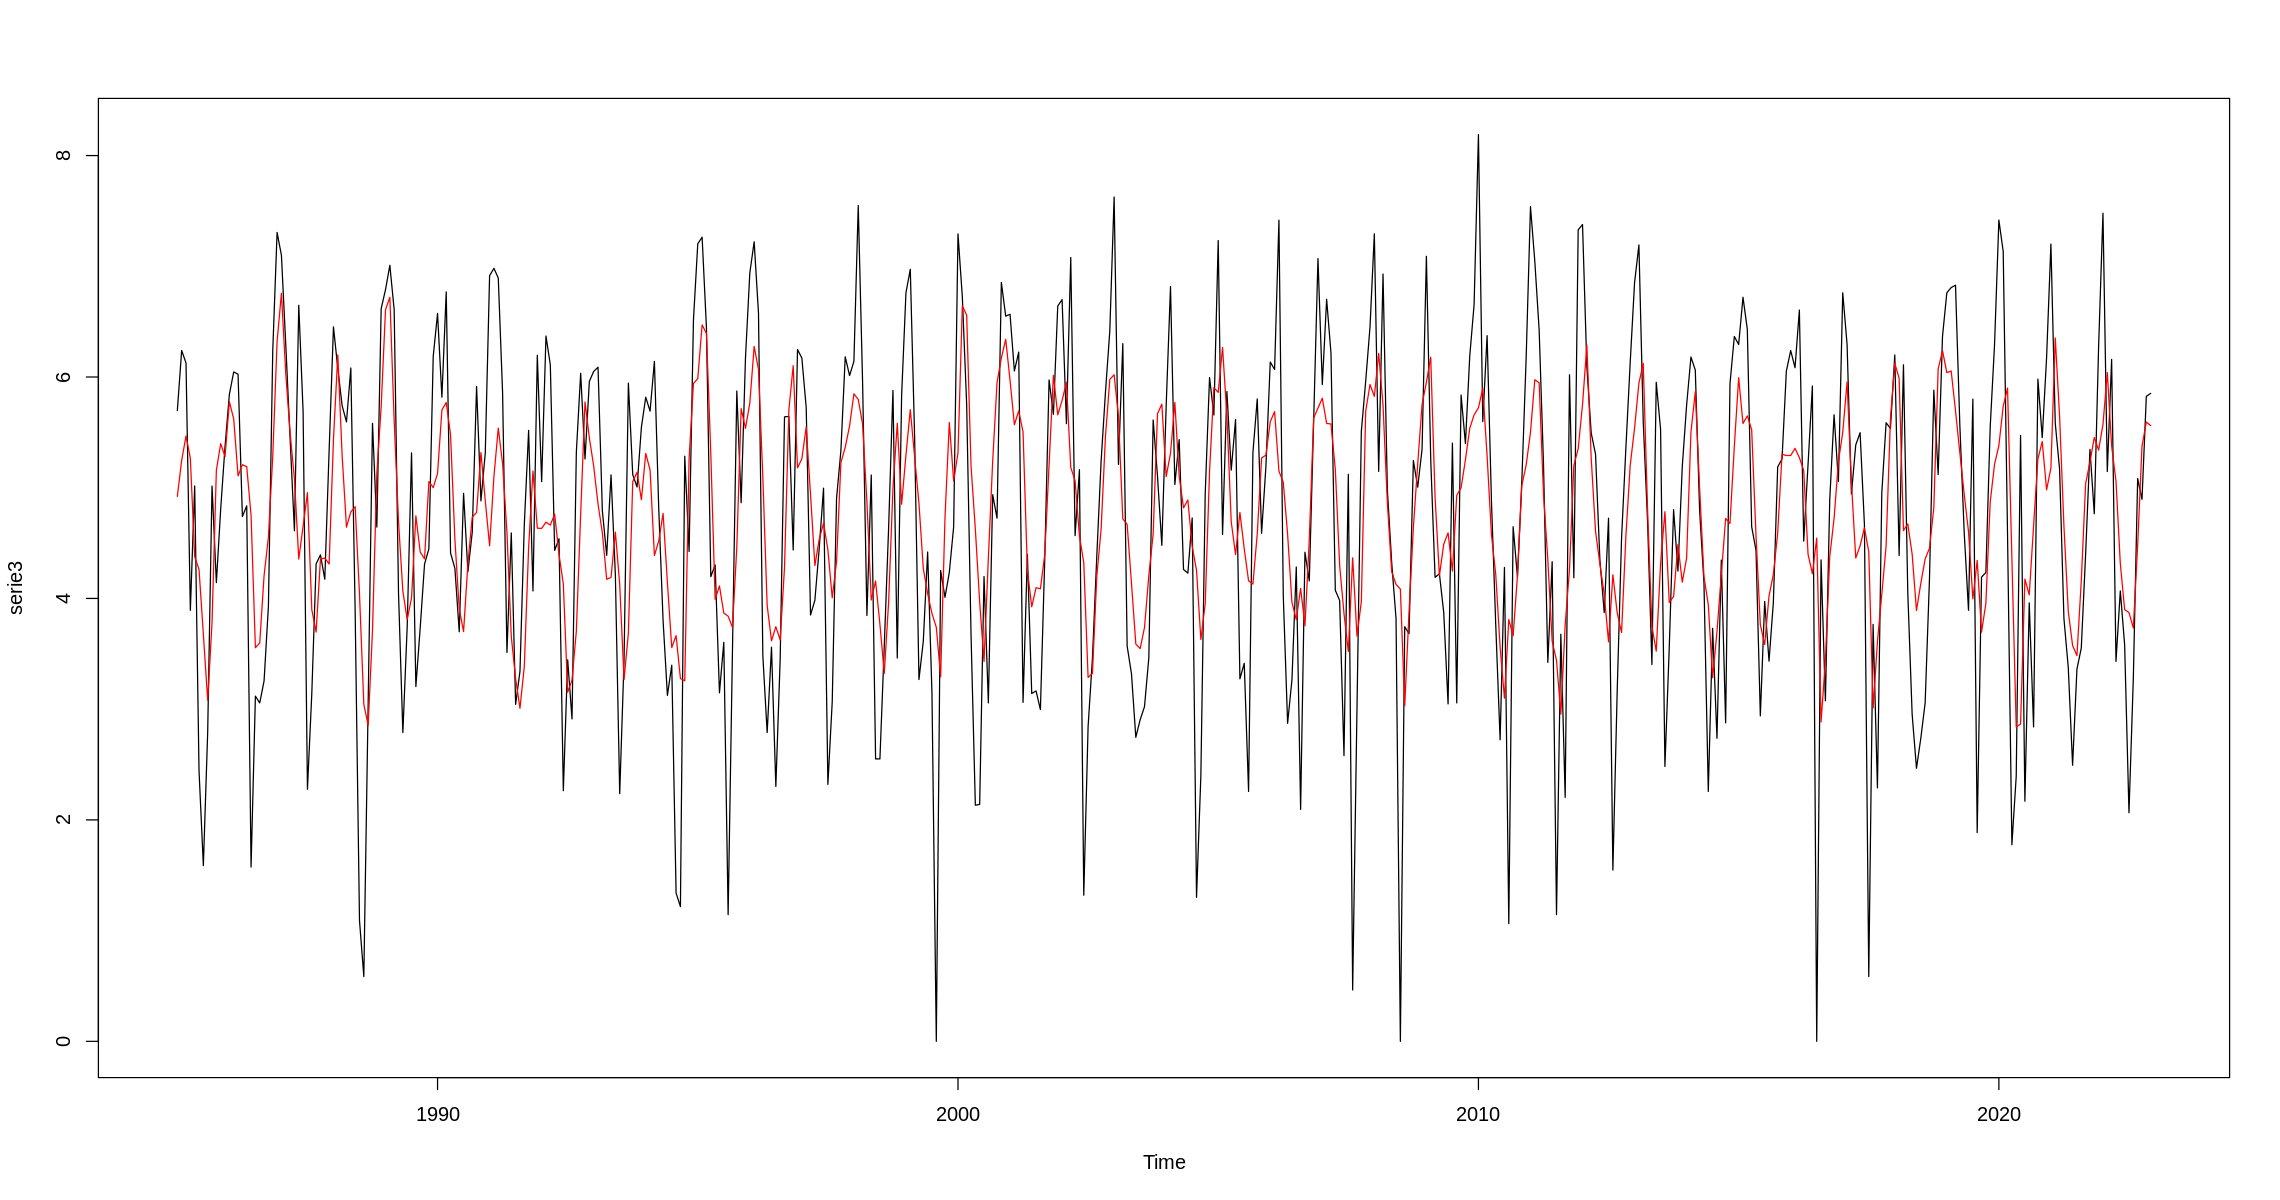

In [ ]:
#plotando a serie 3 com o modelo MA criado
plot(serie3)
lines(serie3-modelo_ma$resid, col= "red")

In [ ]:
#REALIANDO A PREVISÃO DOS DADOS
#previsão com 3 anos
previsao_ma<-
  forecast(modelo_ma, h=36)

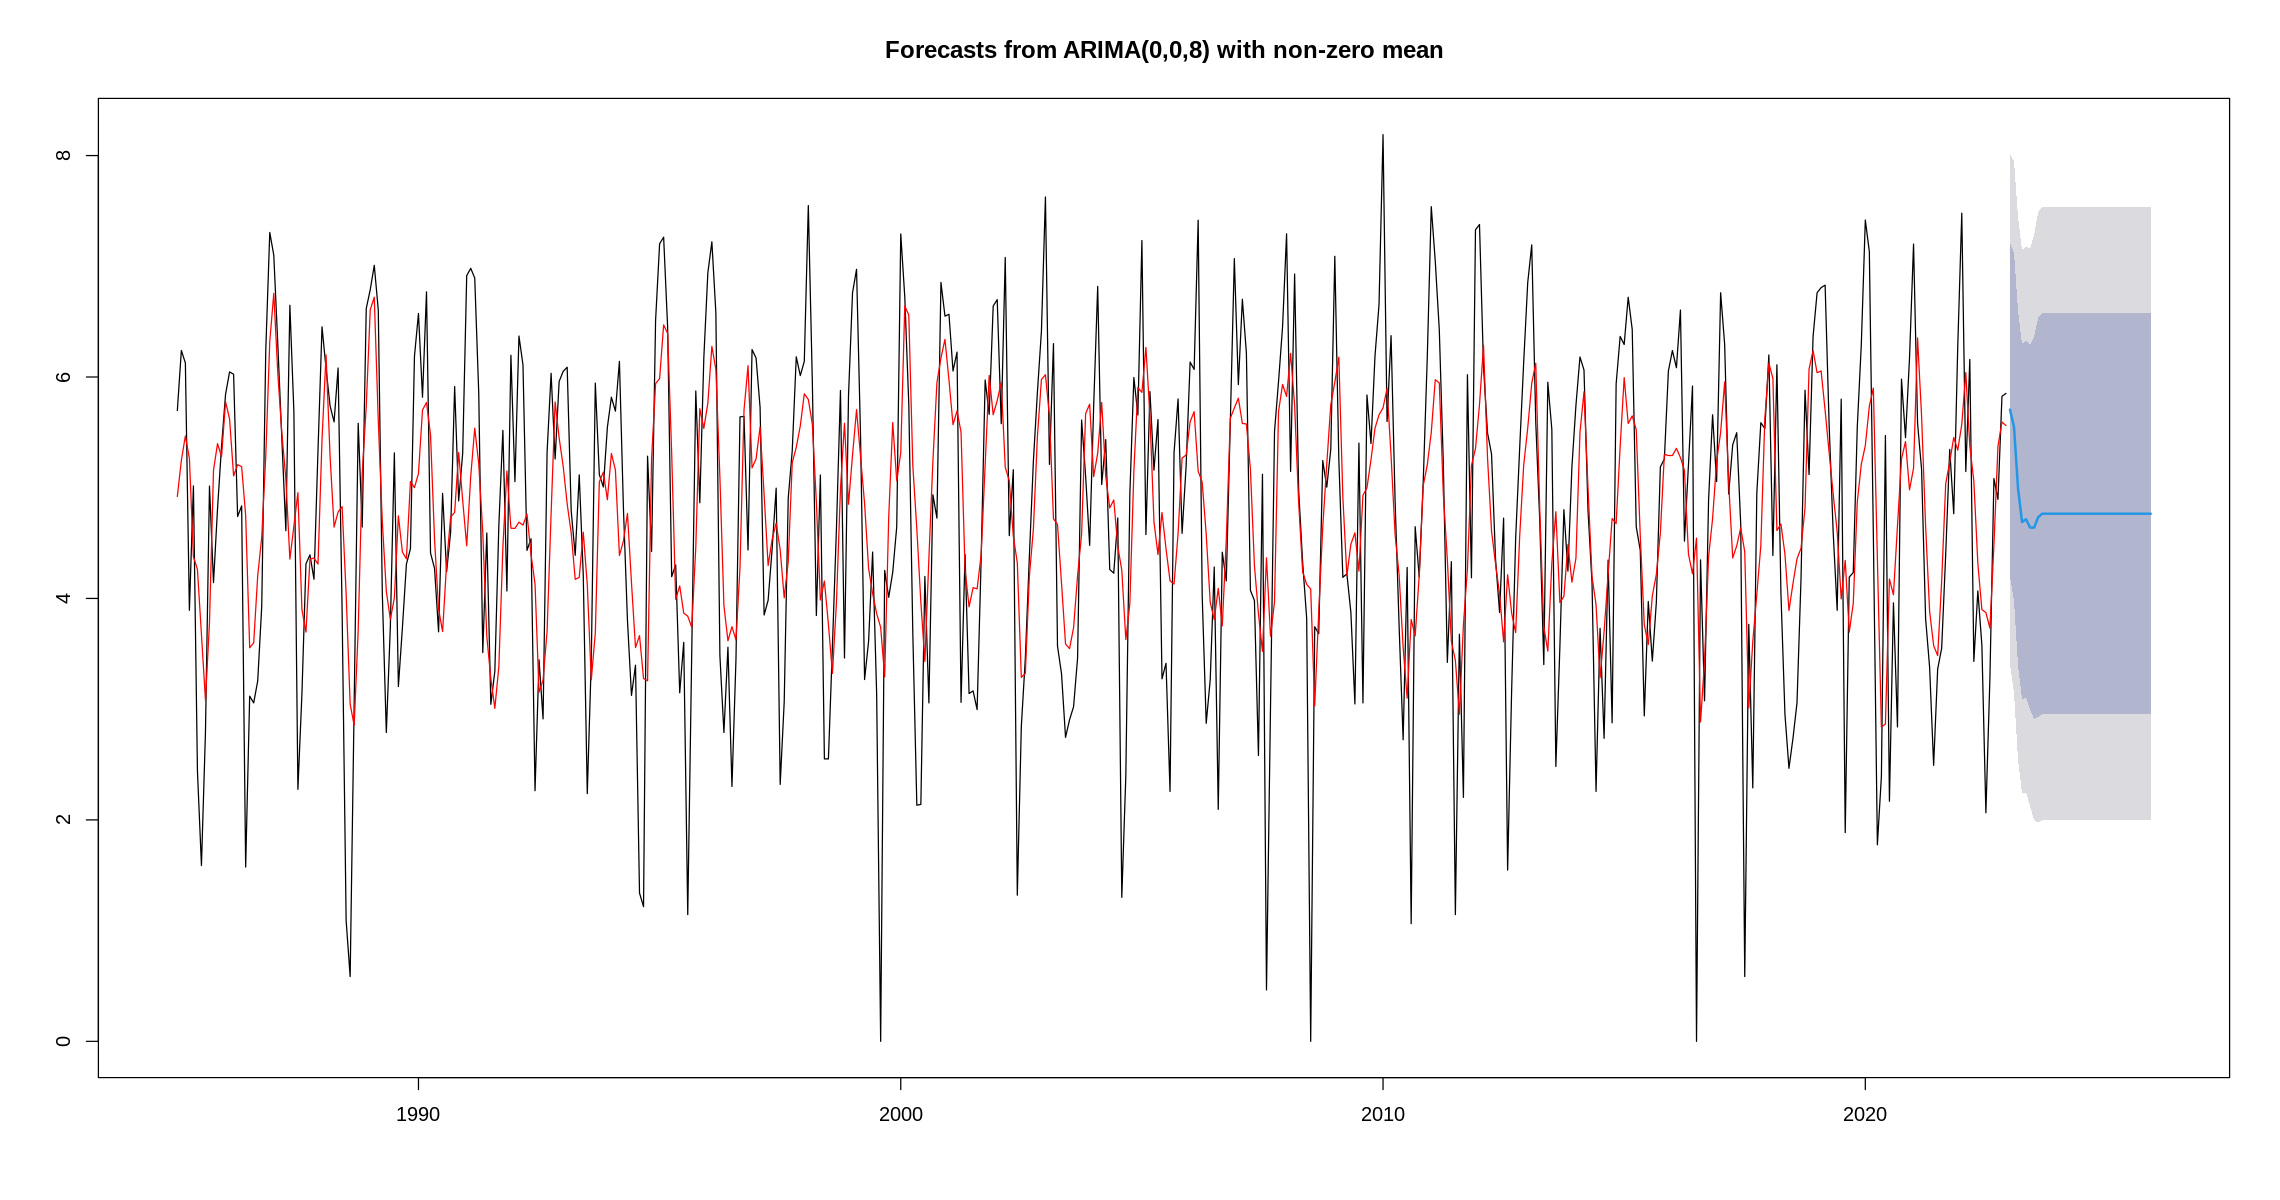

In [ ]:
#plotando a previsão
plot(previsao_ma)
lines(serie3-modelo_ma$resid, col= "red")

In [ ]:
#pelo gráfico a previsão ficou bem ruim, com médias constantes
#parecido com o gráfico de AR incial

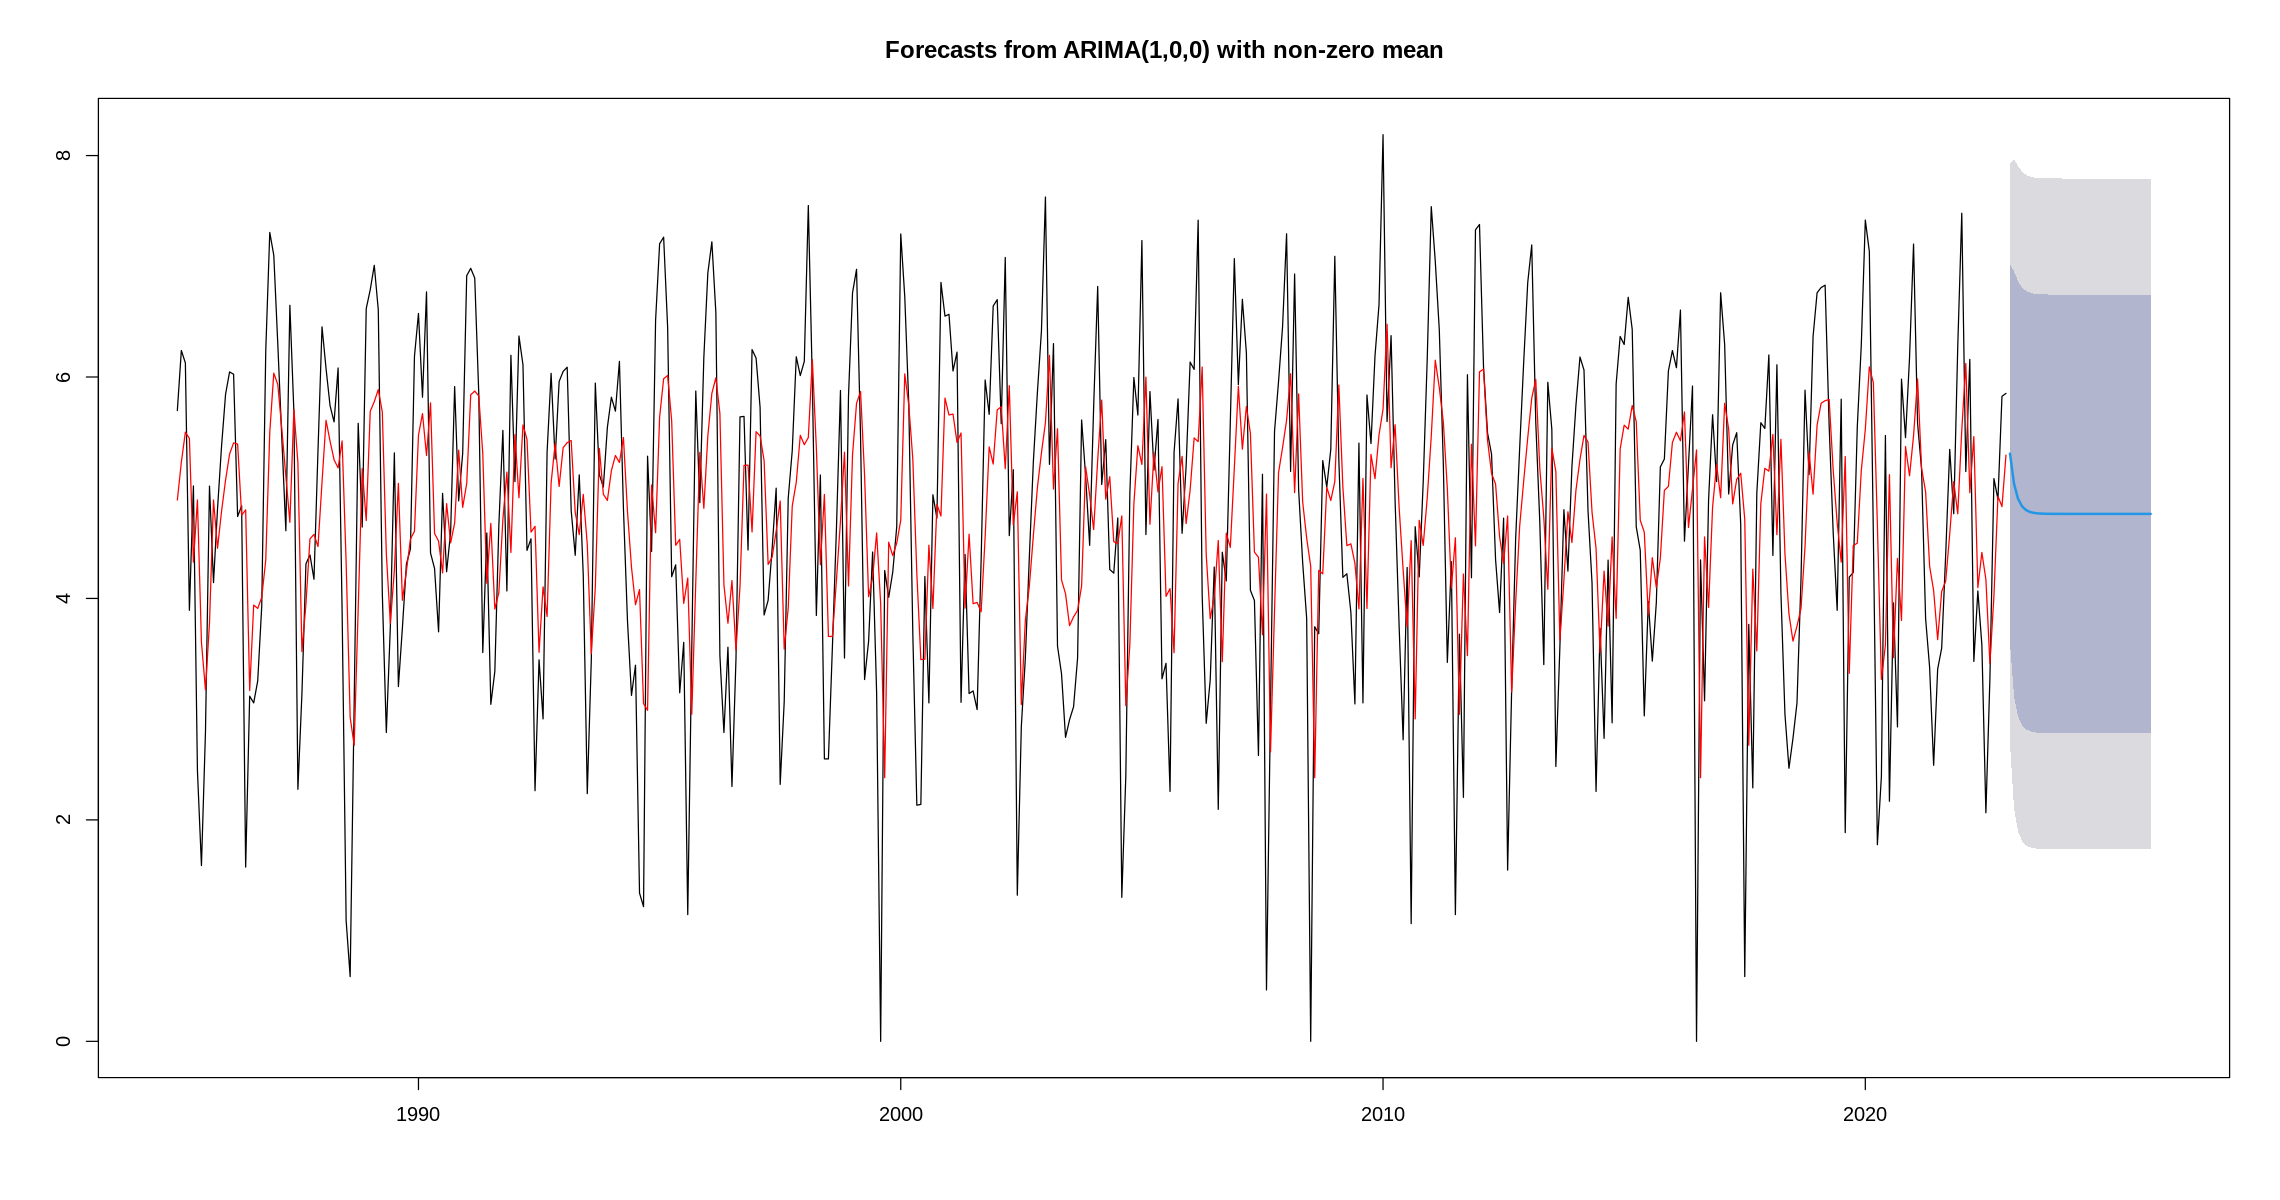

In [ ]:
plot(previsao_ar)
lines(serie3-modelo_ar$resid, col= "red")

In [ ]:
print(previsao_ma)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       5.705139 4.197455 7.212822 3.399336 8.010942
Feb 2023       5.548741 3.978247 7.119236 3.146877 7.950605
Mar 2023       4.994274 3.392274 6.596274 2.544227 7.444322
Apr 2023       4.690276 3.087908 6.292644 2.239665 7.140886
May 2023       4.714792 3.103357 6.326228 2.250314 7.179270
Jun 2023       4.640132 2.992438 6.287827 2.120201 7.160063
Jul 2023       4.639806 2.912156 6.367456 1.997593 7.282019
Aug 2023       4.732512 2.929652 6.535372 1.975276 7.489748
Sep 2023       4.765385 2.954476 6.576294 1.995838 7.534931
Oct 2023       4.765385 2.954476 6.576294 1.995838 7.534931
Nov 2023       4.765385 2.954476 6.576294 1.995838 7.534931
Dec 2023       4.765385 2.954476 6.576294 1.995838 7.534931
Jan 2024       4.765385 2.954476 6.576294 1.995838 7.534931
Feb 2024       4.765385 2.954476 6.576294 1.995838 7.534931
Mar 2024       4.765385 2.954476 6.576294 1.995838 7.534931
Apr 2024       4.765385 2.954476 6.57629

In [ ]:
#destransformar os dados, pois a serie 3 foi realizada a transformação
prev_escala_ma <-
  as.data.frame(previsao_ma)^3
View(prev_escala_ma)

Point Forecast Lo 80    Hi 80    Lo 95     Hi 95   
Jan 2023 185.69432      73.95341 375.2457 39.280965 514.1037
Feb 2023 170.83758      62.96152 360.8279 31.163015 502.5746
Mar 2023 124.57105      39.03667 287.0094 16.469003 412.5489
Apr 2023 103.17991      29.44374 249.1721 11.234389 364.1299
May 2023 104.80637      29.88787 253.1830 11.395396 370.0334
Jun 2023  99.90589      26.79634 248.6003  9.530840 367.0714
Jul 2023  99.88481      24.69698 258.1653  7.971153 386.1494
Aug 2023 105.99252      25.14481 279.1328  7.706967 420.1473
Sep 2023 108.21660      25.78940 284.4092  7.950163 427.7971
Oct 2023 108.21660      25.78940 284.4092  7.950163 427.7971
Nov 2023 108.21660      25.78940 284.4092  7.950163 427.7971
Dec 2023 108.21660      25.78940 284.4092  7.950163 427.7971
Jan 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Feb 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Mar 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Apr 2024 108.21660      25.78940 284.4092  7.950163 427.7971
May 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Jun 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Jul 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Aug 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Sep 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Oct 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Nov 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Dec 2024 108.21660      25.78940 284.4092  7.950163 427.7971
Jan 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Feb 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Mar 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Apr 2025 108.21660      25.78940 284.4092  7.950163 427.7971
May 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Jun 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Jul 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Aug 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Sep 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Oct 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Nov 2025 108.21660      25.78940 284.4092  7.950163 427.7971
Dec 2025 108.21660      25.78940 284.4092  7.950163 427.7971

In [ ]:
#ASSIM COMO NO GRÁFICO OS DADOS FICARAM CONSTANTES
#AINDA FORA DOS DADOS REAIS

In [ ]:
#dados reais de de 2023, temos:
#Ano	Janeiro	Fevereiro	Março	Abril	Maio	Junho	Julho	Agosto	Setembro	Outubro	Novembro	Dezembro
#2023	377,6	    452	    138,2	165,7	43,3	85,2	15	  ---	    ---	      ---	     ---	      ---

#####5.2-CONCLUSÕES DO MODELO MA-MÉDIA MÓVEL

In [ ]:
cat("
O MÓDELO DE MÉDIA MÓVEL ESCOLHIDO COM MENOR AIC FOI O ORDEM 8.\n
APESAR DISSO, CONTINUA RUIM, MUITO FORA DOS DADOS REAIS.
ASSEMELHANDO A QUALIDADE DO MODELO AUTOREGRESSIVO
")


O MÓDELO DE MÉDIA MÓVEL ESCOLHIDO COM MENOR AIC FOI O ORDEM 8.

APESAR DISSO, CONTINUA RUIM, MUITO FORA DOS DADOS REAIS.
ASSEMELHANDO A QUALIDADE DO MODELO AUTOREGRESSIVO


####6-MODELO ARMA-AUTOREGRESSIVO COM MÉDIA MÓVEL

6.1-TESTE DA ORDEM P E DA ORDEM Q

In [ ]:
#### MODELO ARMA
# modelo arima:(p,d,q)
# modelo ma: (p,0,q)
#neste modelo trabalha-se com a ordem de autoregressão - p
#e a ordem da média móvel q

In [ ]:
#criando o modelo
#TESTANDO COM ORDEM 10 PARAR AR E MA COM 8
modelo_arma<-
  arima(serie3, order=c(10,0,8))

Warning message in arima(serie3, order = c(10, 0, 8)):
“possible convergence problem: optim gave code = 1”


In [ ]:
summary(modelo_arma)


Call:
arima(x = serie3, order = c(10, 0, 8))

Coefficients:
          ar1      ar2      ar3     ar4      ar5      ar6      ar7      ar8
      -1.0695  -0.9128  -0.2148  0.2131  -0.1914  -0.8934  -1.0658  -1.0211
s.e.   0.0475   0.0701   0.0664  0.0447   0.0154   0.0146   0.0437   0.0659
          ar9     ar10     ma1     ma2     ma3      ma4     ma5     ma6     ma7
      -0.0277  -0.0016  1.0466  0.9104  0.2012  -0.2165  0.2070  0.9065  1.0509
s.e.   0.0707   0.0488  0.0184  0.0313  0.0268   0.0123  0.0287  0.0381  0.0334
         ma8  intercept
      0.9919     4.7582
s.e.  0.0234     0.0438

sigma^2 estimated as 0.8975:  log likelihood = -632.62,  aic = 1305.24

Training set error measures:
                     ME      RMSE       MAE  MPE MAPE     MASE        ACF1
Training set 0.00236456 0.9473433 0.7363062 -Inf  Inf 0.609875 0.001651527

In [ ]:
# O AIC FICOU MENOR

In [ ]:
#FAZENDO O TESTE COM OUTRAS ORDENS
modelo_arma2<-
  arima(serie3, order=c(3,0,2))

In [ ]:
summary(modelo_arma2)


Call:
arima(x = serie3, order = c(3, 0, 2))

Coefficients:
         ar1      ar2      ar3      ma1     ma2  intercept
      1.6925  -0.9321  -0.0392  -1.7248  0.9946     4.7589
s.e.  0.0474   0.0820   0.0473   0.0139  0.0118     0.0446

sigma^2 estimated as 0.9697:  log likelihood = -644.91,  aic = 1303.81

Training set error measures:
                      ME      RMSE       MAE  MPE MAPE      MASE          ACF1
Training set 0.001317863 0.9847237 0.7600113 -Inf  Inf 0.6295097 -0.0003834157

In [ ]:
# o modelo 2 ficou com o AIC menor, mas pouco

In [ ]:
# será usando o modelo arma 1, pois, as ordem de p e q são as mesmas usadas nos modelos de AR e A anteriores

#####6.2-CRIAÇÃO DO MODELO ARMA


	Ljung-Box test

data:  Residuals from ARIMA(10,0,8) with non-zero mean
Q* = 20.171, df = 6, p-value = 0.002582

Model df: 18.   Total lags used: 24



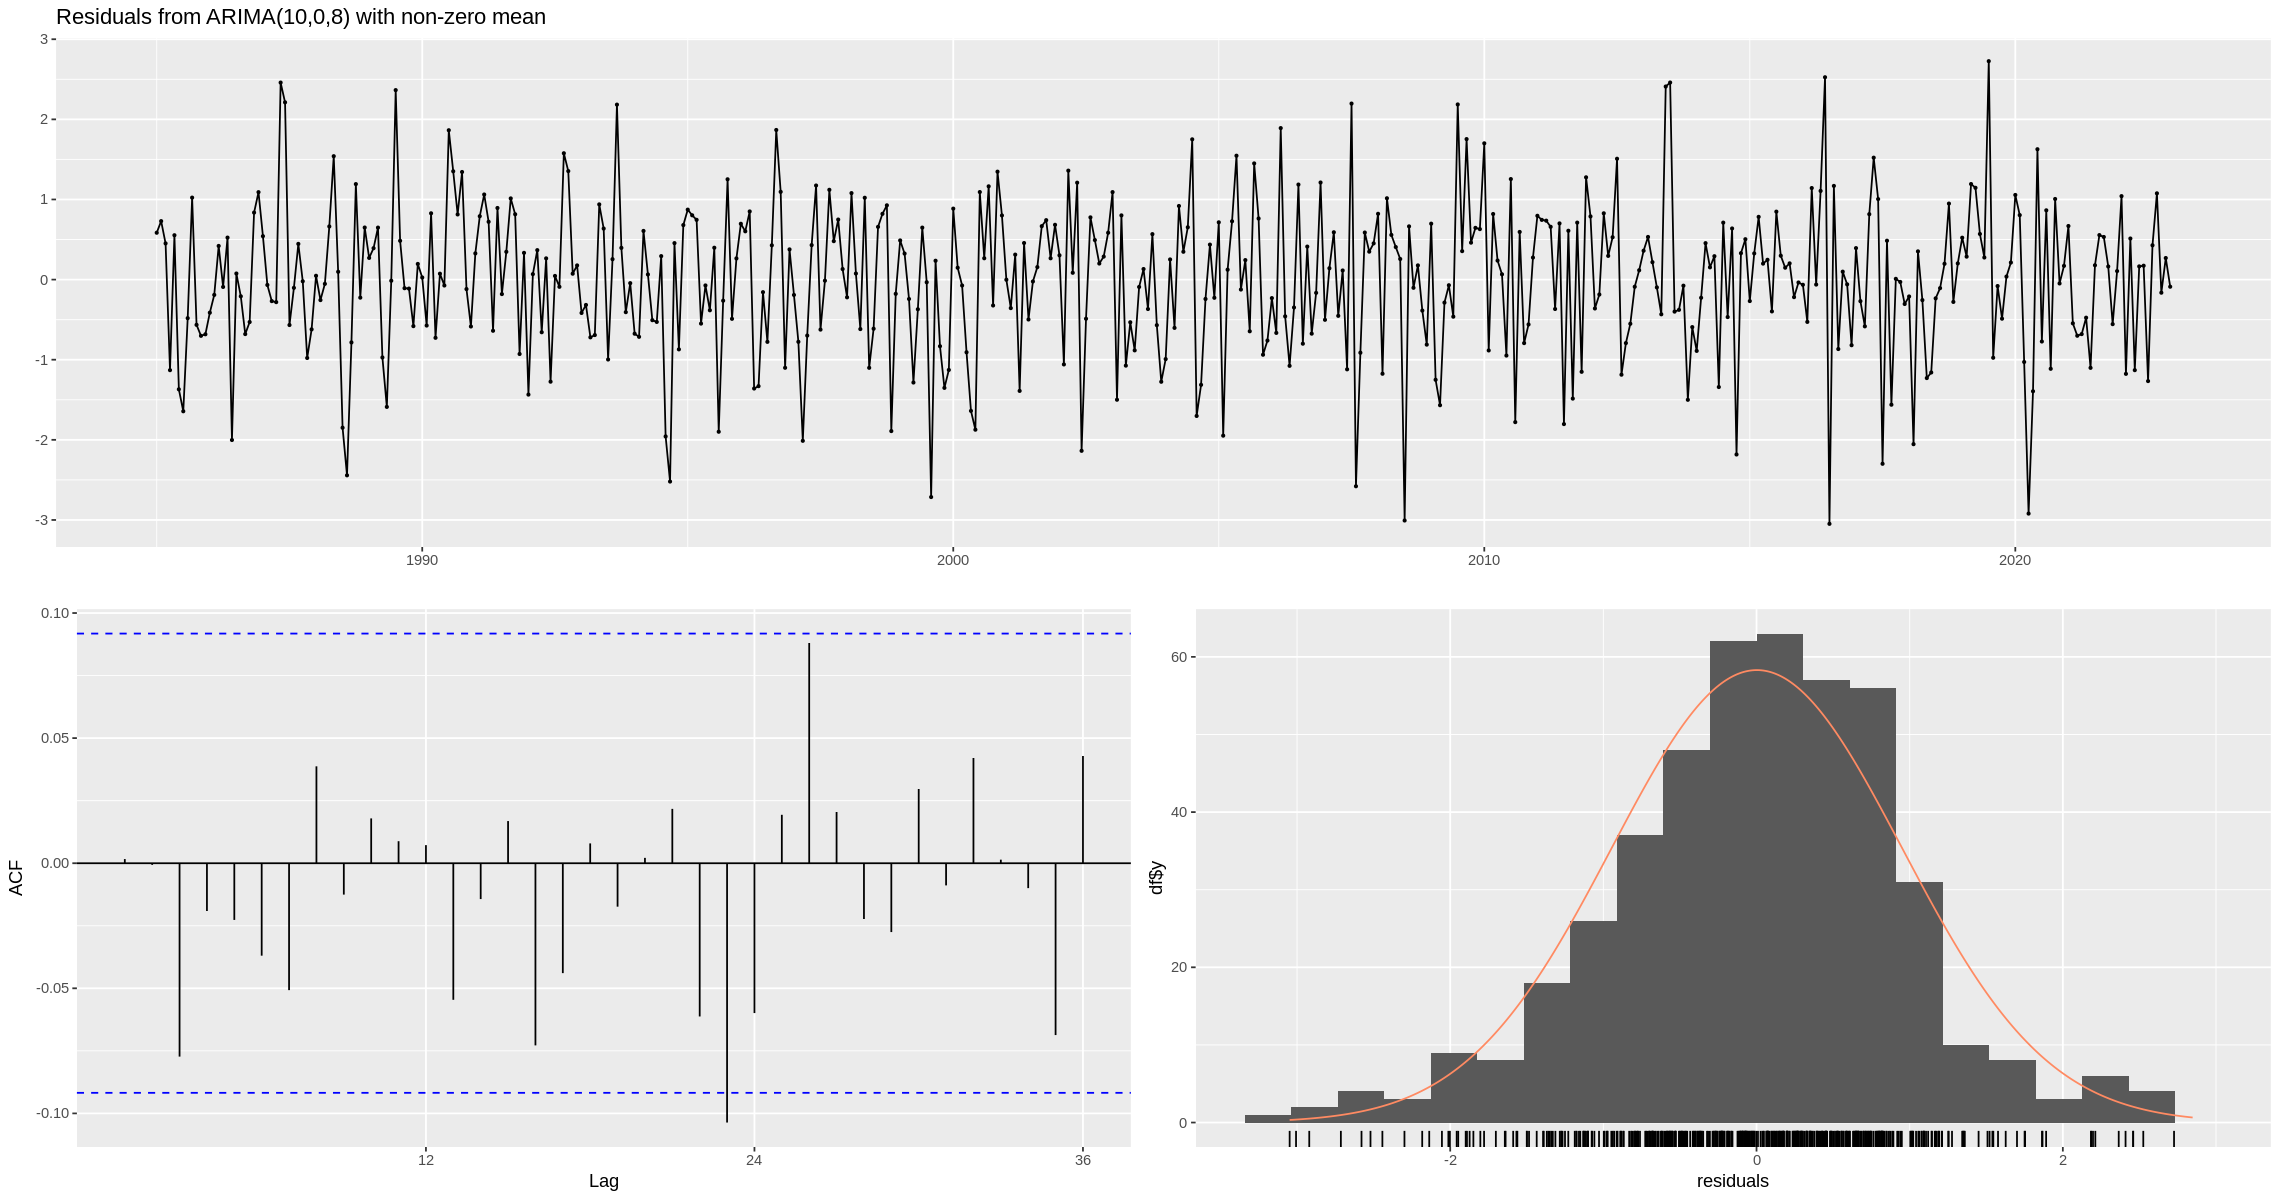

In [ ]:
# Análise dos resíduos (qualidade do modelo)
checkresiduals(modelo_arma)

In [ ]:
# RESÍDUOS ESTÃO DENTRO DOS LIMITES, APENAS UM VALOR FORA

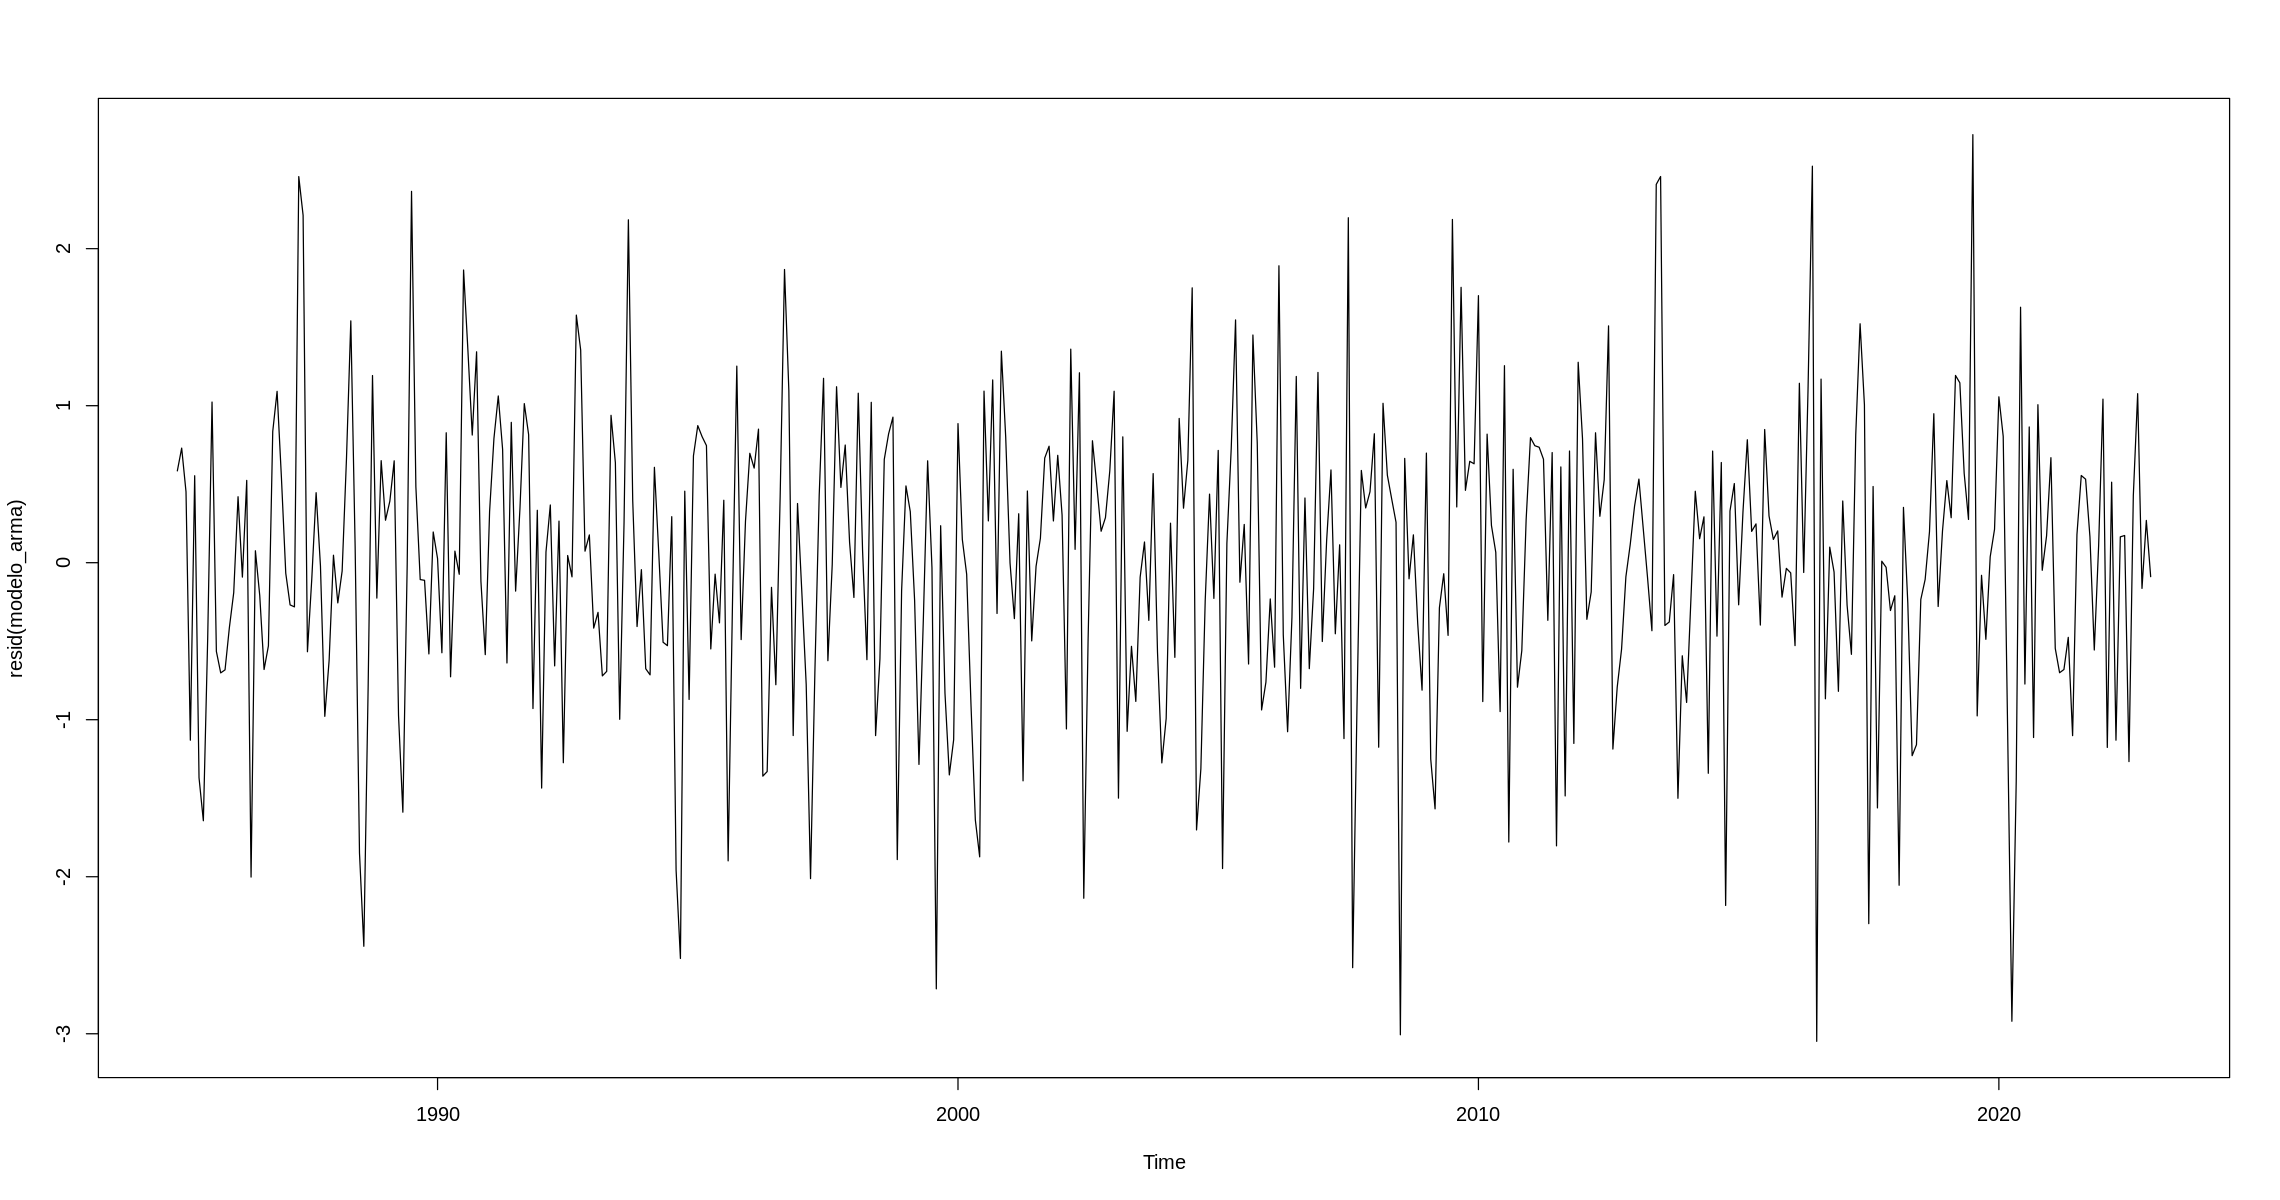

In [ ]:
plot(resid(modelo_arma))

In [ ]:
#A MÉDIA APARENTA SER CONSTANTE

In [ ]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_arma))


	Shapiro-Wilk normality test

data:  resid(modelo_arma)
W = 0.9895, p-value = 0.002384


In [ ]:
# OS VALORES NÃO SÃO NORMAIS, CONTUDO ESTÃO BEM PRÓXIMOS DO P-VALUE

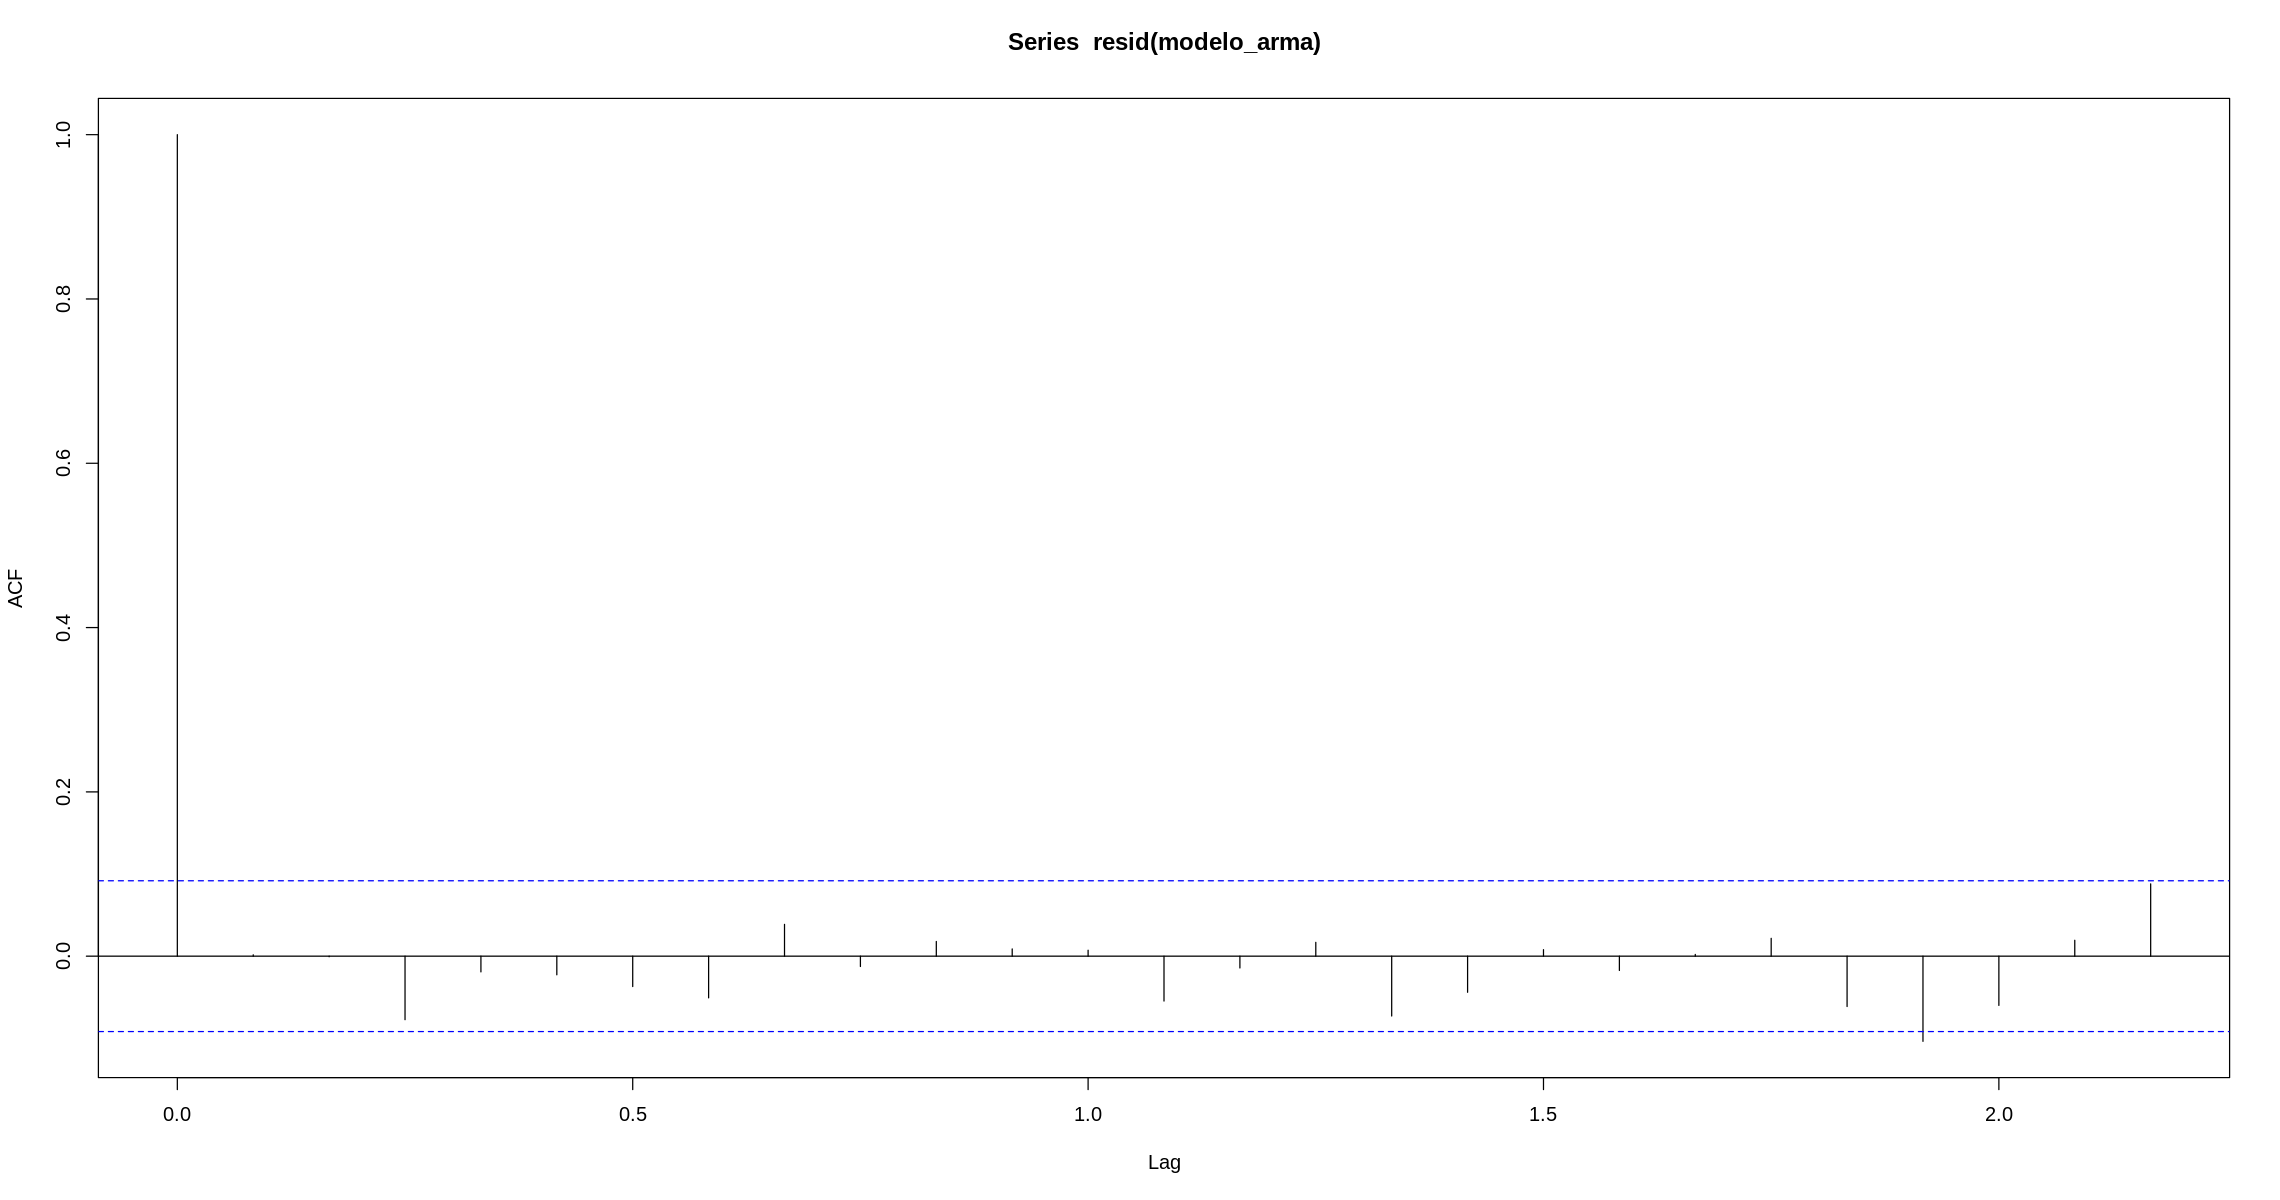

In [ ]:
#avaliando os resíduos
acf(resid(modelo_arma))

In [ ]:
#todos os valores estão dentro dos limites
#não existe autocorrelação entre os resíduos


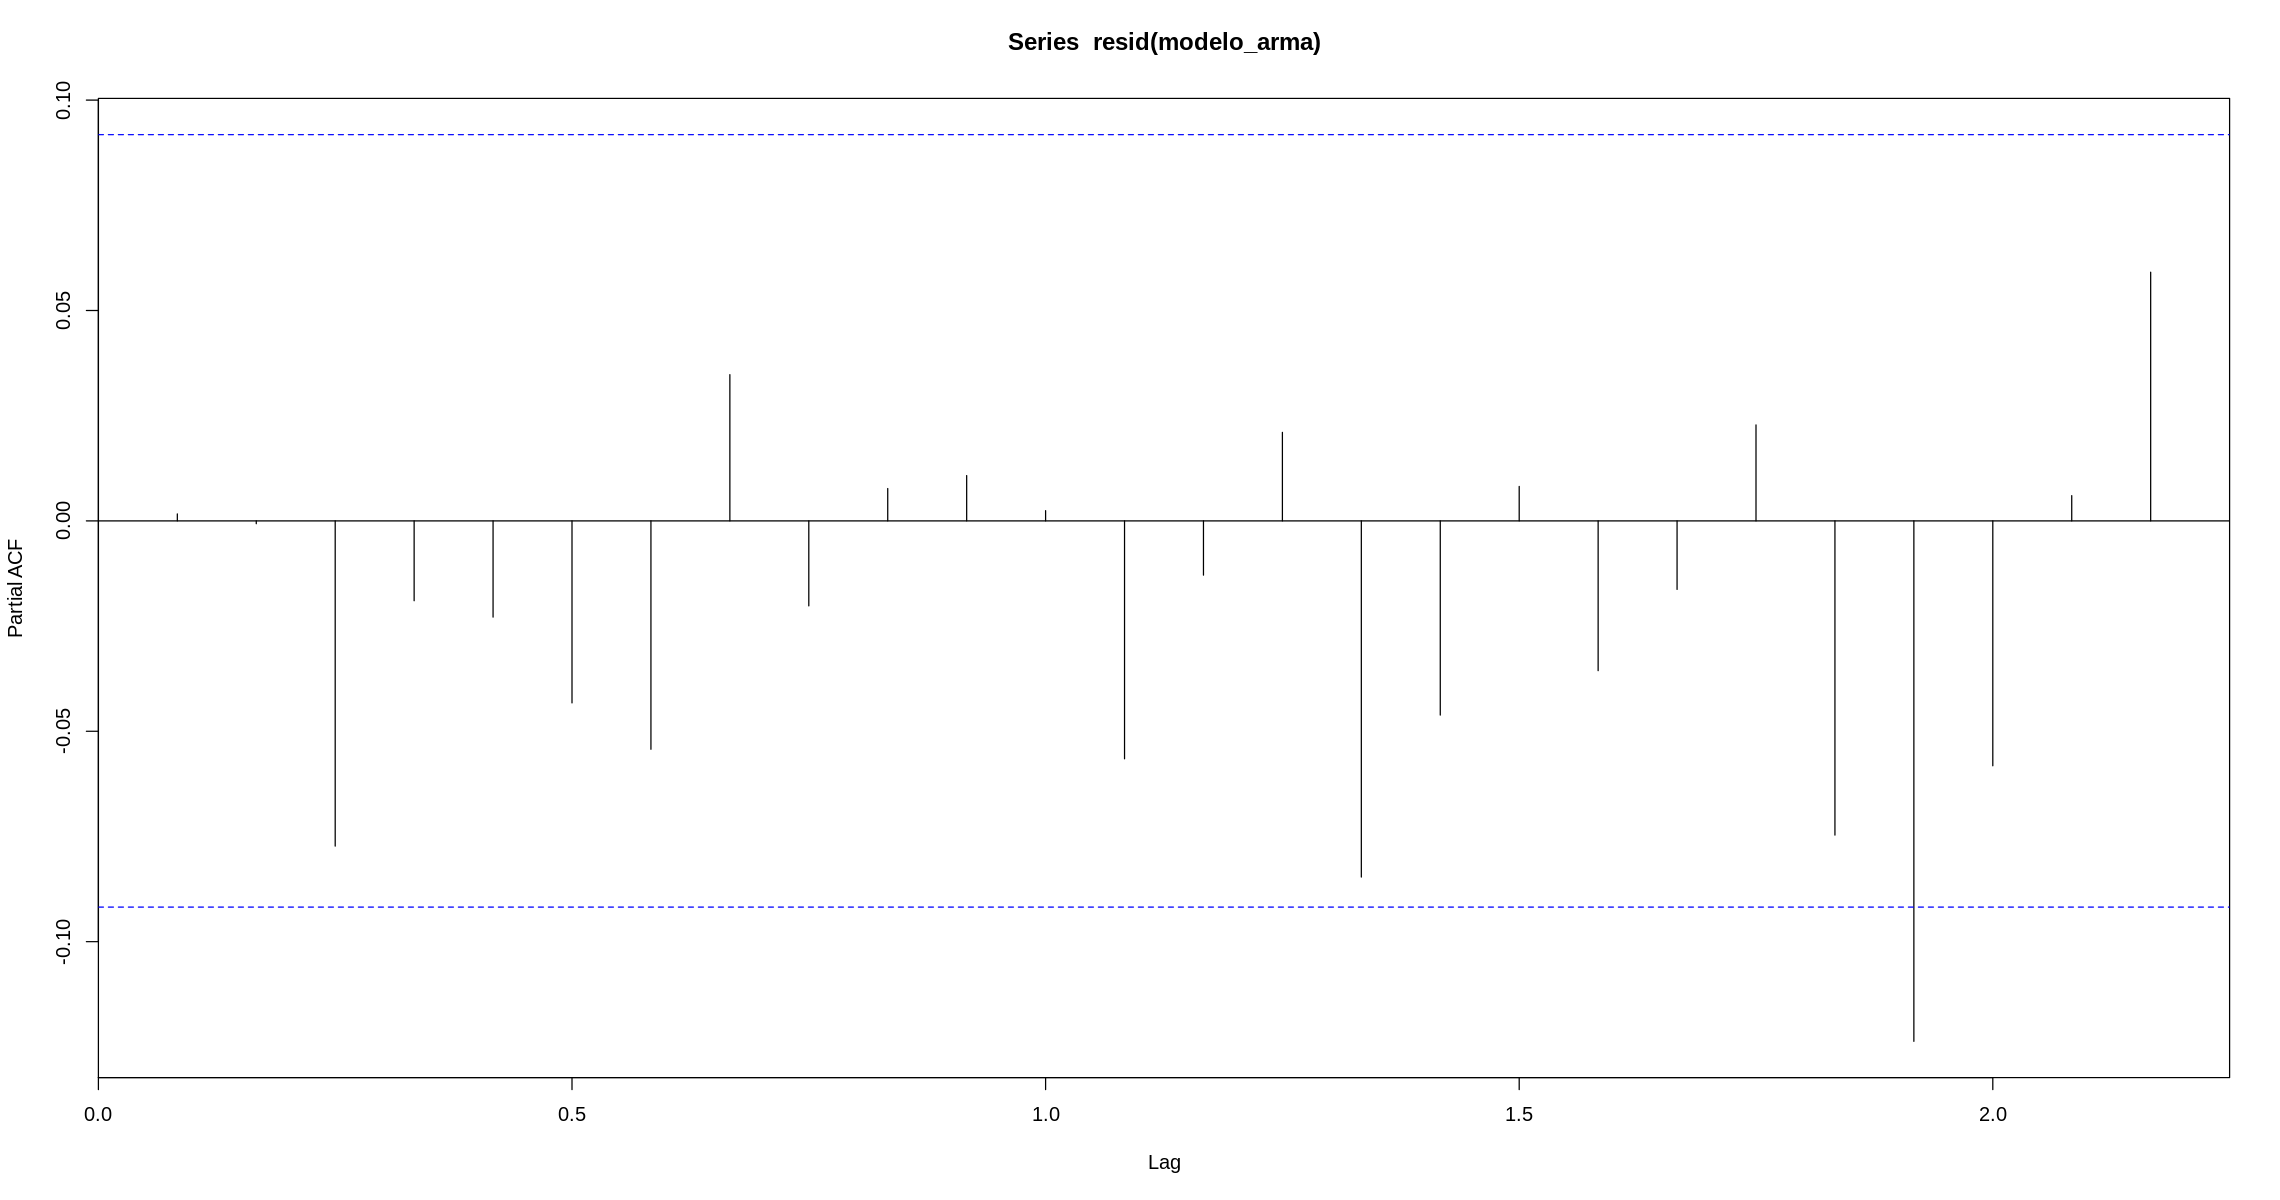

In [ ]:
pacf(resid(modelo_arma))

In [ ]:
#quase todos os lags dentro do intervalo de confiança

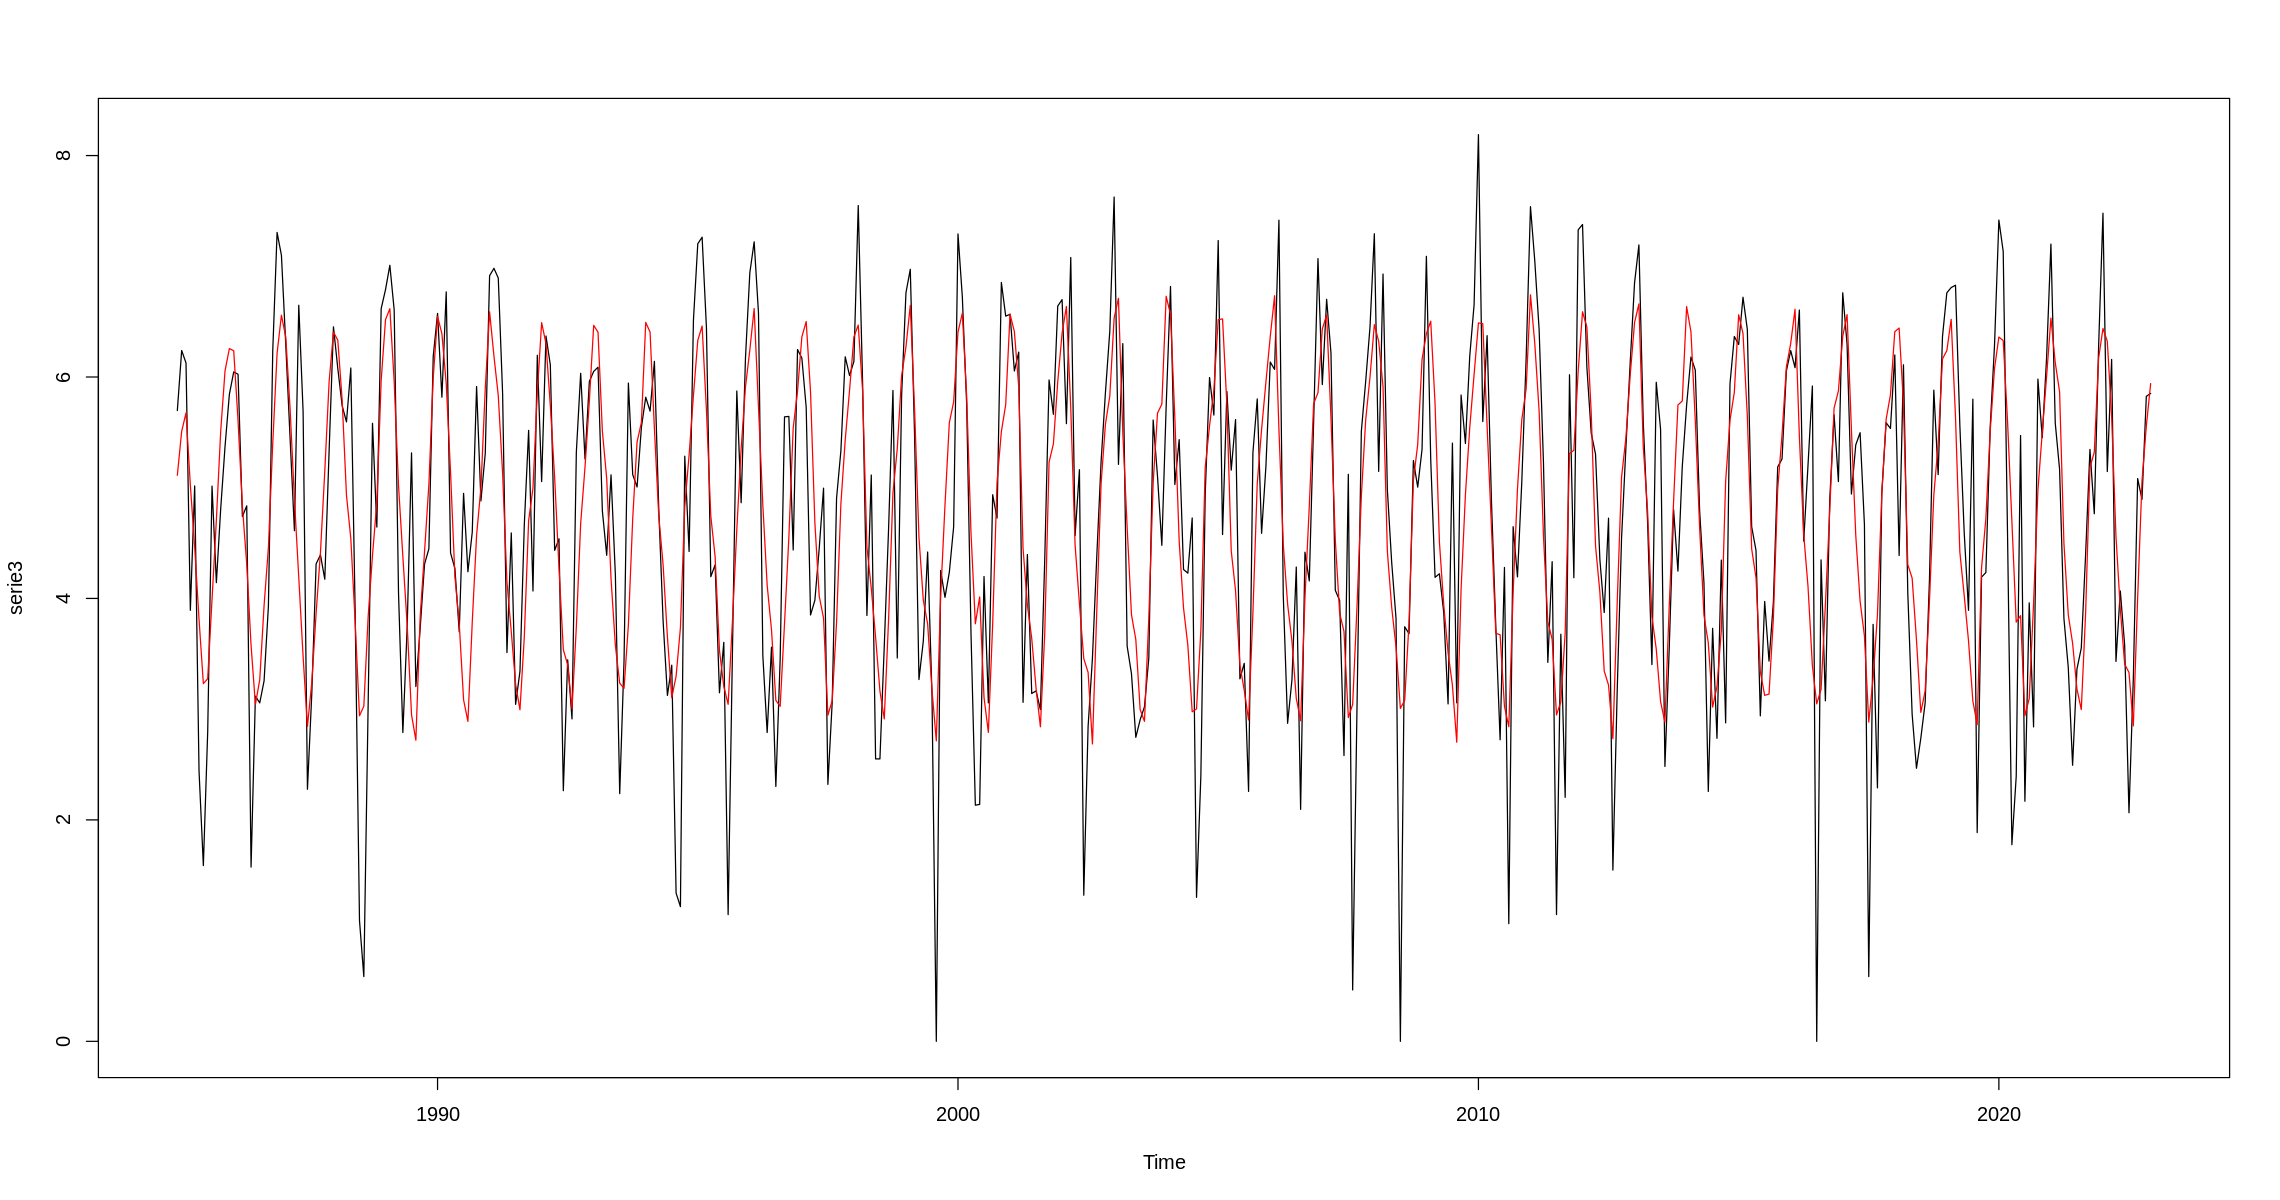

In [ ]:
#plotando a serie 3 com o modelo AR criado
plot(serie3)
lines(serie3-modelo_arma$resid, col= "red")

In [ ]:
#REALIANDO A PREVISÃO DOS DADOS
#previsão com 3 anos
previsao_arma<-
  forecast(modelo_arma, h=36)

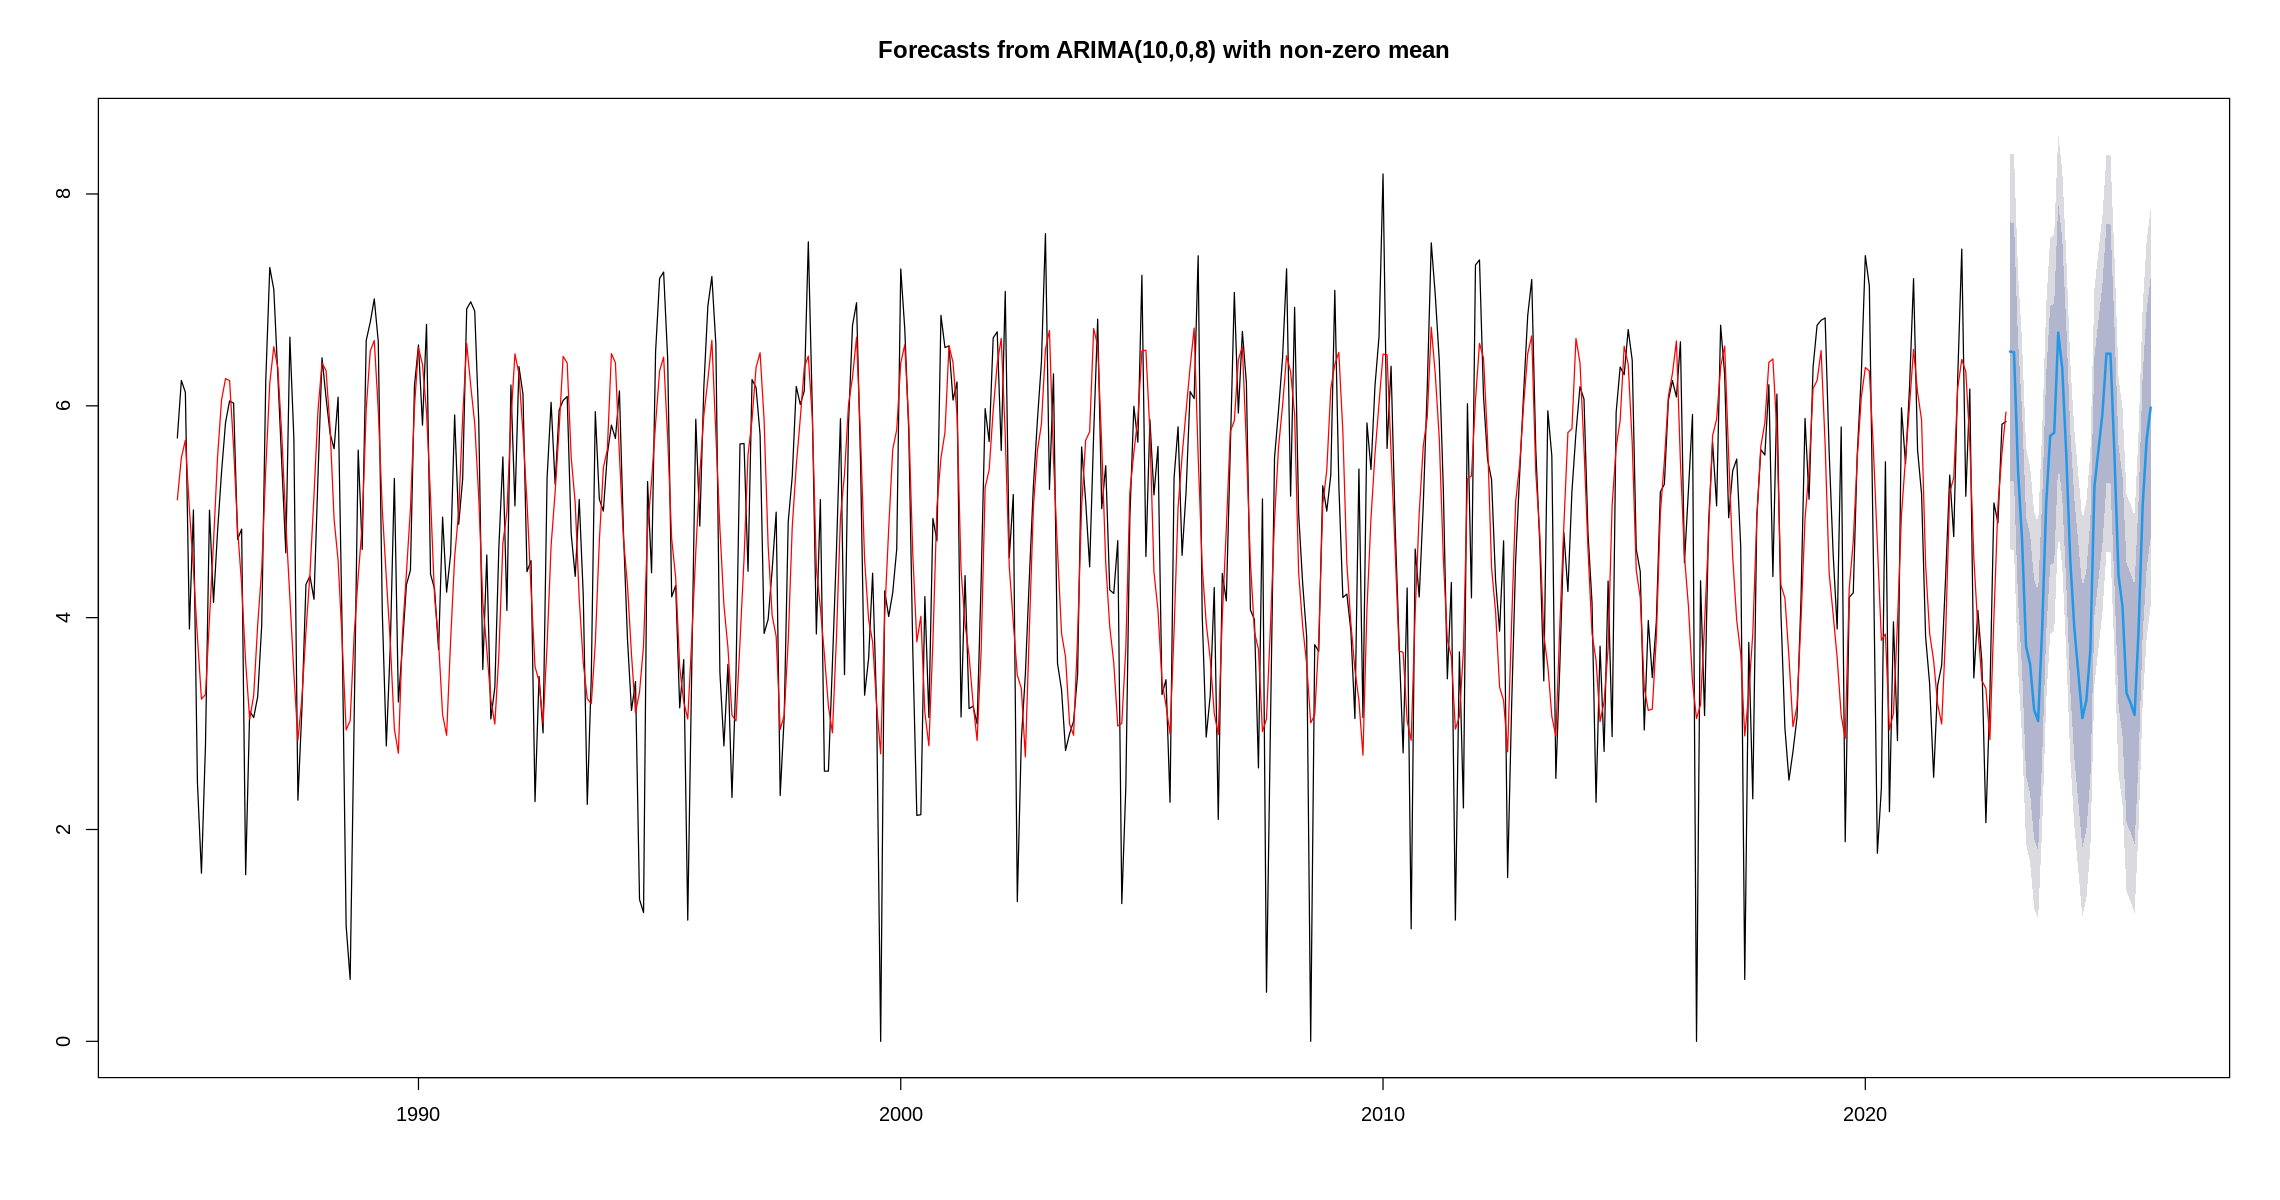

In [ ]:
#plotando a previsão
plot(previsao_arma)
lines(serie3-modelo_arma$resid, col= "red")

In [ ]:
# PELO GRÁFICO OS DADOS ESTÃO DA PREVISÃO ESTÃO OSCILANDO COM VARIAÇÃO MENOR NOS DADOS

In [ ]:
print(previsao_arma)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       6.511727 5.290780 7.732675 4.644449 8.379006
Feb 2023       6.505268 5.284055 7.726481 4.637583 8.372952
Mar 2023       5.387910 4.166487 6.609334 3.519904 7.255917
Apr 2023       4.734685 3.513162 5.956207 2.866527 6.602843
May 2023       3.728368 2.506883 4.949854 1.860268 5.596469
Jun 2023       3.560850 2.339243 4.782458 1.692563 5.429138
Jul 2023       3.130080 1.908510 4.351649 1.261851 4.998309
Aug 2023       3.024040 1.801955 4.246125 1.155022 4.893057
Sep 2023       3.894047 2.671957 5.116137 2.025022 5.763072
Oct 2023       5.072545 3.850242 6.294848 3.203194 6.941897
Nov 2023       5.716406 4.493876 6.938936 3.846708 7.586104
Dec 2023       5.745273 4.522742 6.967804 3.875573 7.614973
Jan 2024       6.690121 5.467564 7.912678 4.820381 8.559861
Feb 2024       6.353487 5.130796 7.576178 4.483542 8.223431
Mar 2024       5.538409 4.315714 6.761104 3.668458 7.408359
Apr 2024       4.537678 3.314983 5.76037

In [ ]:
#destransformar os dados, pois a serie 3 foi realizada a transformação
prev_escala_arma <-
  as.data.frame(previsao_arma)^3
View(prev_escala_arma)

Point Forecast Lo 80      Hi 80     Lo 95      Hi 95   
Jan 2023 276.11412      148.101355 462.36958 100.184979 588.2710
Feb 2023 275.29321      147.537316 461.25933  99.741341 586.9969
Mar 2023 156.40876       72.328585 288.71751  43.610637 382.0119
Apr 2023 106.13855       43.360518 211.30484  23.554179 287.8676
May 2023  51.82705       15.754412 121.27663   6.437635 175.2840
Jun 2023  45.15035       12.800468 109.38392   4.848800 160.0268
Jul 2023  30.66664        6.951582  82.40654   2.009203 124.8732
Aug 2023  27.65429        5.851024  76.55582   1.540889 117.1496
Sep 2023  59.04778       19.076056 133.91415   8.304038 191.4089
Oct 2023 130.52021       57.077381 249.43411  32.866205 334.5295
Nov 2023 186.79672       90.753492 334.10169  56.920366 436.5726
Dec 2023 189.64090       92.513570 338.28891  58.211372 441.5756
Jan 2024 299.43452      163.448718 495.41650 112.006716 627.1914
Feb 2024 256.46990      135.068543 434.86101  90.128853 556.1081
Mar 2024 169.88498       80.381819 309.06711  49.368576 406.5988
Apr 2024  93.43317       36.428735 191.14012  18.985611 263.0825
May 2024  59.50422       19.278970 134.74628   8.416992 192.4946
Jun 2024  42.08348       11.476602 103.88989   4.160840 152.9808
Jul 2024  28.40682        6.113579  78.06989   1.648265 119.1825
Aug 2024  33.38386        7.957539  87.72911   2.453768 131.9543
Sep 2024  50.55773       15.146512 119.17843   6.093925 172.6974
Oct 2024 143.49191       64.566212 269.44345  38.070512 358.9052
Nov 2024 173.90327       82.780305 315.16118  51.086610 413.9839
Dec 2024 207.83932      103.809401 365.08700  66.529690 473.6235
Jan 2025 273.66291      146.246640 459.42065  98.659825 585.1247
Feb 2025 273.64252      146.219154 459.42199  98.632961 585.1451
Mar 2025 168.33821       79.372614 306.93509  48.612897 404.1494
Apr 2025  85.26883       32.080270 178.02273  16.184774 246.8949
May 2025  68.97789       23.815843 151.00674  11.076779 213.1092
Jun 2025  35.48774        8.768298  91.75236   2.827577 137.2531
Jul 2025  32.64490        7.667247  86.35668   2.320266 130.1777
Aug 2025  29.23597        6.396171  79.78411   1.763346 121.5175
Sep 2025  58.78247       18.901406 133.63927   8.188726 191.1833
Oct 2025 128.94965       56.073882 247.28168  32.136034 332.0840
Nov 2025 183.64710       88.691312 329.74079  55.365438 431.5386
Dec 2025 214.25964      107.778232 374.60934  69.452788 485.0626

In [ ]:
#dados reais de de 2023, temos:
#Ano	Janeiro	Fevereiro	Março	Abril	Maio	Junho	Julho	Agosto	Setembro	Outubro	Novembro	Dezembro
#2023	377,6	    452	    138,2	165,7	43,3	85,2	15	  ---	    ---	      ---	     ---	      ---

In [ ]:
# O MODELO FICOU MAIS PRÓXIMO DOS VALORES REAIS DE 2023.
#ESTANDO DENTRO DOS INTERVALOS DE PREDIÇÃO. EXEMPLO:
#O VALOR REAL DE JAN 2023 É 377,6 O VALOR PREVISTO É 276.
#PELA TABELA E NAS COLUNAS LO80 E HI80 O VALOR REAL TEM 80% DE CHANCES DE ESTAREM EM 148 A 462
# E PELAS COLUNAS LO95 E HI 95 95% DE CHANCES DE ESTAREM ENTRE 100 A 588
# ISTO SE CONFIRMA DEVIDO O VALOR REAL SER 377,6

#####6.3-CONCLUSÕES DO MODELO ARMA

In [ ]:
cat("
O MODELO ARMA COM ORDEM DE AR DE 10 E ORDEM DE MA DE 8 FICOU MASI PRÓXIMOS DOS VALORES REAIS SEM COMPARADO COM O MODELO AR COM LAG10.
OS GRÁFICOS DE ACF E PACF APRESENTAREM RESIDUOS ABAIXO DOS LIMITES. DEMONSTRANDO QUE ESTES NÃO POSSUEM AUTOCORRELAÇÃO.
A PREVISÃO FICOU MELHOR. AINDA OS DADOS REAIS ESTÃO DIFERENTES, MAS, PRÓXIMOS AO LIMITES DE 80 E 95%.
CONCLUI-SE QUE O ARMA, COMBINAÇÃO DE AR E MA, DEIXOU O MODELO MELHOR
")


O MODELO ARMA COM ORDEM DE AR DE 10 E ORDEM DE MA DE 8 FICOU MASI PRÓXIMOS DOS VALORES REAIS SEM COMPARADO COM O MODELO AR COM LAG10.
OS GRÁFICOS DE ACF E PACF APRESENTAREM RESIDUOS ABAIXO DOS LIMITES. DEMONSTRANDO QUE ESTES NÃO POSSUEM AUTOCORRELAÇÃO.
A PREVISÃO FICOU MELHOR. AINDA OS DADOS REAIS ESTÃO DIFERENTES, MAS, PRÓXIMOS AO LIMITES DE 80 E 95%.
CONCLUI-SE QUE O ARMA, COMBINAÇÃO DE AR E MA, DEIXOU O MODELO MELHOR
